# (A) Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# (B) Dataset

### Downloading the dataset via kaggle api
- [Kaggle  Dataset](https://www.kaggle.com/datasets/sdolezel/black-friday)

In [ ]:
# Download kaggle api
!pip install -q kaggle

In [ ]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [ ]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [ ]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download your data "Competition-name"
#! kaggle competitions download -c 'competition-name'
!kaggle datasets download -d sdolezel/black-friday

 67% 5.00M/7.51M [00:00<00:00, 34.0MB/s]
100% 7.51M/7.51M [00:00<00:00, 48.3MB/s]


In [ ]:
!unzip black-friday

Archive:  black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

app.py		  component_configs.json    sample_data
black-friday.zip  finalized_model_lgbm.sav  test.csv
cat_encods.json   requirements.txt	    train.csv


## Loading the dataset

In [ ]:
train_path = "train.csv"
test_path = "test.csv"

In [ ]:
df = pd.read_csv(train_path) #header=None, delimiter=r"\s+",names=columns
df_test = pd.read_csv(test_path)
target_var = "Purchase"
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

## Attributes & Stats of the dataset

In [ ]:
# statistical info
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [ ]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [ ]:
# Subvalues of the categorical datas
for col in df.select_dtypes(include=["object"]):
    print(f"{col}\n" ,df[col].value_counts(), end="\n"*2)

Product_ID
 P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

Gender
 M    414259
F    135809
Name: Gender, dtype: int64

Age
 26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

City_Category
 B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay_In_Current_City_Years
 1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64



<Axes: xlabel='Purchase', ylabel='Density'>

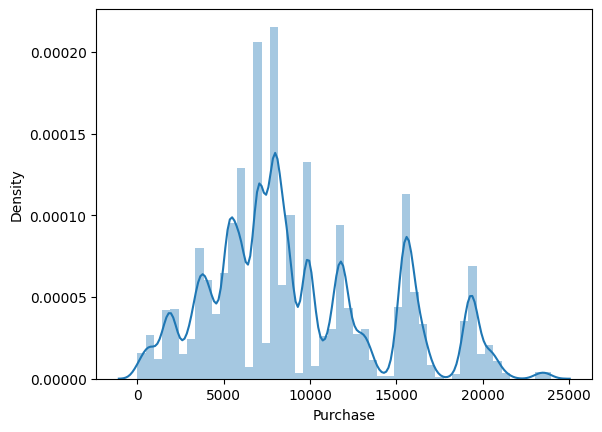

In [ ]:
sns.distplot(df[target_var])

# (C) Preprocessing the dataset

### Adjusting dtypes for categorical data

In [ ]:
for col in df.select_dtypes(include=("object")).columns: df[col] = df[col].astype("category")

In [ ]:
num_cols = df.select_dtypes(exclude=["object","category"]).columns
cat_cols = df.select_dtypes(include=["object","category"]).columns

## (1) Quick (EDA) Checks

### Checking the Variable Relations
- Checking the Variable Relations for deterninating variables which we will be focued on 

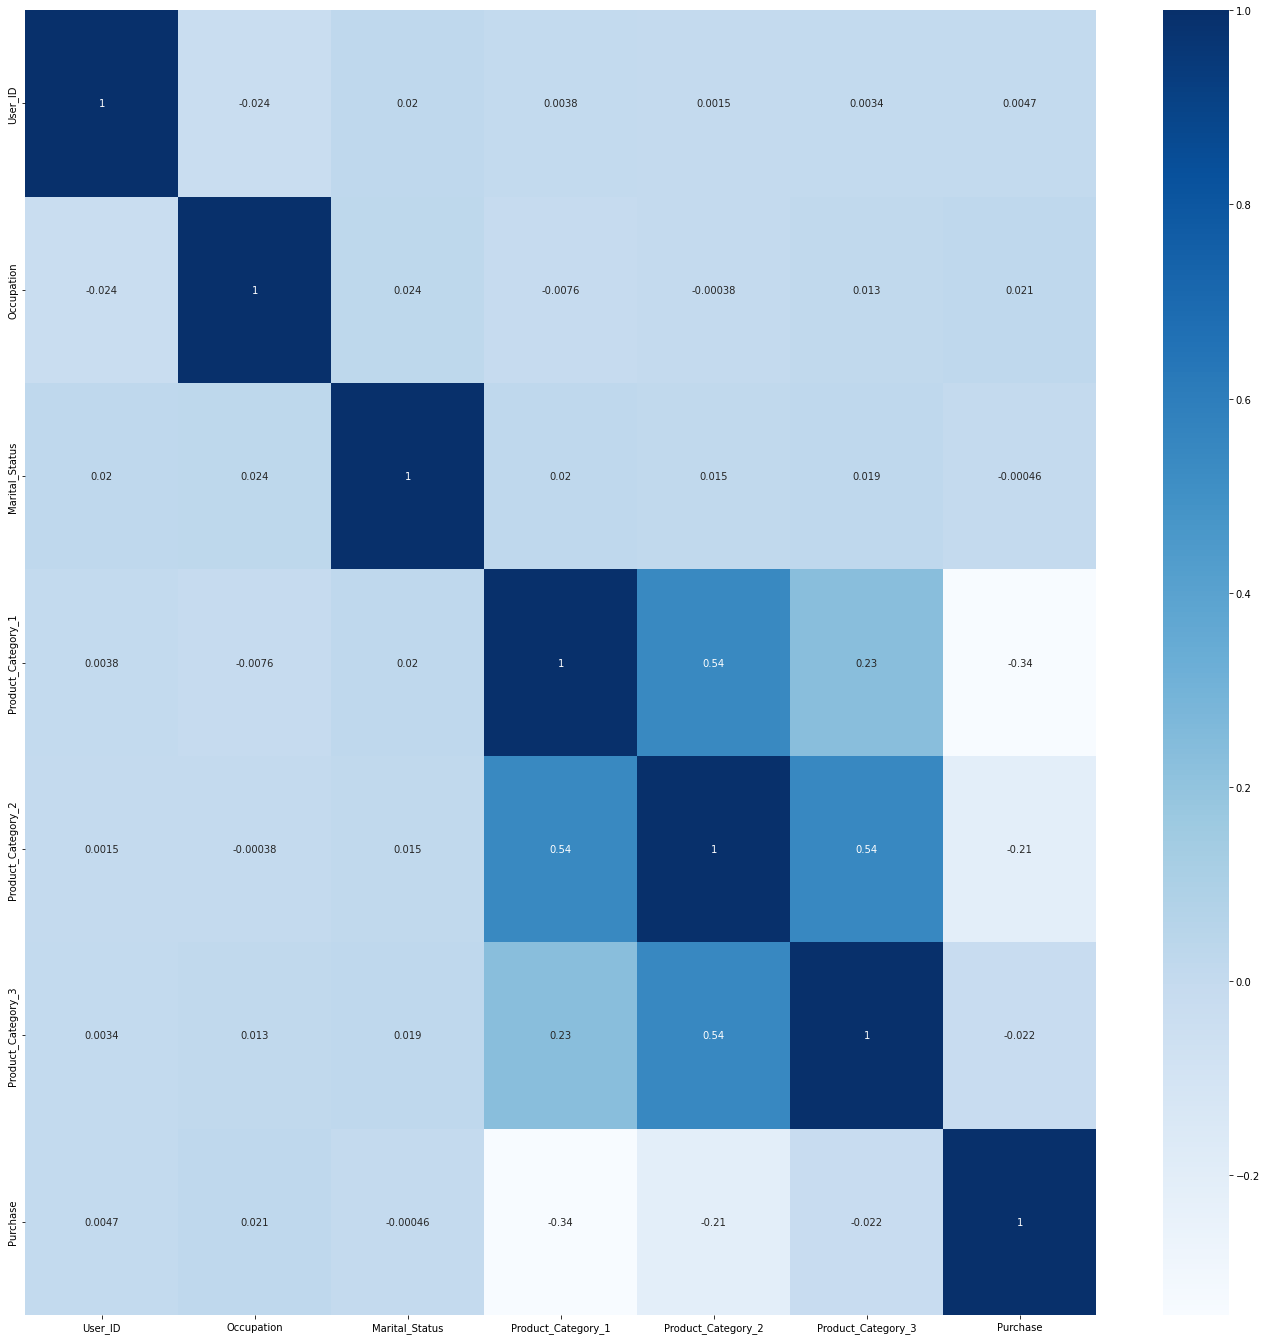

In [ ]:
# Extracting the relations
corr = df.corr()

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(col_size*2,col_size*2))

# Plotting
sns.heatmap(corr, annot=True, cmap="Blues");

Text(0.5, 1.0, 'Negative Correlation (neg> 0.7)')

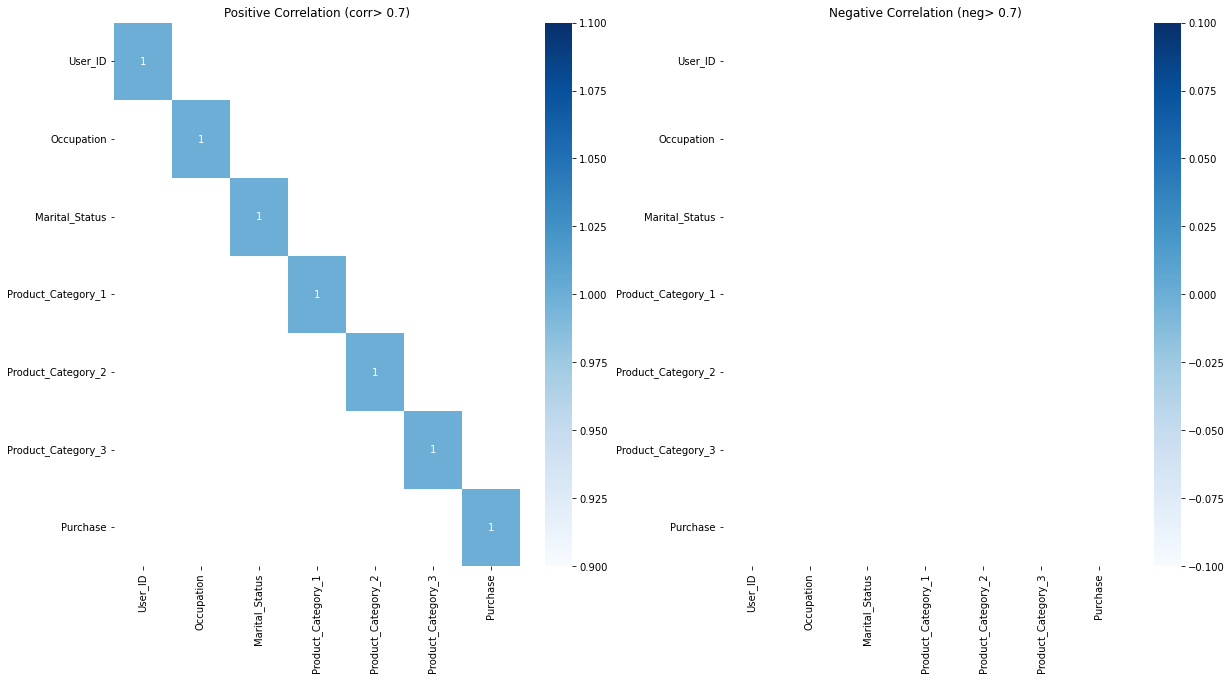

In [ ]:
# Extracting the pos & neg corrs
p_th = 0.7
positive = corr[corr>p_th]

n_th = -0.7
negative = corr[corr<n_th]

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(20,10))

# plotting as multiple axis
plt.subplot(1,2,1)
sns.heatmap(positive, annot=True, cmap="Blues");
plt.title("Positive Correlation (corr> 0.7)")

plt.subplot(1,2,2)
sns.heatmap(negative, annot=True, cmap="Blues");
plt.title("Negative Correlation (neg> 0.7)")

### Distribution Check

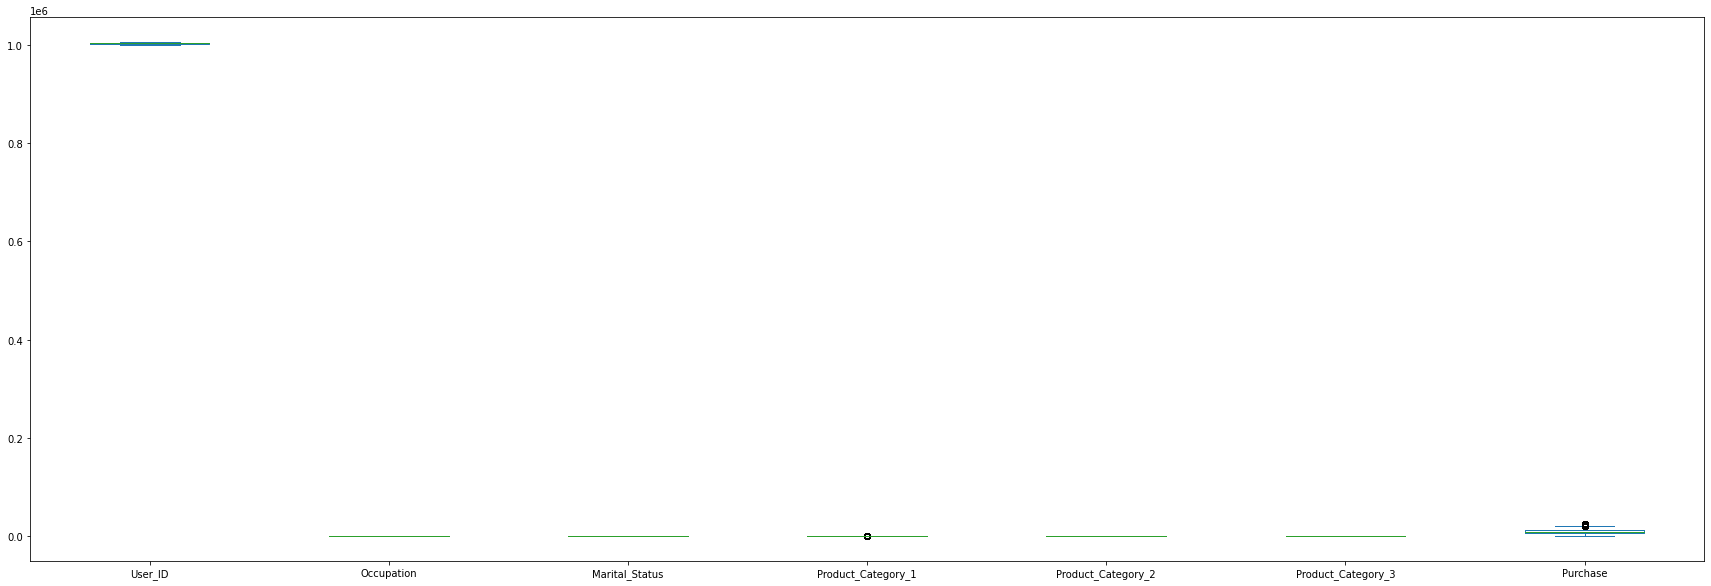

In [ ]:
df.plot.box(figsize=(30,10));

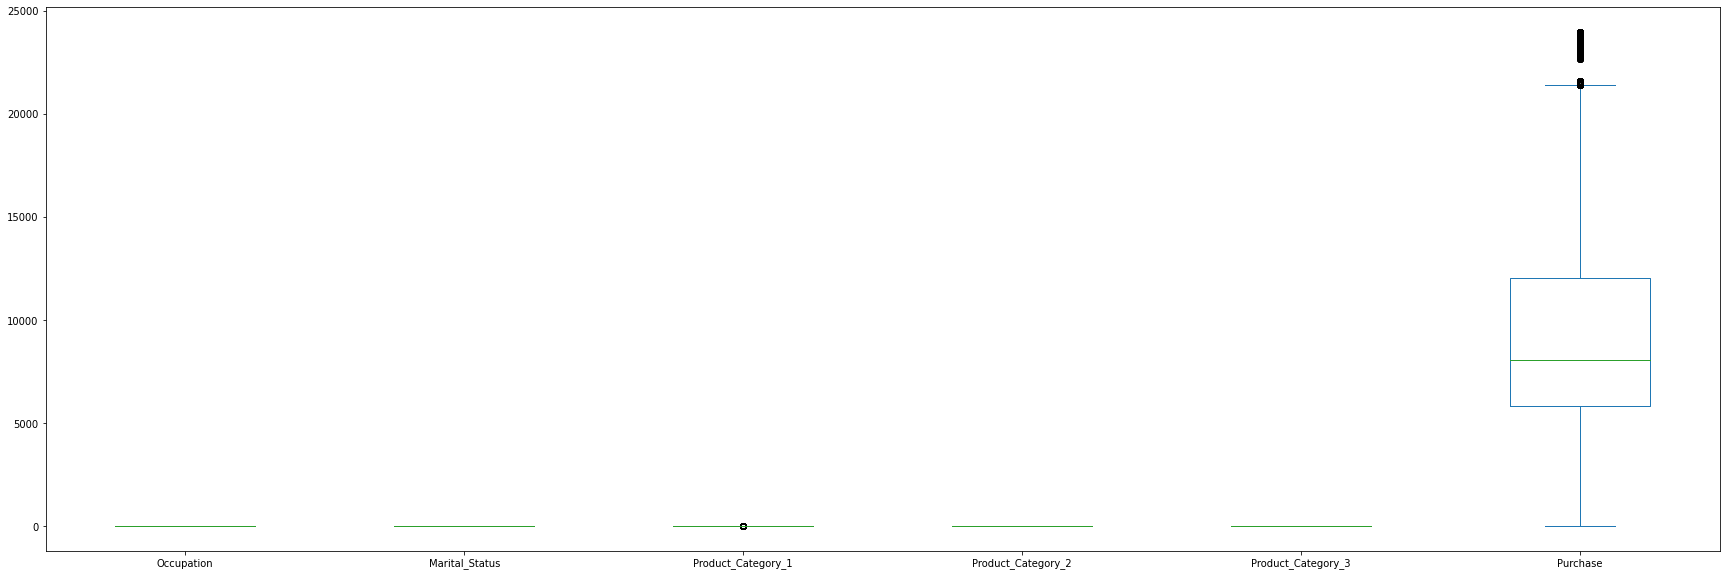

In [ ]:
df.drop(columns=["User_ID"]).plot.box(figsize=(30,10));

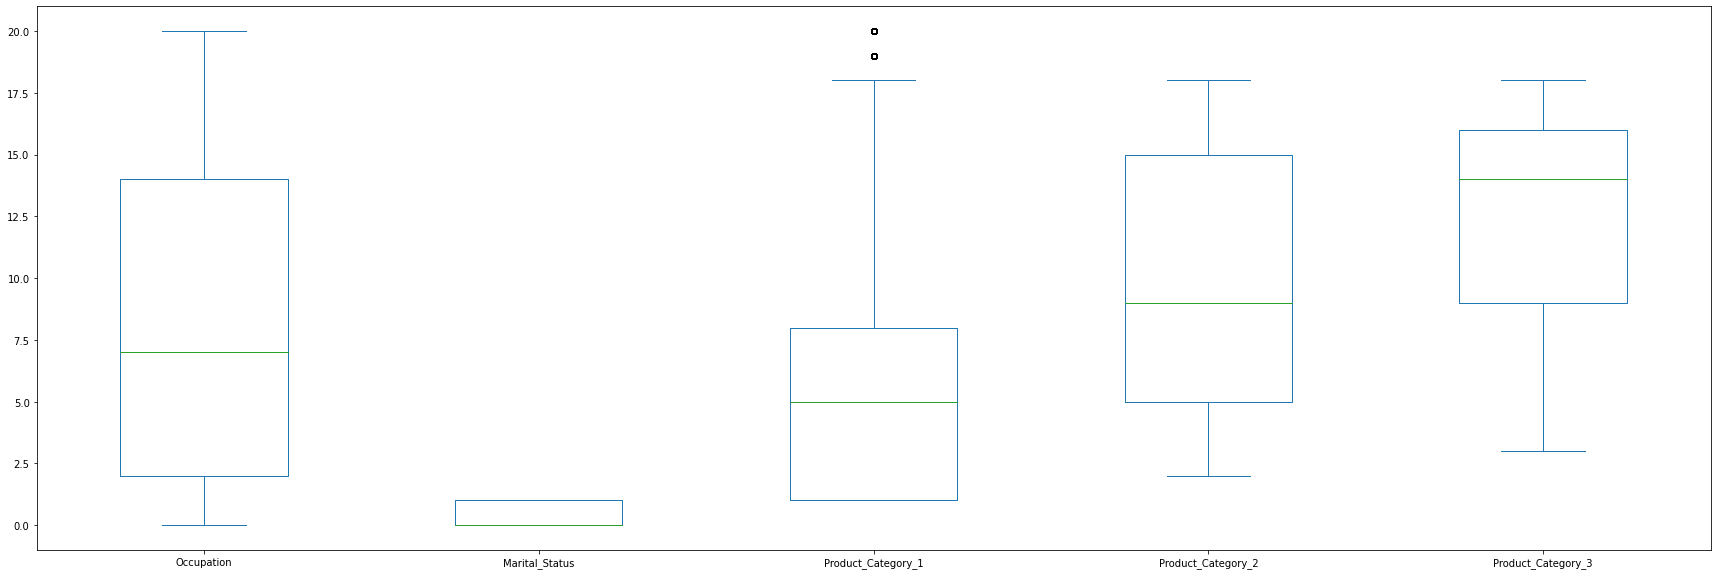

In [ ]:
df.drop(columns=["User_ID","Purchase"]).plot.box(figsize=(30,10));

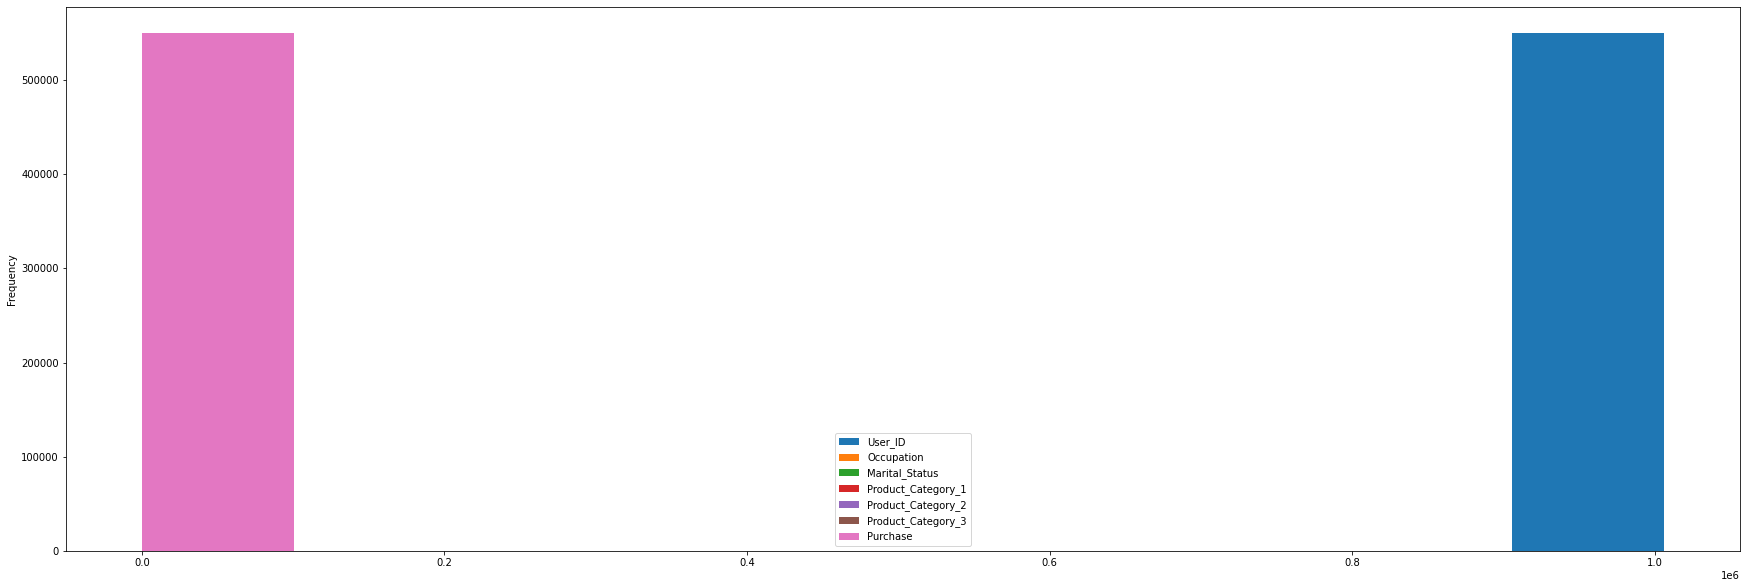

In [ ]:
df.plot.hist(figsize=(30,10));

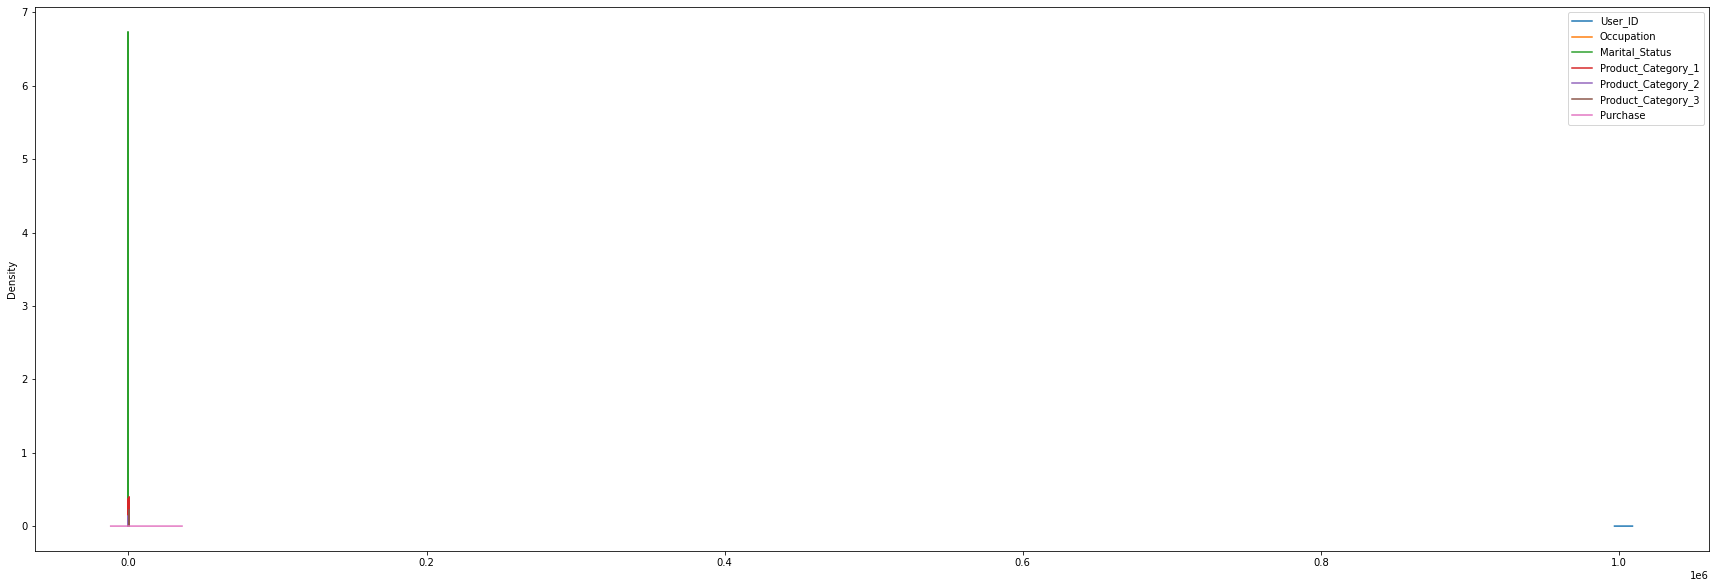

In [ ]:
df.plot.kde(figsize=(30,10));

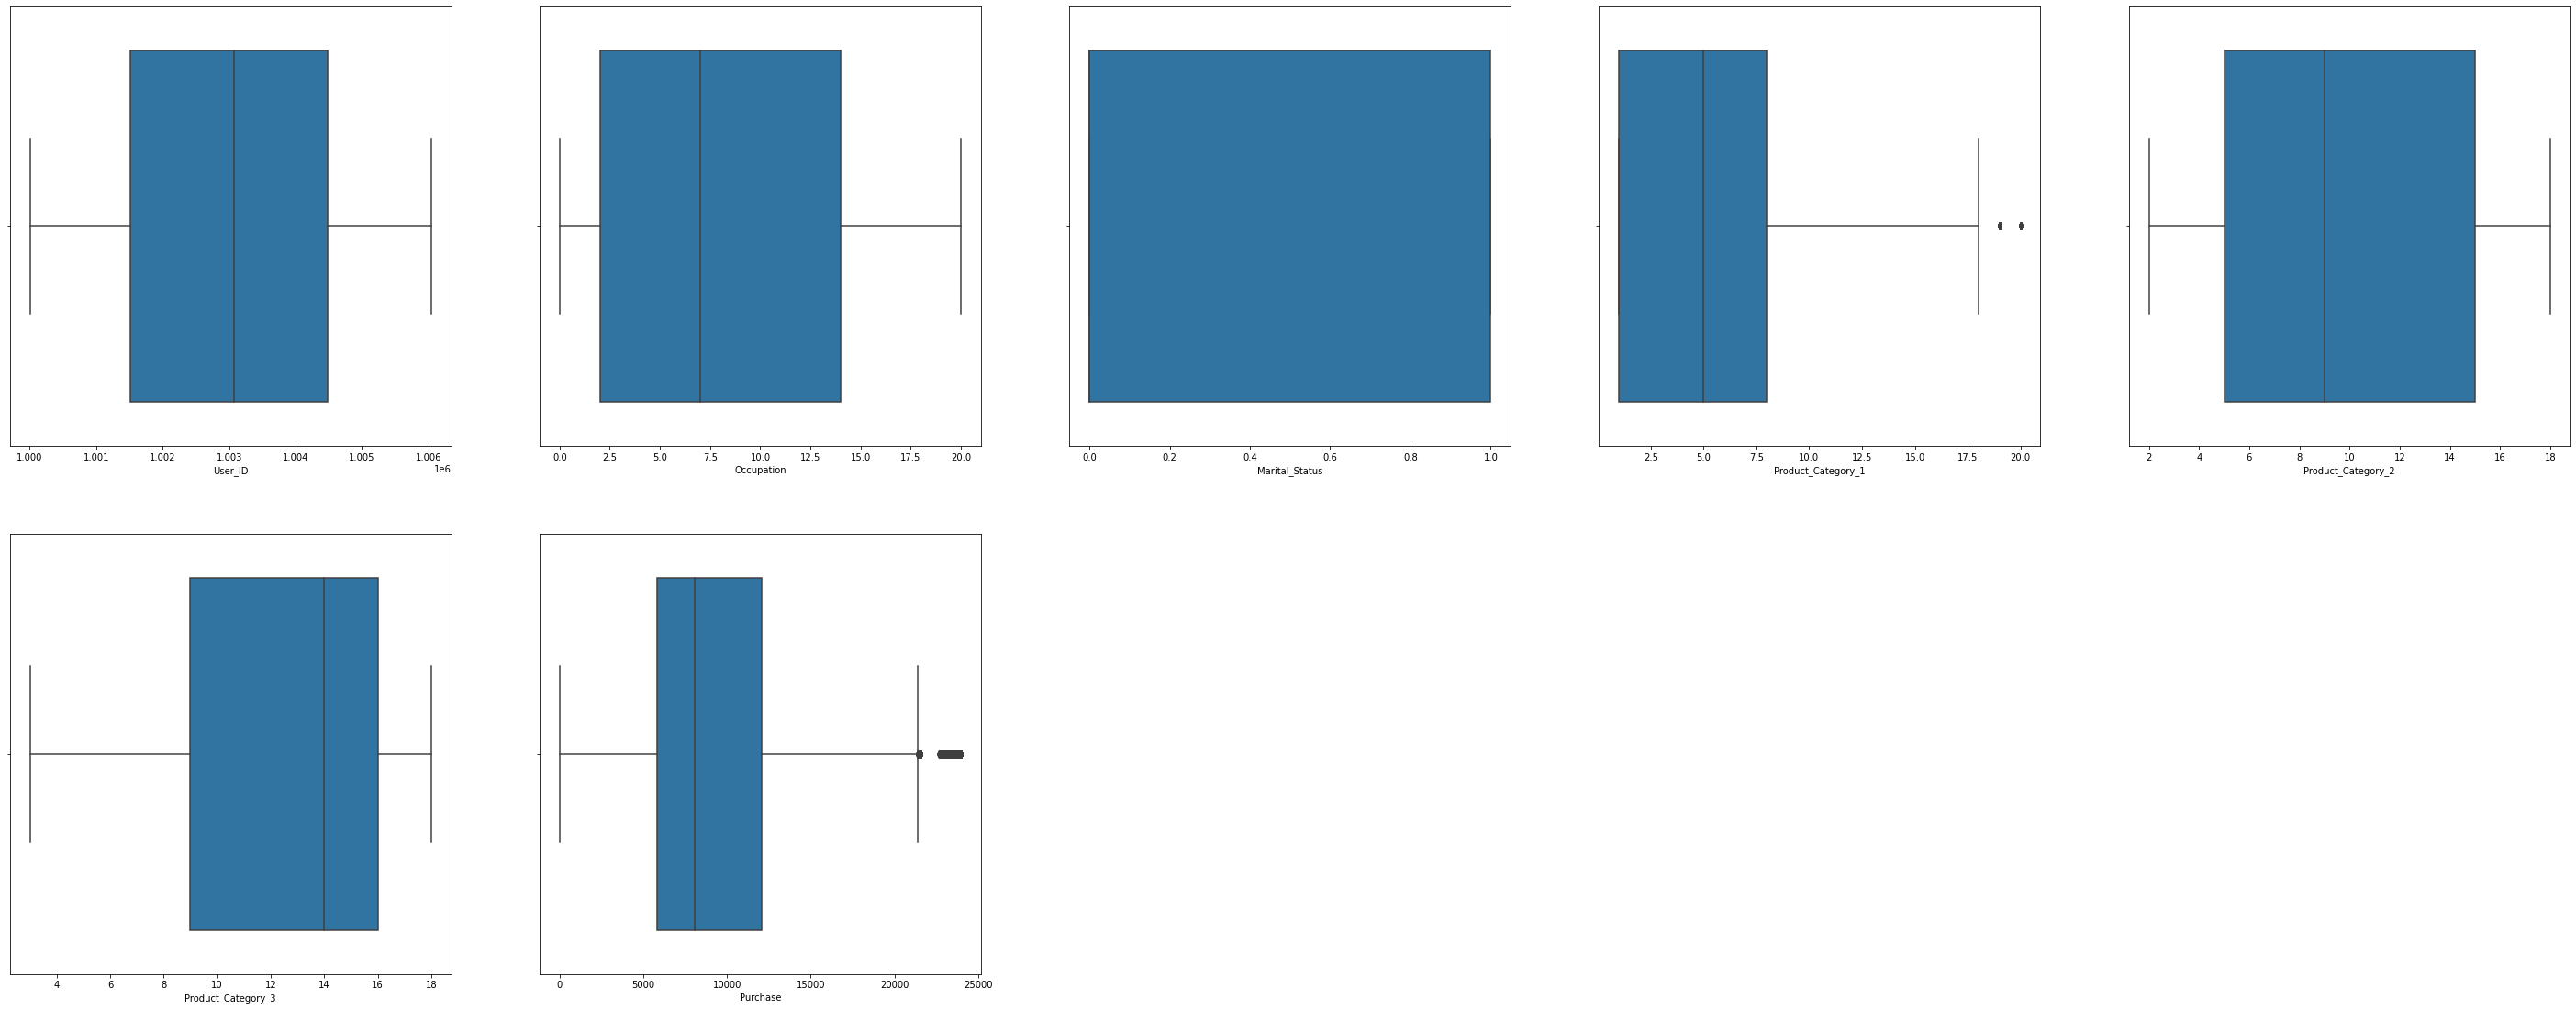

In [ ]:
size = len(df.columns)
cs, rs = (5, size//5+1) if size >=5 else (3, size//3+1)

plt.figure(figsize=(cs*10, rs*10))
for i, col in enumerate(df.select_dtypes(exclude=("object","category")).columns):
  plt.subplot(rs,cs,i+1)
  sns.boxplot(df[col])
  

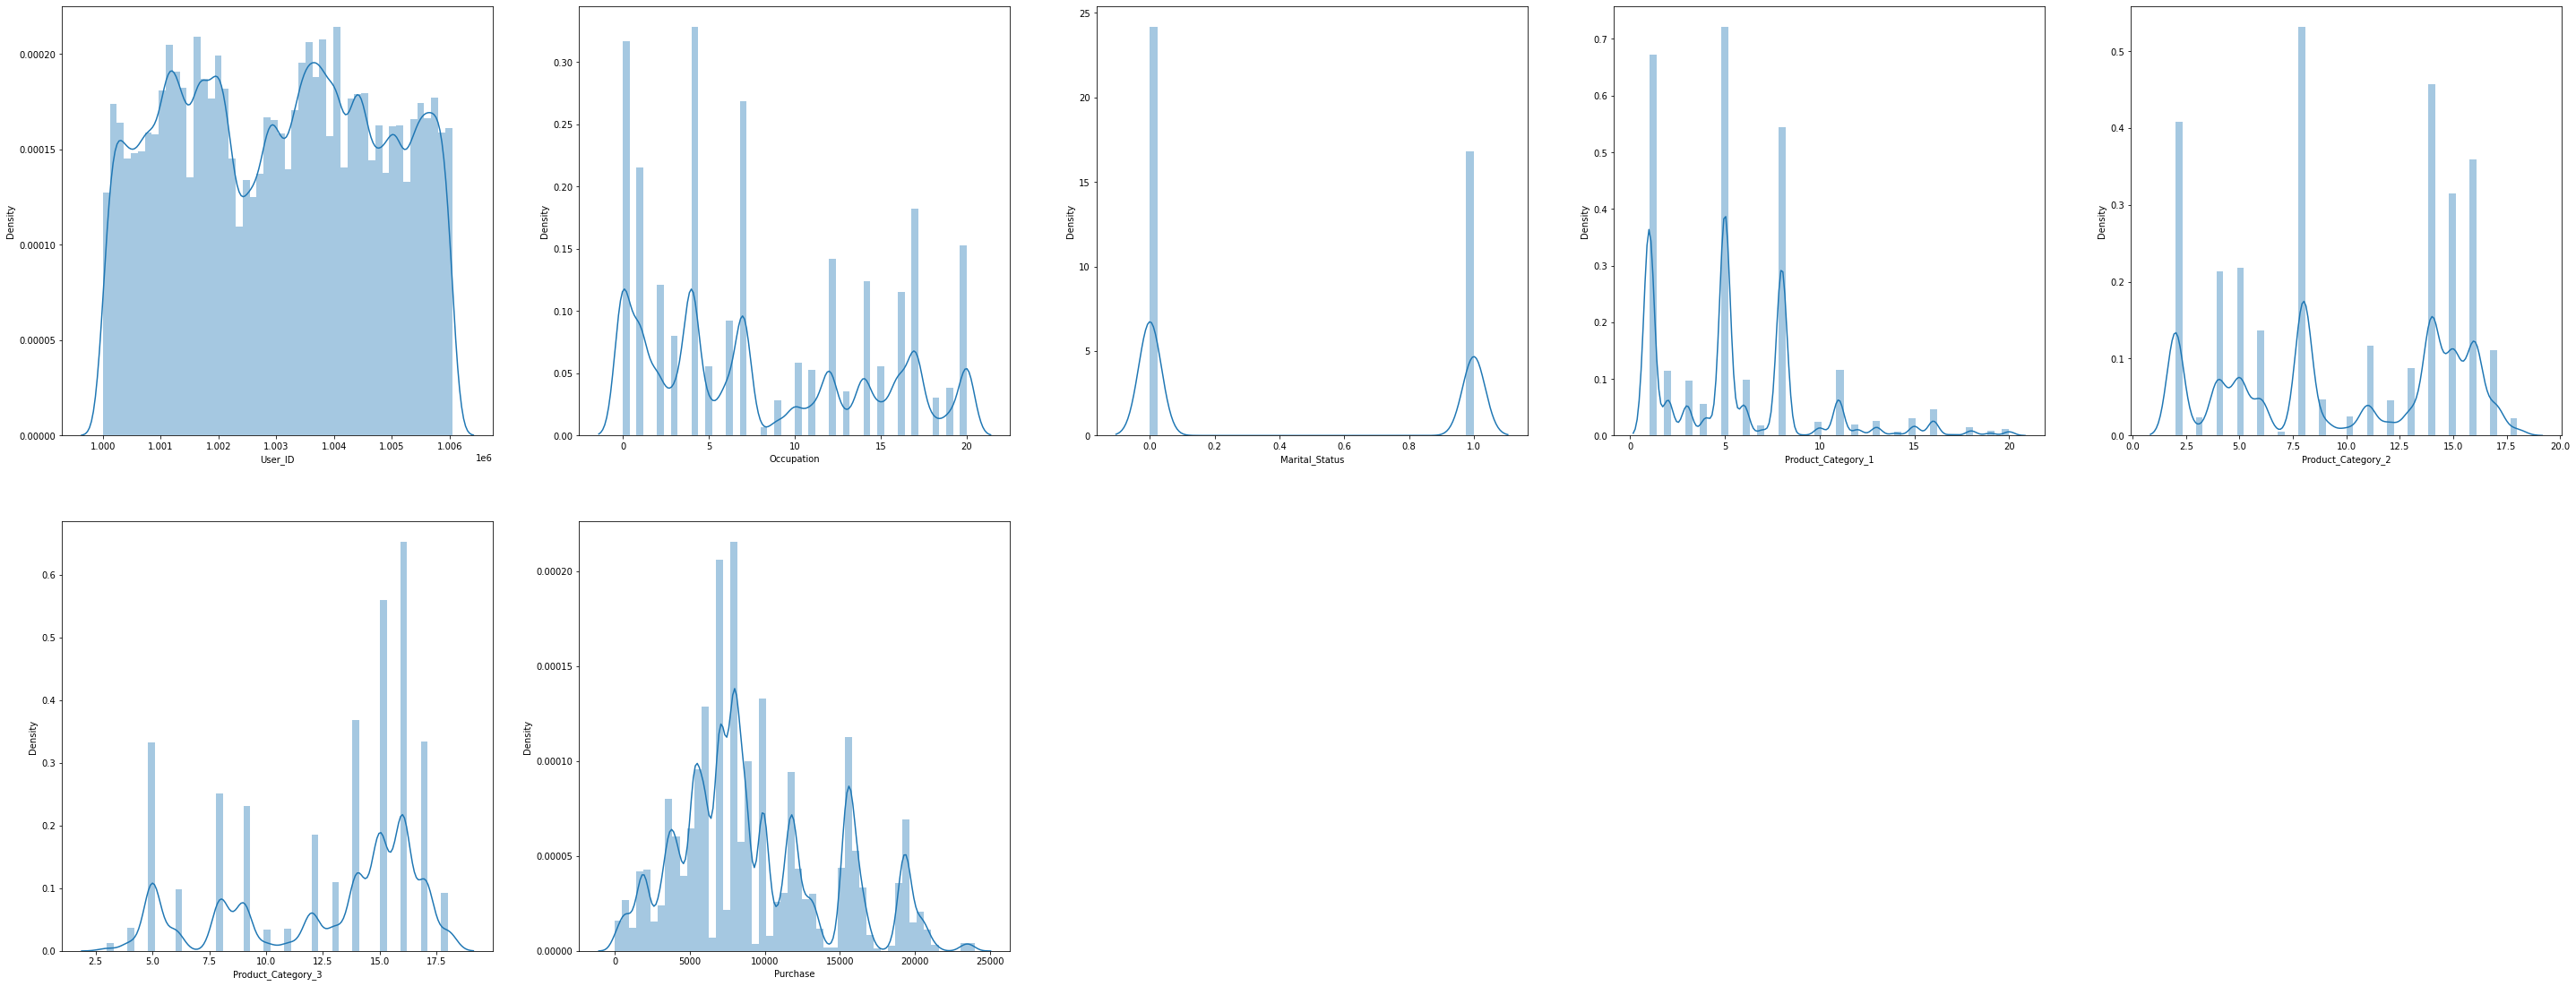

In [ ]:
size = len(df.columns)
cs, rs = (5, size//5+1) if size >=5 else (3, size//3+1)

plt.figure(figsize=(cs*10, rs*10))
for i, col in enumerate(df.select_dtypes(exclude=("object","category")).columns):
  plt.subplot(rs,cs,i+1)
  sns.distplot(df[col])

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

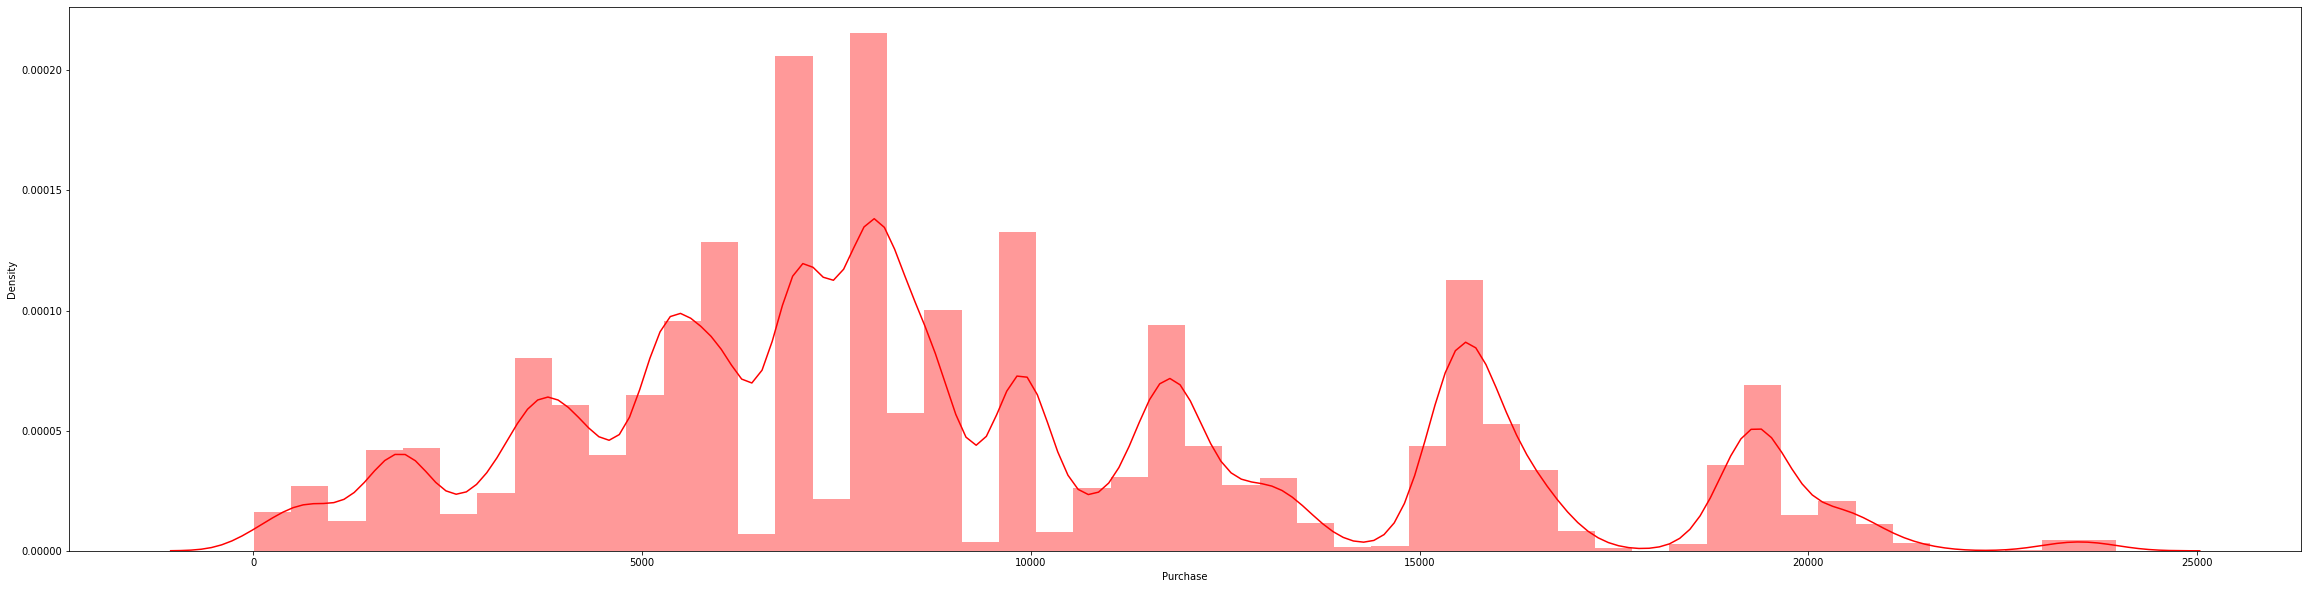

In [ ]:
# Configurating plotings
plt.figure(figsize=(40,10))

sns.distplot( df[target_var], color='r')

## (2) Missing Value 

### Finding out the missing values

In [ ]:
# find the null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

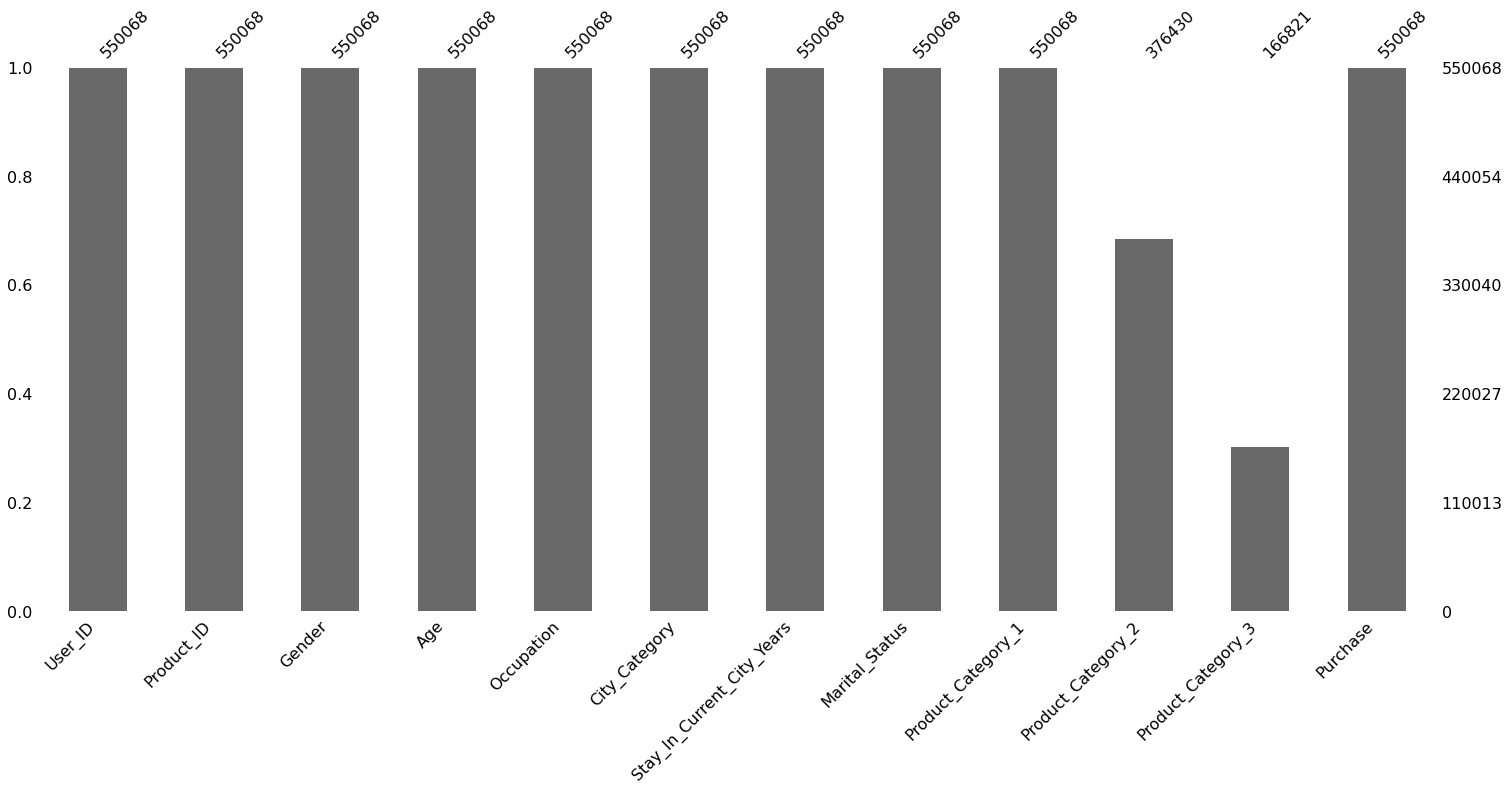

In [ ]:
import missingno as msno
msno.bar(df);

<AxesSubplot:>

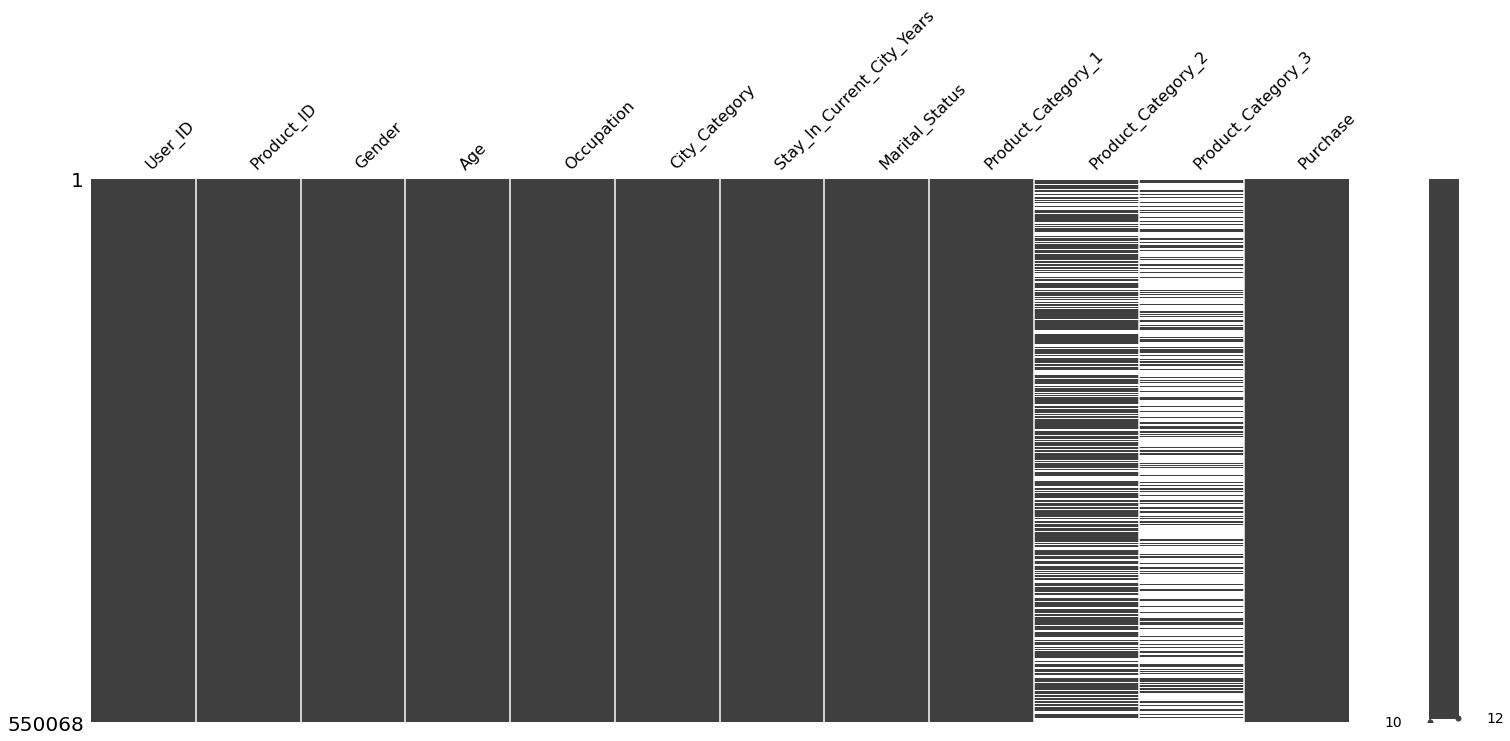

In [ ]:
msno.matrix(df)

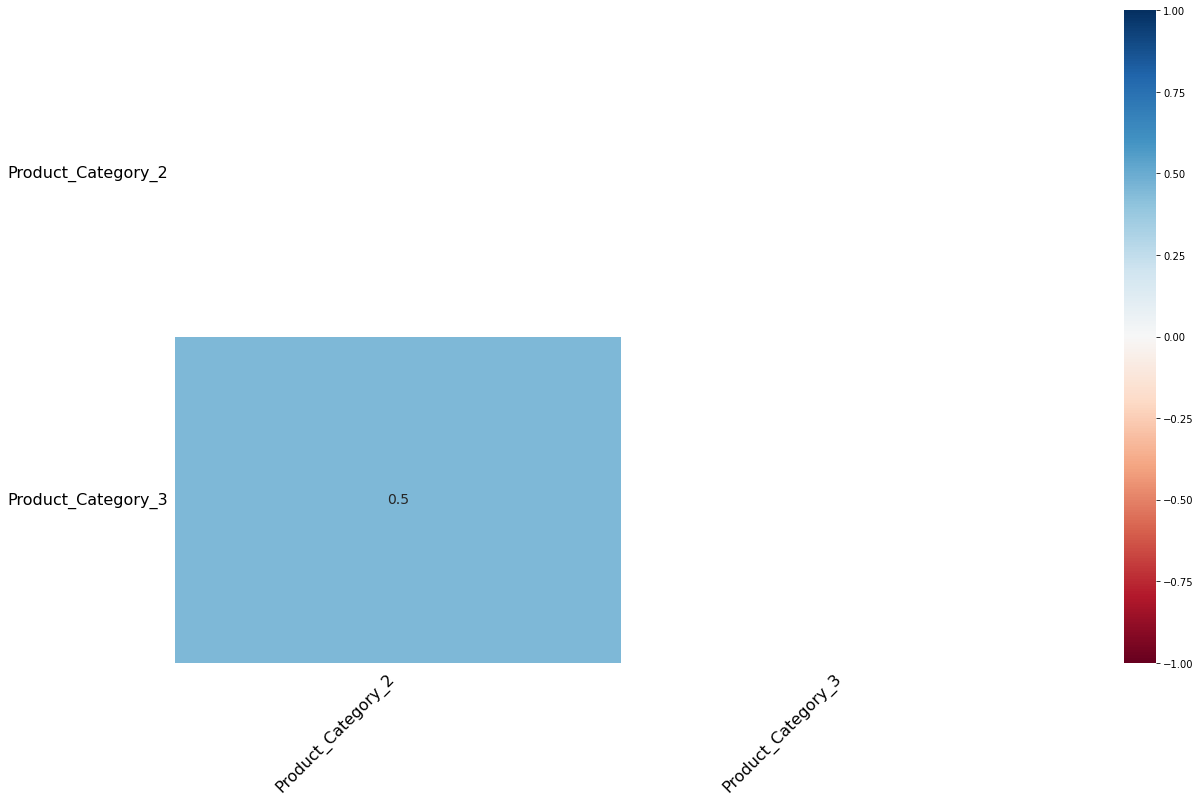

In [ ]:
msno.heatmap(df);

In [ ]:
df['Product_Category_2'].isnull().sum() / df['Product_Category_2'].size

0.3156664266963357

In [ ]:
df['Product_Category_3'].isnull().sum() / df['Product_Category_3'].size

0.6967265865311197

### Handling The Missing Values


In [ ]:
# Filling with median (Most Frequenly)
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace=True)

In [ ]:
# Dropping the colum (%70 missing)
df=df.drop('Product_Category_3',axis=1)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [ ]:
# Updating the column names after the editing dataset
num_cols = df.select_dtypes(exclude=["object","category"]).columns
cat_cols = df.select_dtypes(include=["object","category"]).columns

## (4) Outlier Analysis
- Outliers must be analyse according to re-sampling method because of to detect anomaly (Fraud Detection).

### Visual Approach

In [ ]:
target_var = "Purchase"

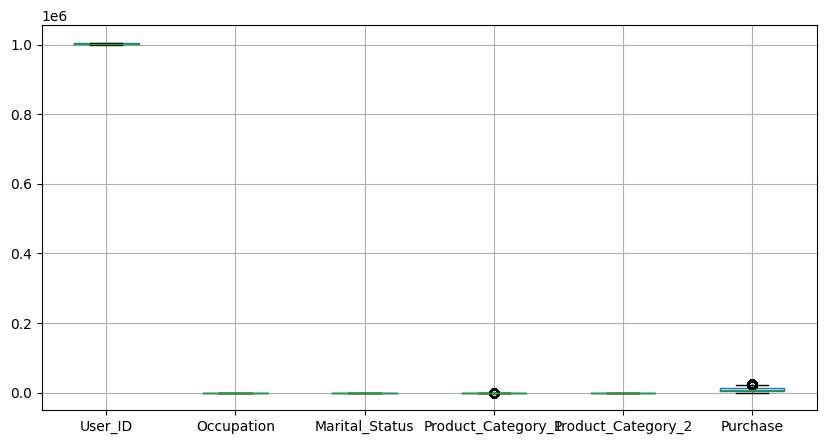

In [ ]:
plt.figure(figsize=(10,5));
df.boxplot();

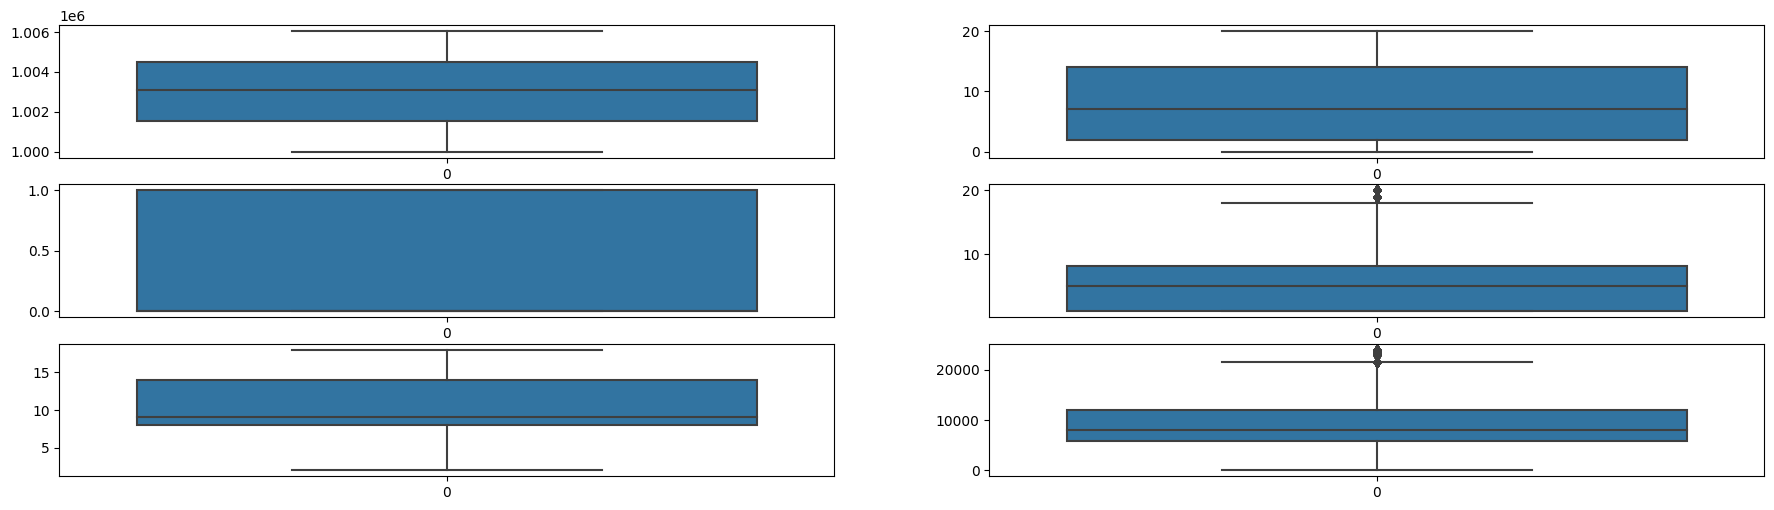

In [ ]:
cum_col_sie = len(num_cols)

plt.figure(figsize=(22, 10))
for i, col in enumerate(num_cols):
  plt.subplot(5, cum_col_sie//5+1, i+1)
  sns.boxplot(df[col]);

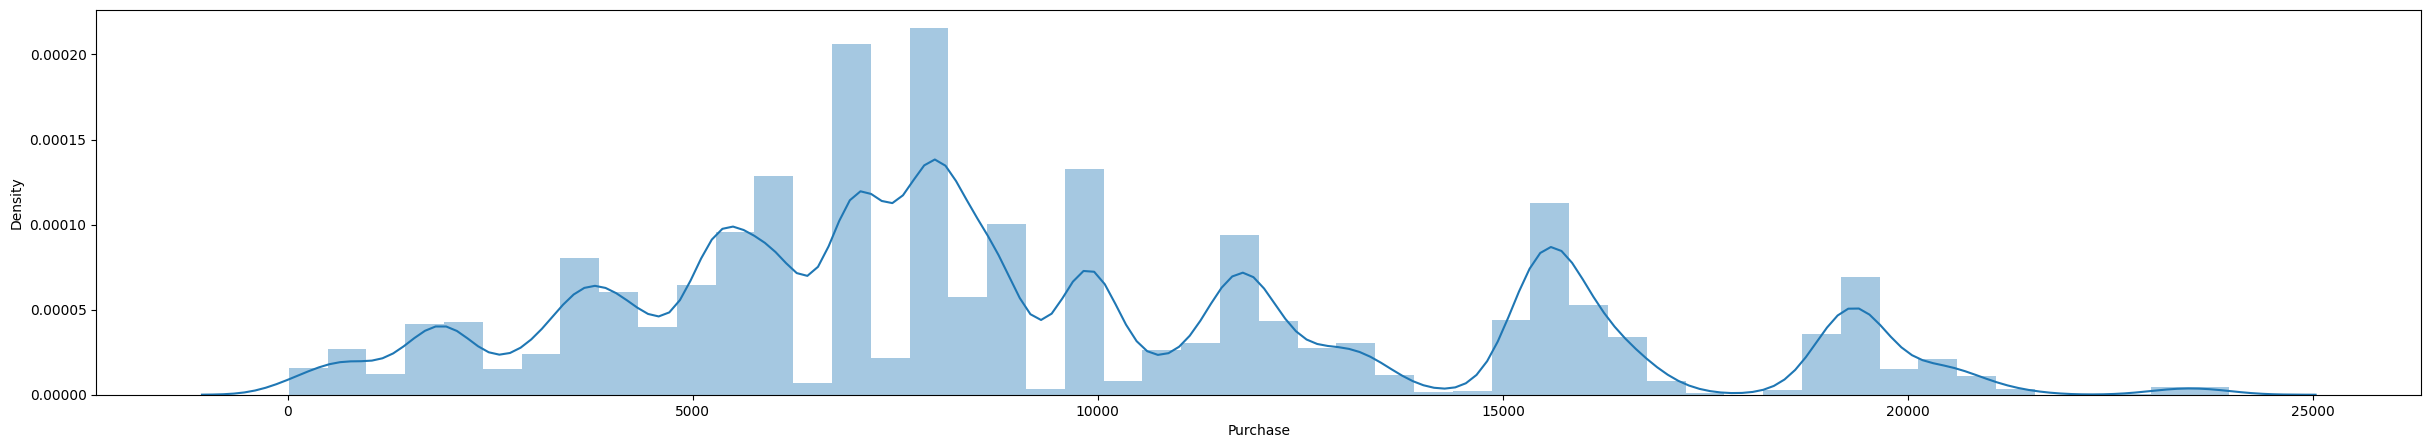

In [ ]:
plt.figure(figsize=(30, 5))
sns.distplot(df[target_var]);

### IQR approach

- Note that
  - If you want to change a certain pertantage of the data for handling outliers.
    - You can adjust the ratio param forn  IQR_calculator funct to adjust inliar range.
  - If the ratio increate, 
    - outlier count will be reduce. Just the most outliers will be captured. 

#### Calculating IQR
- Calculates
  - __IQR__ pandas series for all the given variables
  - __l_th__ lower_threashold pandas series for all the given variables
  - __h_th__ higher_threashold pandas series for all the given variables

In [ ]:
def IQR_calculator(df, ratio=1.5):
    # Calculating the quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR range calculation
    IQR = Q3 -Q1

    # Determinating the boundaries
    lower_threashold = Q1 - ratio * IQR
    higher_threashold = Q3 + ratio *IQR
    
    return IQR, lower_threashold, higher_threashold

In [ ]:
IQR, l_th, h_th = IQR_calculator(df.drop(columns=[target_var]), ratio=1.5)

In [ ]:
from pprint import pprint
for i in [IQR, l_th, h_th]:
  print("-"*20)
  pprint(i)
  print("-"*20, end="\n"*2)

--------------------
User_ID               2962.0
Occupation              12.0
Marital_Status           1.0
Product_Category_1       7.0
Product_Category_2       6.0
dtype: float64
--------------------

--------------------
User_ID               997073.0
Occupation               -16.0
Marital_Status            -1.5
Product_Category_1        -9.5
Product_Category_2        -1.0
dtype: float64
--------------------

--------------------
User_ID               1008921.0
Occupation                 32.0
Marital_Status              2.5
Product_Category_1         18.5
Product_Category_2         23.0
dtype: float64
--------------------



### Finding out The outlier values
- Finds __is_outlier__ and __is_outlier_val__ dataframes which include boolean value for ever individual value.

In [ ]:
def find_outlier_single(data:pd.DataFrame, lower_threashold:float, higher_threashold:float)->pd.DataFrame:
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [ ]:
def find_outlier(df:pd.DataFrame, lower_threashold:pd.Series, higher_threashold:pd.Series)->pd.DataFrame:
    data = df[lower_threashold.index]
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [ ]:
# Getting the outlier indexes
is_outlier = find_outlier(df.drop(columns=[target_var]), l_th, h_th)
is_outlier.head()

User_ID  Occupation  Marital_Status  Product_Category_1  Product_Category_2
0    False       False           False               False               False
1    False       False           False               False               False
2    False       False           False               False               False
3    False       False           False               False               False
4    False       False           False               False               False

In [ ]:
is_outlier.sum()

User_ID                  0
Occupation               0
Marital_Status           0
Product_Category_1    4153
Product_Category_2       0
dtype: int64

In [ ]:
outlier_ratios = (is_outlier.sum() / df[is_outlier.columns].count()).sort_values(ascending=False)
outlier_ratios

Product_Category_1    0.00755
User_ID               0.00000
Occupation            0.00000
Marital_Status        0.00000
Product_Category_2    0.00000
dtype: float64

In [ ]:
signf = 0.05
top_outlier =  outlier_ratios[outlier_ratios > signf]
top_outlier

Series([], dtype: float64)

In [ ]:
len(df["Product_Category_1"].unique())

20

In [ ]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

### Handling outlier
- There are no outliers in the dataset, so no handling process is implemented

#### Util Functions

In [ ]:
def mean_assignment(data:pd.Series, is_outlier:pd.Series, value:float):
  "It assigns given value to the outlier values"
  data[is_outlier] = value
  return data

# usage # df["c1"] = mean_assignment(df["c1"], is_outlier["c1"], df["c1"].mean()):

In [ ]:
def boundary_casting(data:pd.Series, l_th:float, h_th:float):
  "It assigns border values to the outlier values"
  
  data[ data < l_th ] = l_th
  data[ h_th < data ] = h_th

  return data

# (D) Exploratory Data Analysis

## Dataset 

### Spesifications

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          550068 non-null  float64 
 10  Purchase                    550068 non-null  int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 28.5 MB


In [ ]:
df.describe().T

count          mean          std        min        25%  \
User_ID             550068.0  1.003029e+06  1727.591586  1000001.0  1001516.0   
Occupation          550068.0  8.076707e+00     6.522660        0.0        2.0   
Marital_Status      550068.0  4.096530e-01     0.491770        0.0        0.0   
Product_Category_1  550068.0  5.404270e+00     3.936211        1.0        1.0   
Product_Category_2  550068.0  9.576434e+00     4.226025        2.0        8.0   
Purchase            550068.0  9.263969e+03  5023.065394       12.0     5823.0   

                          50%        75%        max  
User_ID             1003077.0  1004478.0  1006040.0  
Occupation                7.0       14.0       20.0  
Marital_Status            0.0        1.0        1.0  
Product_Category_1        5.0        8.0       20.0  
Product_Category_2        9.0       14.0       18.0  
Purchase               8047.0    12054.0    23961.0

In [ ]:
pd.unique(df.select_dtypes(include=["object","category"]).values.ravel('k'))

array(['P00069042', 'P00248942', 'P00087842', ..., '3', '1', '0'],
      dtype=object)

## Univariate Analysis

In [ ]:
num_cols = df.select_dtypes(include=("int64","float64"), exclude=("bool") ).columns
cat_cols = df.select_dtypes(exclude=("int64","float64")).columns

In [ ]:
num_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [ ]:
len(df.columns), df.columns

(11,
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Purchase'],
       dtype='object'))

In [ ]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Product_ID                  550068 non-null  category
 1   Gender                      550068 non-null  category
 2   Age                         550068 non-null  category
 3   City_Category               550068 non-null  category
 4   Stay_In_Current_City_Years  550068 non-null  category
dtypes: category(5)
memory usage: 3.3 MB


In [ ]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Occupation          550068 non-null  int64  
 2   Marital_Status      550068 non-null  int64  
 3   Product_Category_1  550068 non-null  int64  
 4   Product_Category_2  550068 non-null  float64
 5   Purchase            550068 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 25.2 MB


### Target Variable

In [ ]:
target_var = "Purchase"

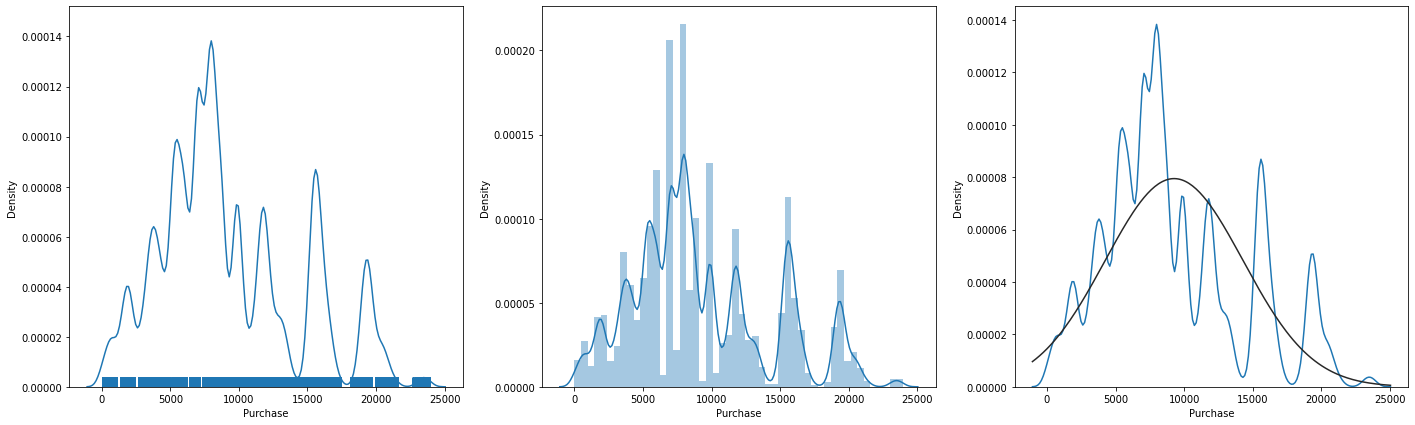

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(24,7))

plt.subplot(1,3,1)
sns.distplot(df[target_var], rug=True, hist=False);

plt.subplot(1,3,2)
sns.distplot(df[target_var], rug=False, hist=True);

plt.subplot(1,3,3)
sns.distplot(df[target_var], fit=norm, rug=False, hist=False);

### Feature Variables [Numerical]

#### setting the plotting params

In [ ]:
# Defining the params
target_var = "Purchase"
#num_cols = df.select_dtypes(exclude='category').columns
num_col_size = len(num_cols)
cols, rows = (3, num_col_size//3 + 1) if num_col_size > 5 else (5, 1) 
figsize = (cols*7, rows*5)

#### [histplot] Distributions

In [ ]:
num_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

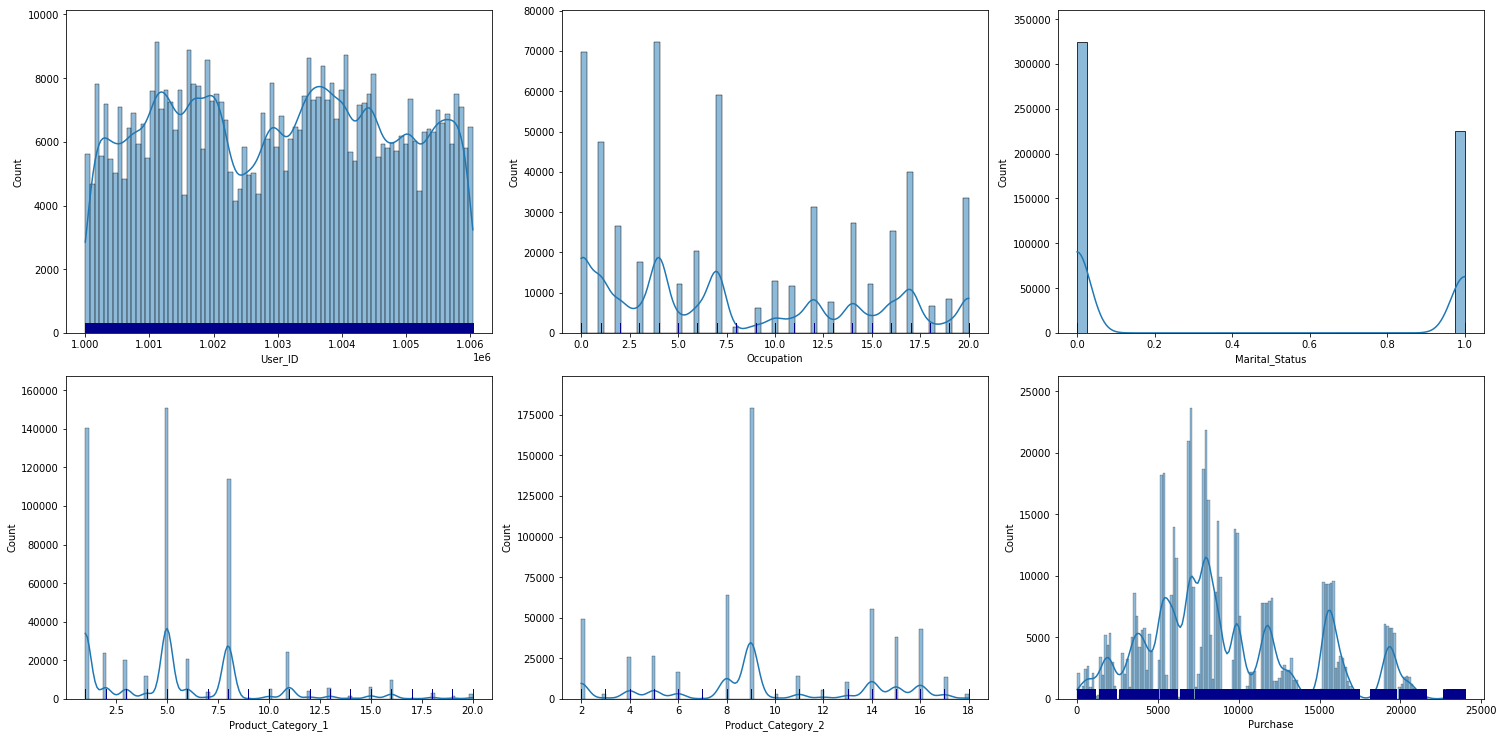

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

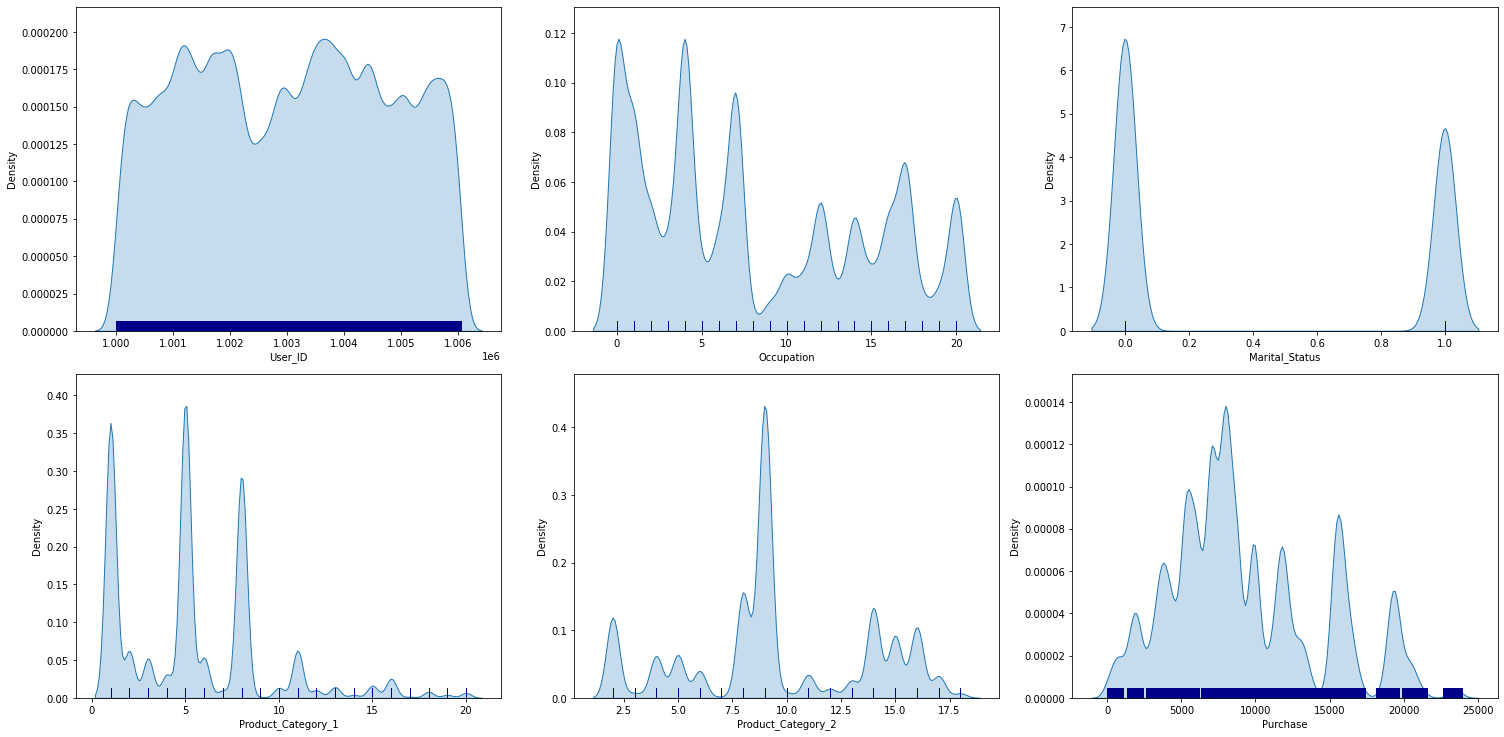

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

#### [boxplot] Distributions with quartiles (Outlier)

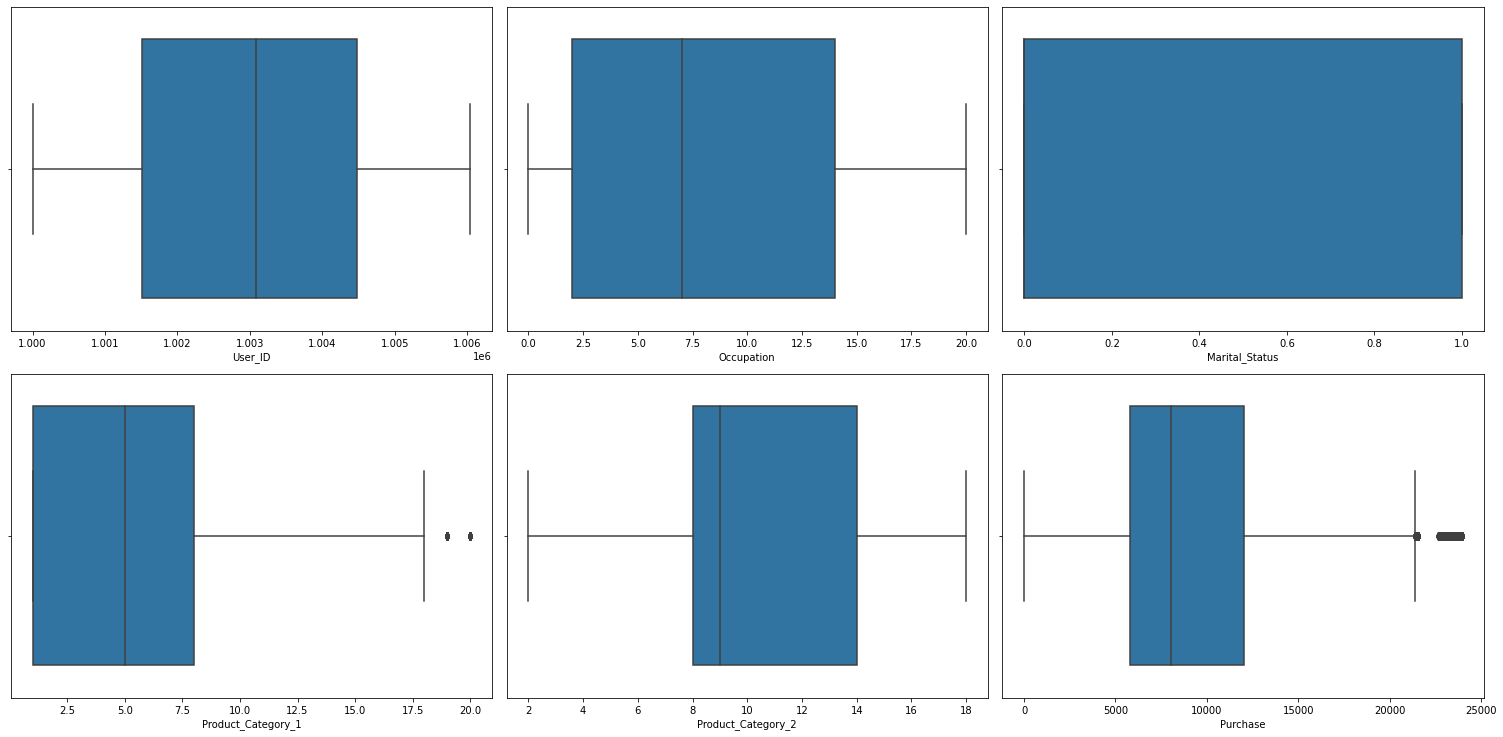

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [violinplot] Distributions with quartiles and density

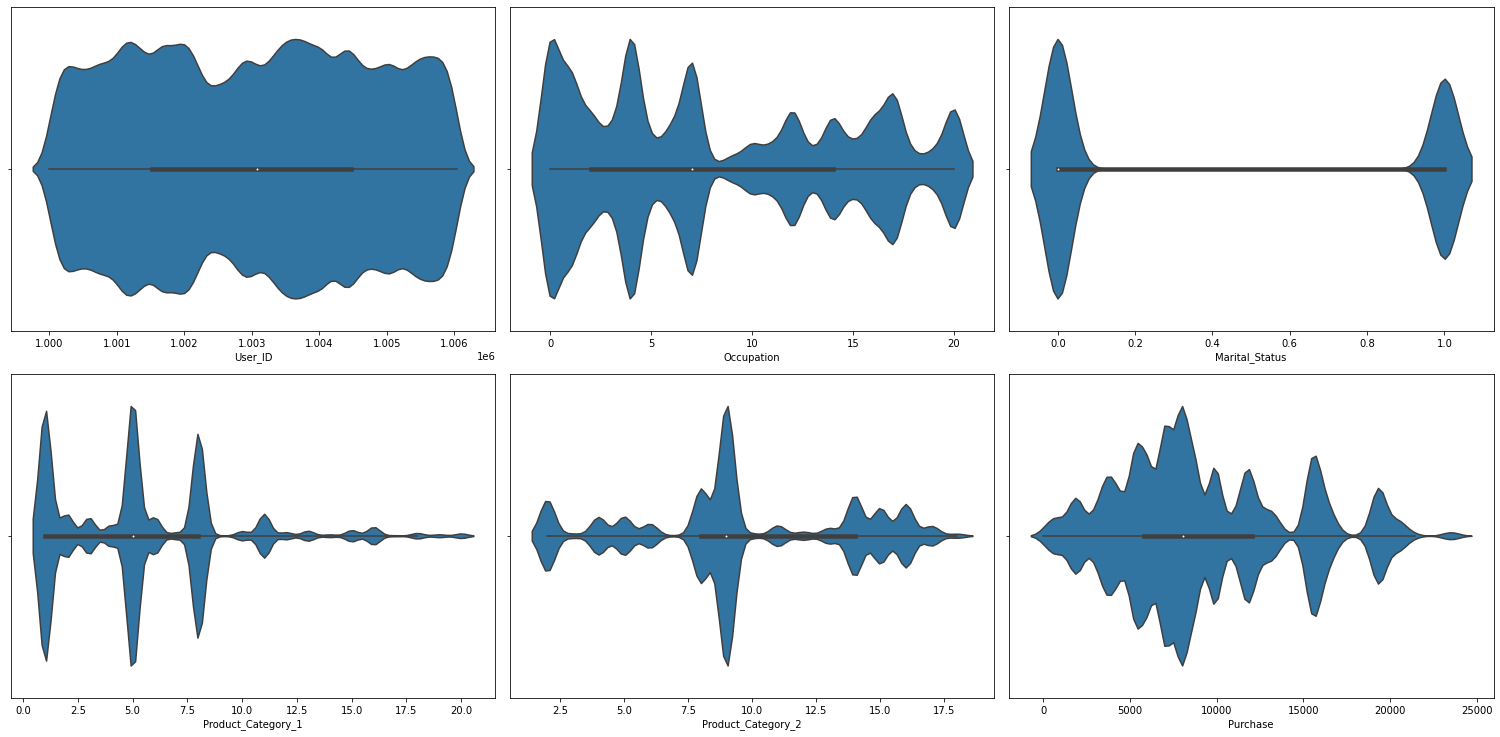

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

#### [stripplot] spread of the data with stripplot

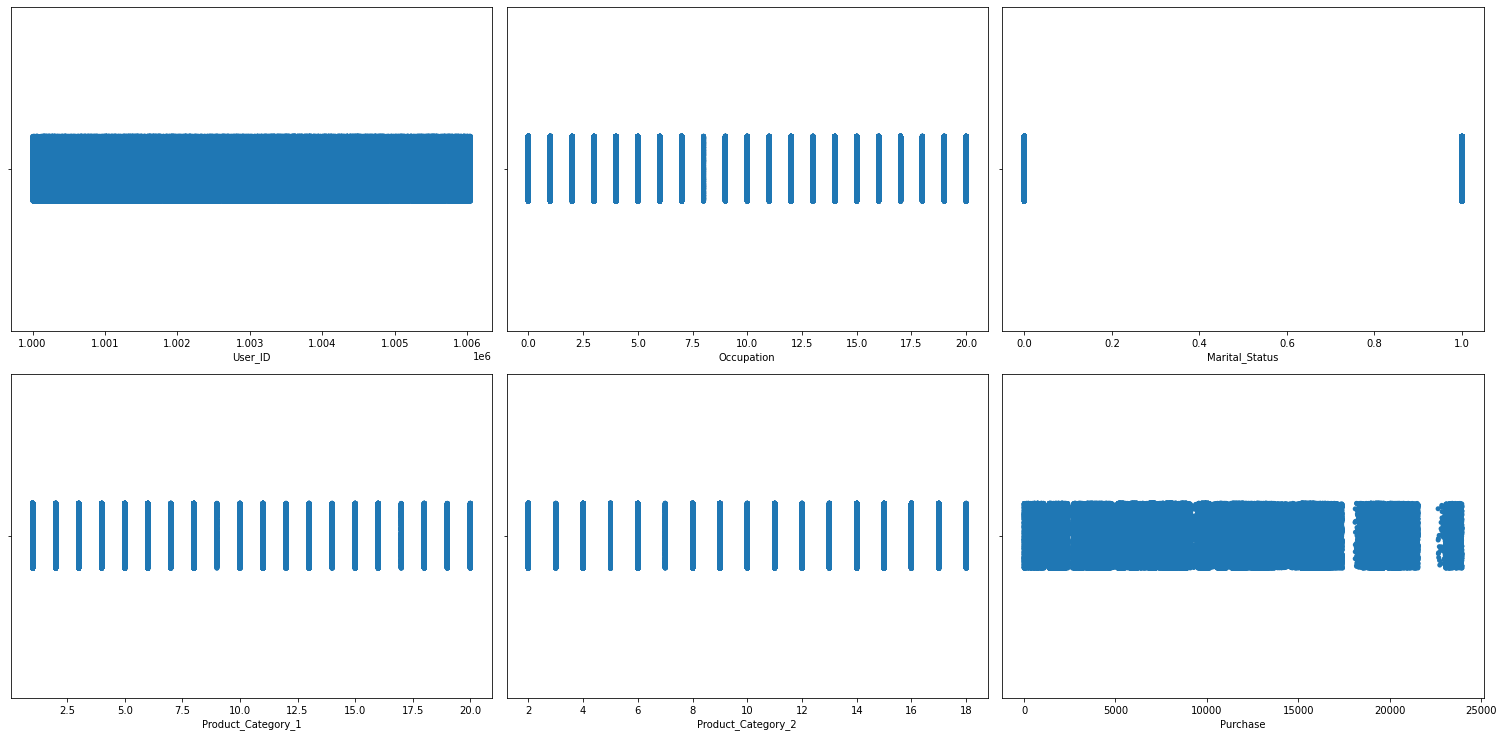

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [swarmplot] spread of the data with stripplot (avoids overlap)
```python
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # swarmplot
    sns.swarmplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()
```

#### [scatterplot] Spread of data 

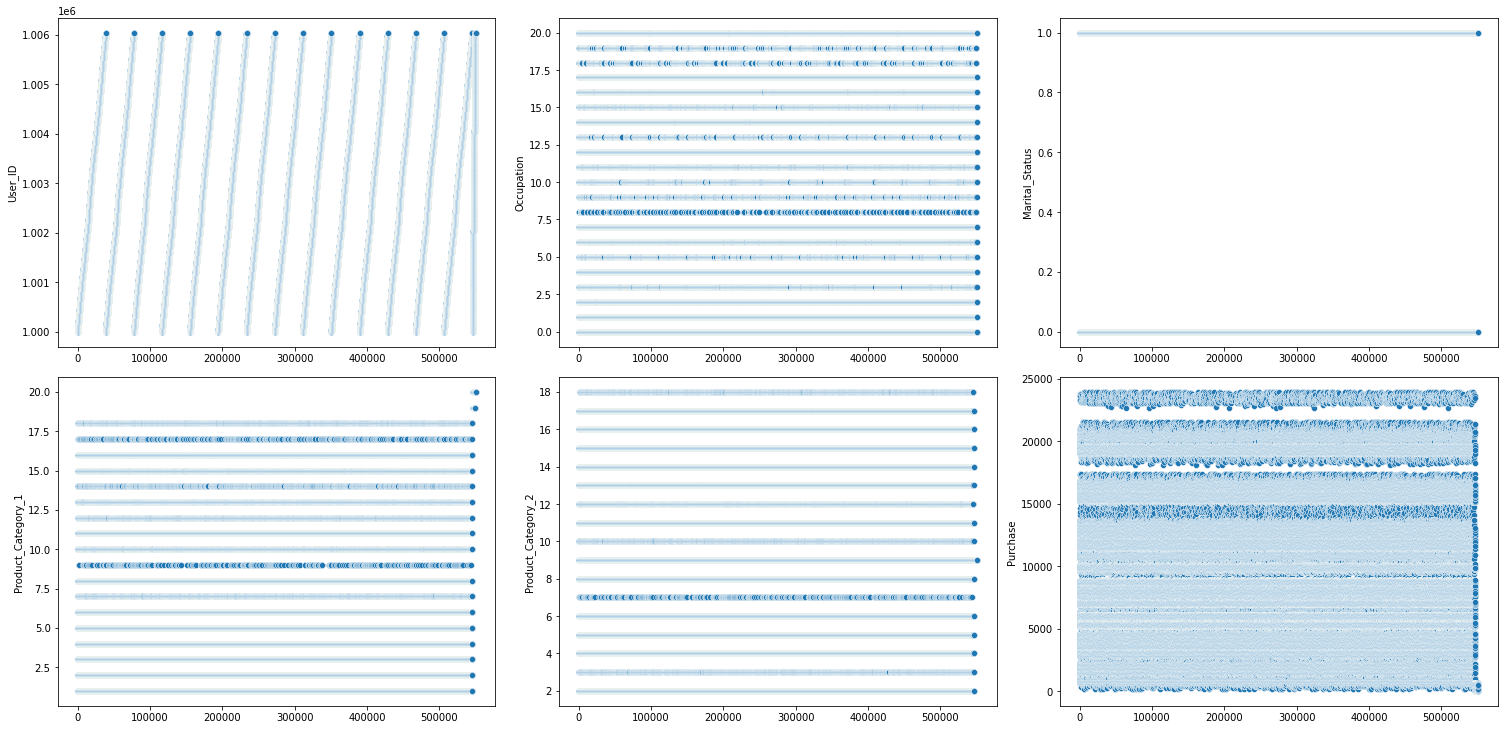

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # scatterplot
    sns.scatterplot(x = df[col].index, y= df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [lineplot] Trend

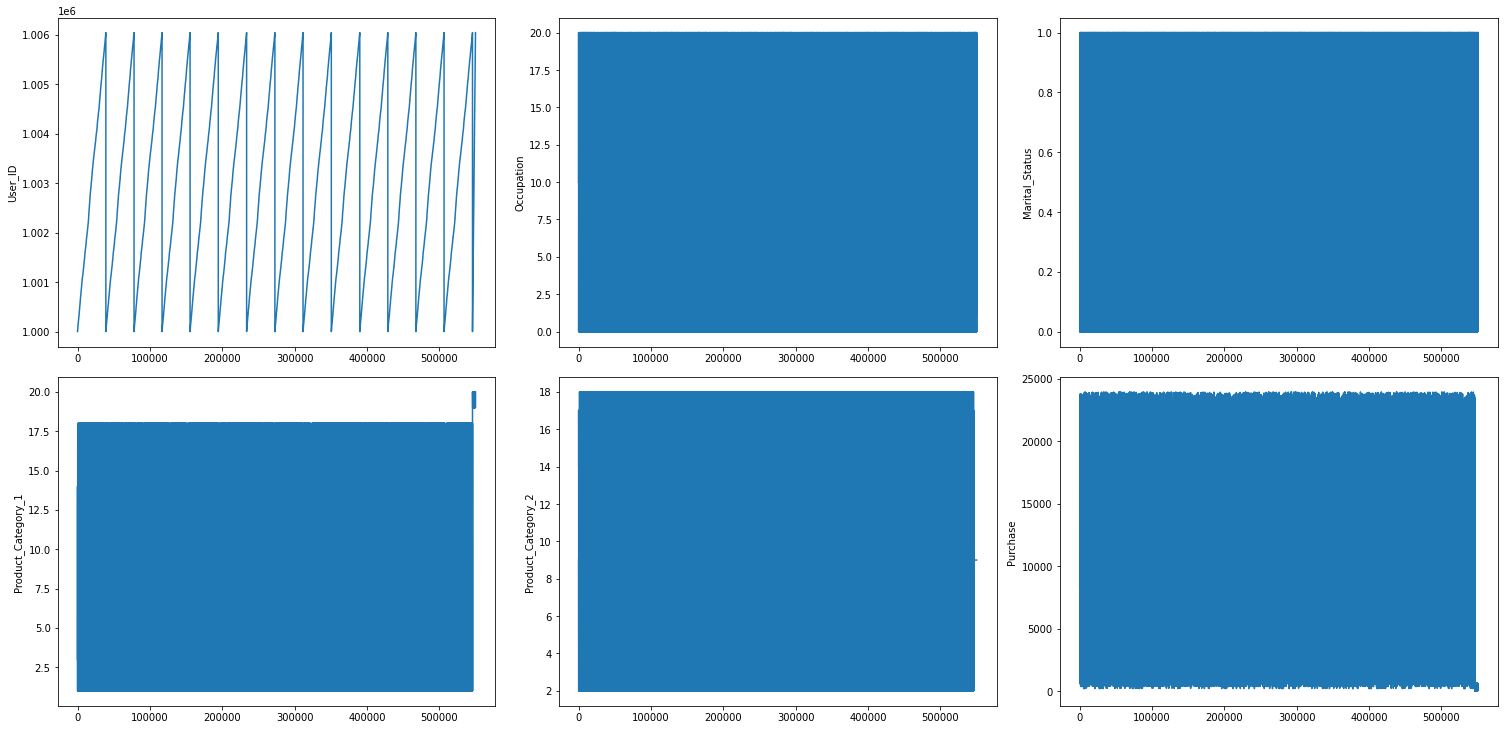

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

### Feature Variables [Categorical]

#### setting the plotting params

In [ ]:
# Defining the params
target_var = "Purchase"
#num_cols = df.select_dtypes(exclude='category').columns
cat_col_size = len(cat_cols)
cols, rows = (3, cat_col_size//3 + 1) if cat_col_size > 5 else (5, 1) 
figsize = (cols*7, rows*5)

In [ ]:
cat_cols

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

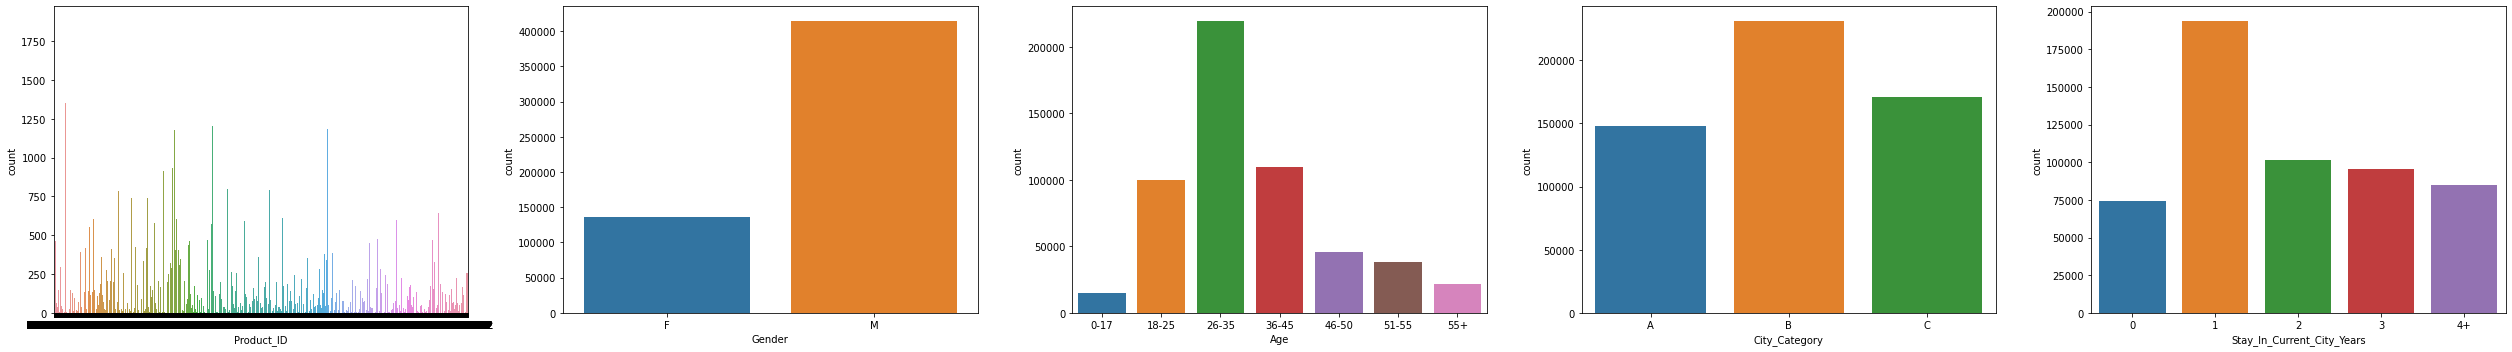

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(cat_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.countplot(x=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

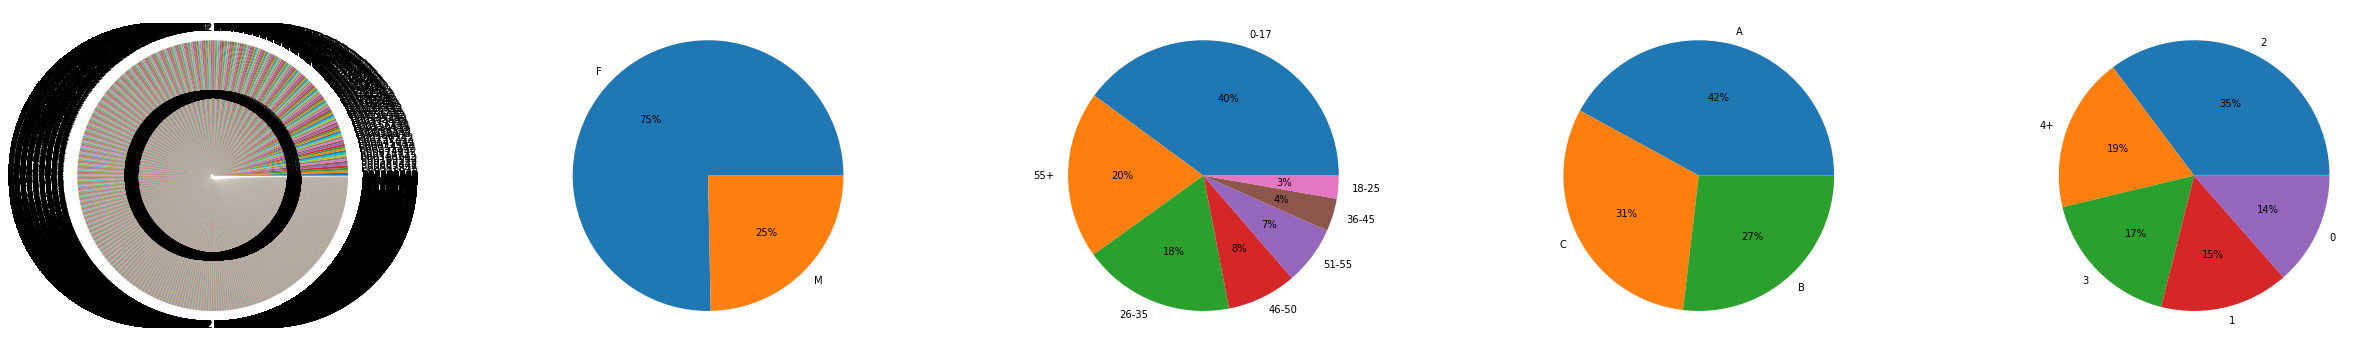

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(cat_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
  
    # boxplot
    plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct="%.0f%%");
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

## Relations

### Quick Variable Relation

In [ ]:
def rel_filter(df:pd.DataFrame, th:float)->pd.DataFrame:
  # Calculating the relations
  corr = df.corr()

  # filtering the relations
  filtered_corr = corr[corr > th]  if th > 0.0 else corr[corr < th]

  return filtered_corr

def rel_plotter(corr:pd.DataFrame, title:str="Correlations", figsize:tuple=None, cmap="Blues", annot=True):
  
  # plotting configurations
  if figsize != None: plt.figure(figsize=figsize)

  # plotting the relattions
  sns.heatmap(corr, cmap="Blues", annot=True)
  plt.title(title);

def get_relations(corr:pd.DataFrame, th:float)->list:

  # decleration of params
  columns = corr.columns
  is_exceed = (lambda rel: rel > th)  if th > 0 else (lambda rel: rel < th)  

  # getting the column names which exceedes the threashold
  filtered_relations = list()
  for row in columns:
    for col in columns:
        
        # Pass the correaltion with itself
        if col==row: continue

        # Collect variables which exvide threashold correlation 
        cur_corr = corr.loc[row, col]
        if  is_exceed(cur_corr):

          # Check whether the record have already added
          is_already_added = [ all([ e in record for e in [row, col] ])  for record in filtered_relations ]
          
          # Add if it have not already added
          if not any(is_already_added): filtered_relations.append([row, col, np.round(cur_corr, 2)]) 
  
  return filtered_relations

In [ ]:
get_relations(df.corr(), 0.85), get_relations(df.corr(), 0.85)

([], [])

In [ ]:
get_relations(df.corr(), 0.5), get_relations(df.corr(), 0.5)

([], [])

In [ ]:
get_relations(df.corr(), (-0.7)), get_relations(df.corr(),  (-0.7))

([], [])

In [ ]:
get_relations(df.corr(), -0.5), get_relations(df.corr(), -0.5)

([], [])

In [ ]:
def get_var_corrs(df:pd.DataFrame, var:str, top_n:int=5, th:float=None):
  # checking the params whether valid
  if var not in df.columns: raise f"'{var}' column does not exist in the dataframe"

  # Calculating the correlation
  var_corrs = df.corr()[var].drop(var)

  # Filtering & sorting 
  if th != None:

    # Filtering
    filter = (lambda df: df[df > th] )  if th > 0 else (lambda df: df[df < th]) 
    var_corrs = filter(var_corrs)
    
    # Sorting
    is_asc = False if th > 0 else True
    var_corrs = var_corrs.sort_values(ascending=is_asc)
    var_corrs = var_corrs[:top_n]

  return var_corrs

In [ ]:
p_corrs = get_var_corrs(df, target_var, top_n=5, th=0.25)
p_corrs_names = p_corrs.index
p_corrs

Series([], Name: Purchase, dtype: float64)

In [ ]:
n_corrs = get_var_corrs(df, target_var, top_n=5, th=-0.25)
n_corrs_names = n_corrs.index
n_corrs

Product_Category_1   -0.343703
Name: Purchase, dtype: float64

### Correlation

In [ ]:
df.corr()

User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001644    0.000557        0.011526            0.331691   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Purchase  
User_ID                       0.001644  0.004716  
Occupation                    0.000557  0.020833  
Marital_Status                0.011526 -0.000463  
Product_Category_1            0.331691 -0.343703  
Product_Category_2            1.000000 -0.156676  
Purchase                     -0.156676  1.000000

<AxesSubplot:>

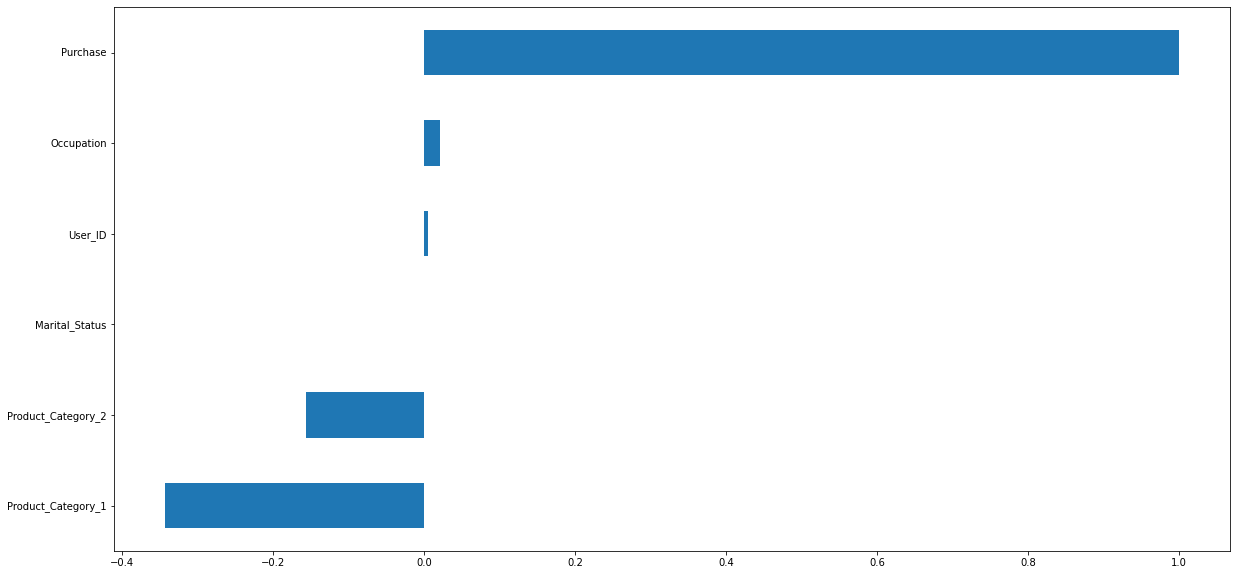

In [ ]:
# Target Variable's correlation
df.corr()[target_var].sort_values().plot(kind="barh", figsize=(20,10))

<AxesSubplot:>

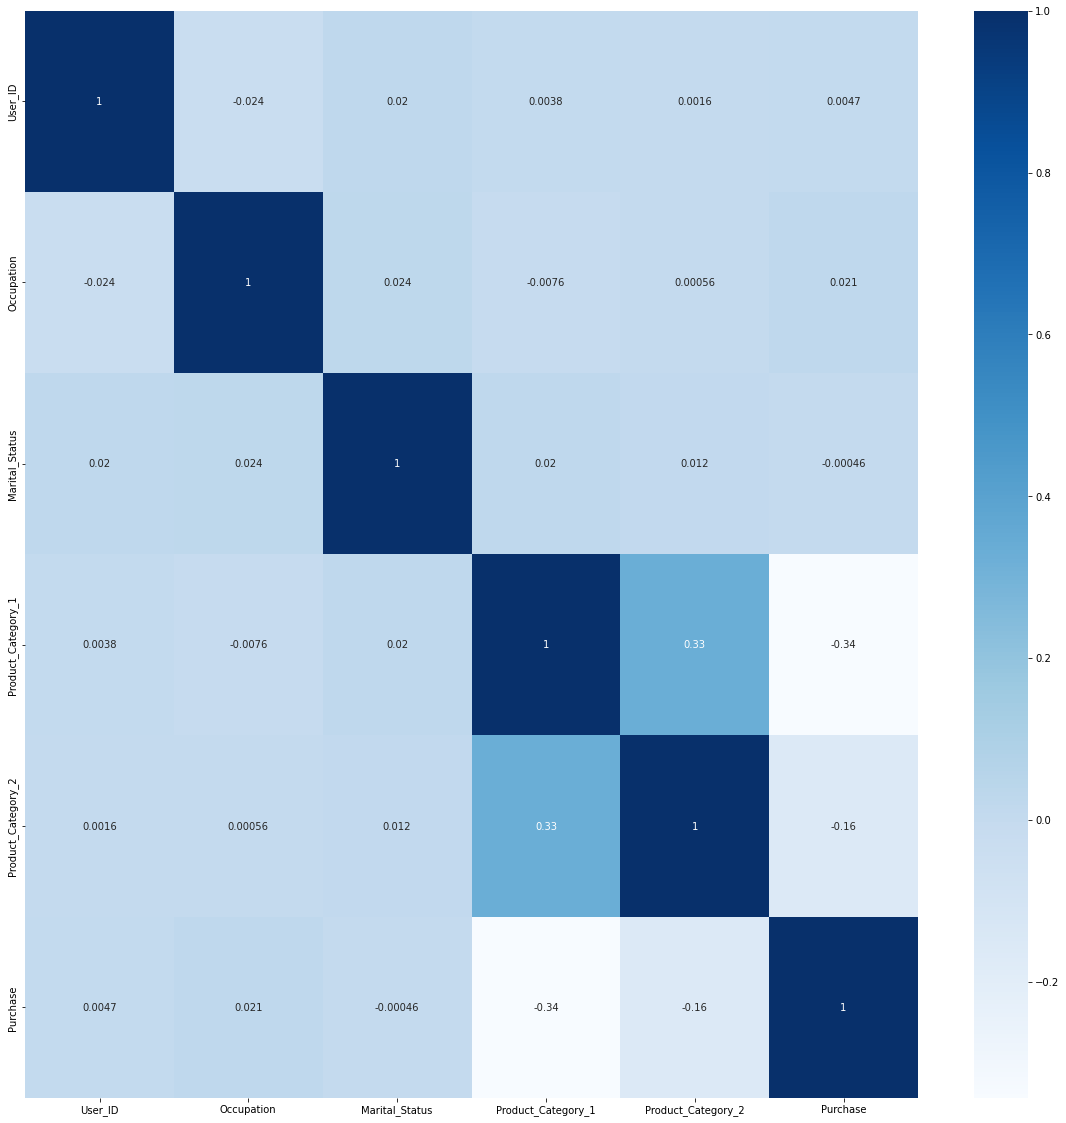

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

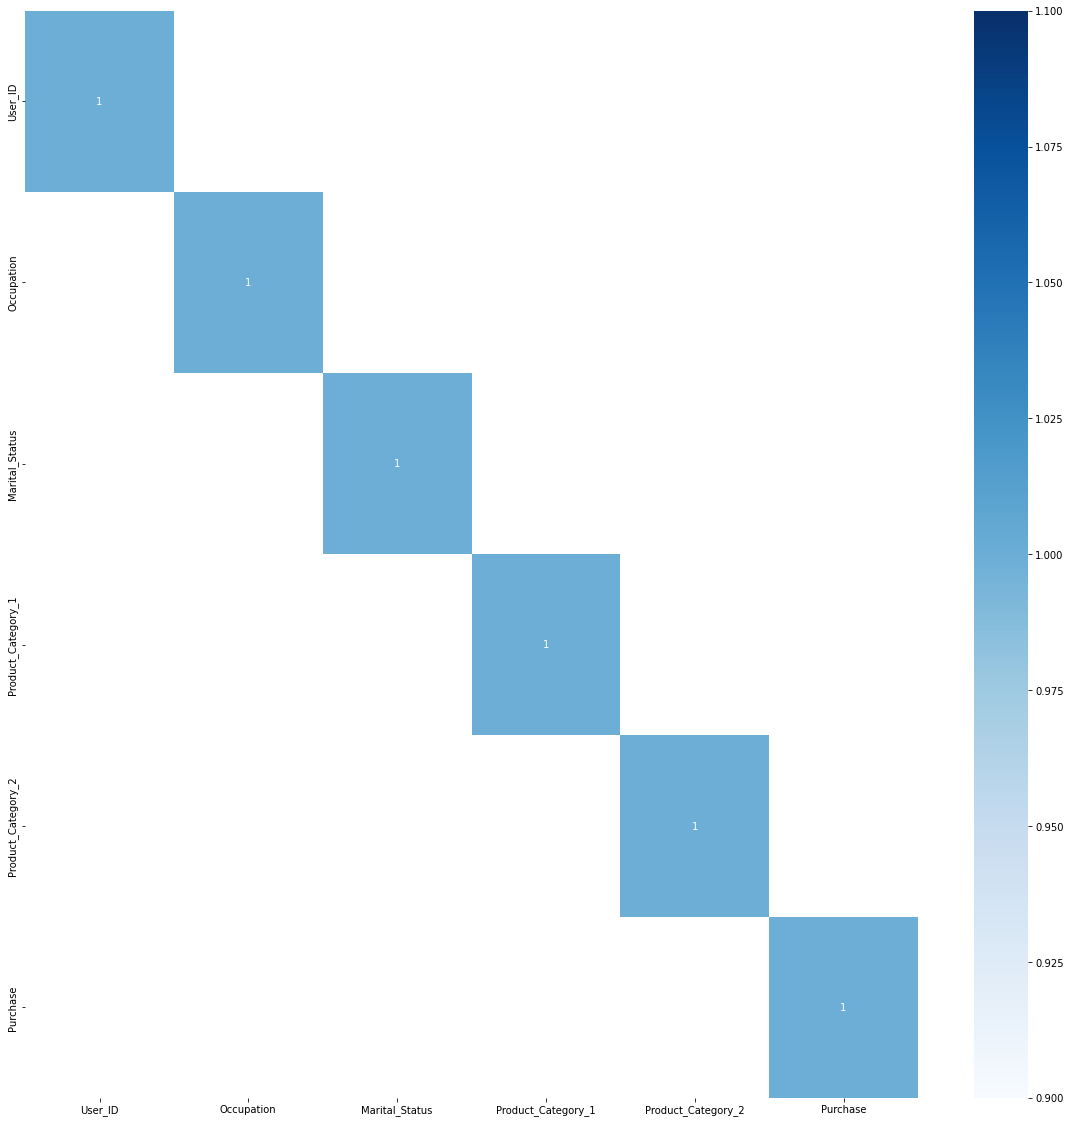

In [ ]:
plt.figure(figsize=(20,20))
th = 0.7
sns.heatmap(df.corr()[df.corr() > th], annot=True, cmap='Blues')

<AxesSubplot:>

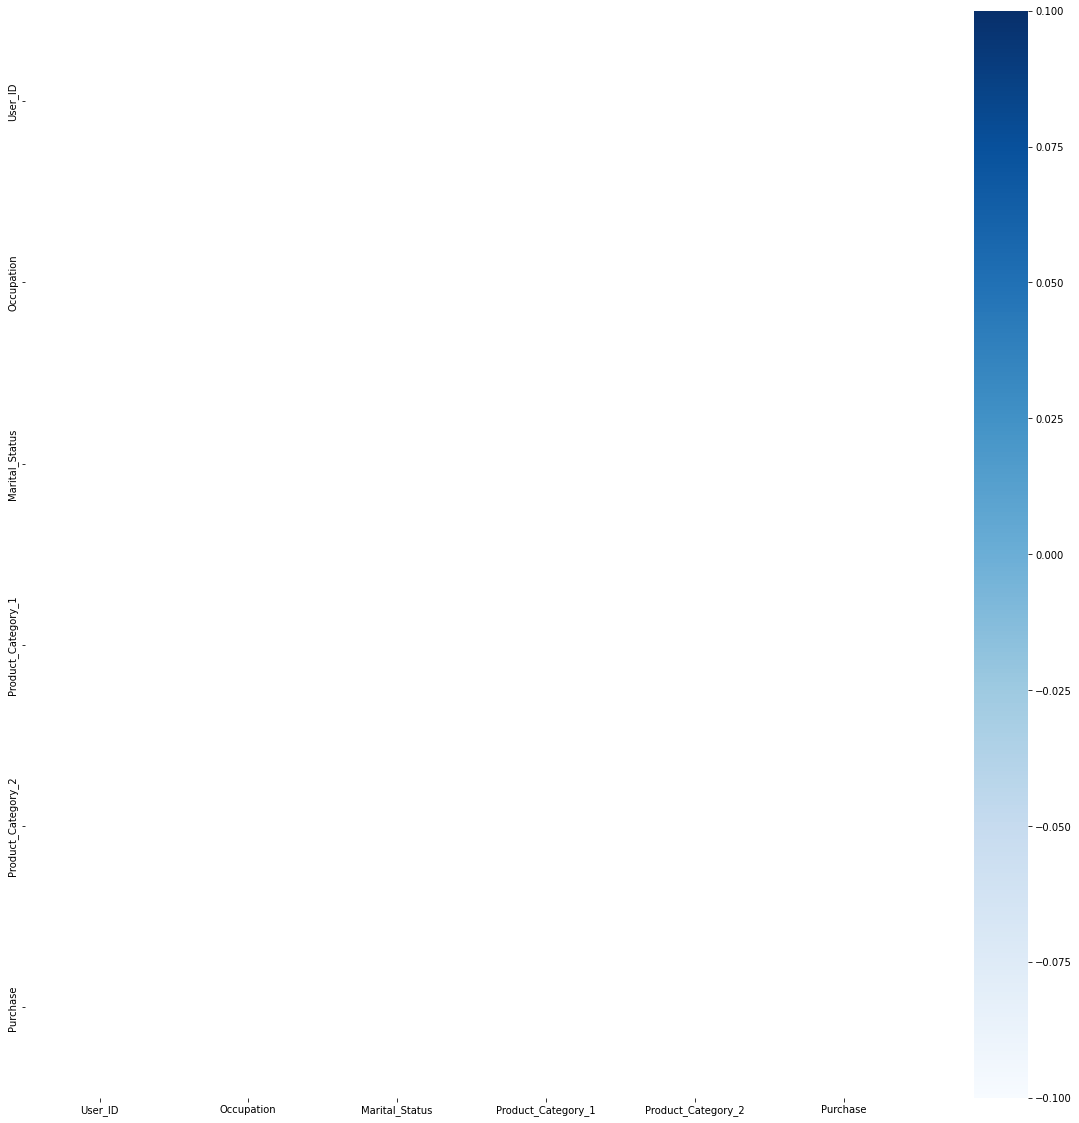

In [ ]:
plt.figure(figsize=(20,20))
th = -0.7
sns.heatmap(df.corr()[df.corr() < th], annot=True, cmap='Blues')

In [ ]:
target_var

'Purchase'

In [ ]:
target_sorted_corrs = df.corr()[target_var].drop(target_var).sort_values(ascending=False)
target_sorted_corrs

Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_2   -0.156676
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

### Variances

In [ ]:
import numpy as np
variance_per_var = np.round(df.var().sort_values(ascending=False), 2)
variance_per_var

Purchase              25231185.95
User_ID                2984572.69
Occupation                  42.55
Product_Category_2          17.86
Product_Category_1          15.49
Marital_Status               0.24
dtype: float64

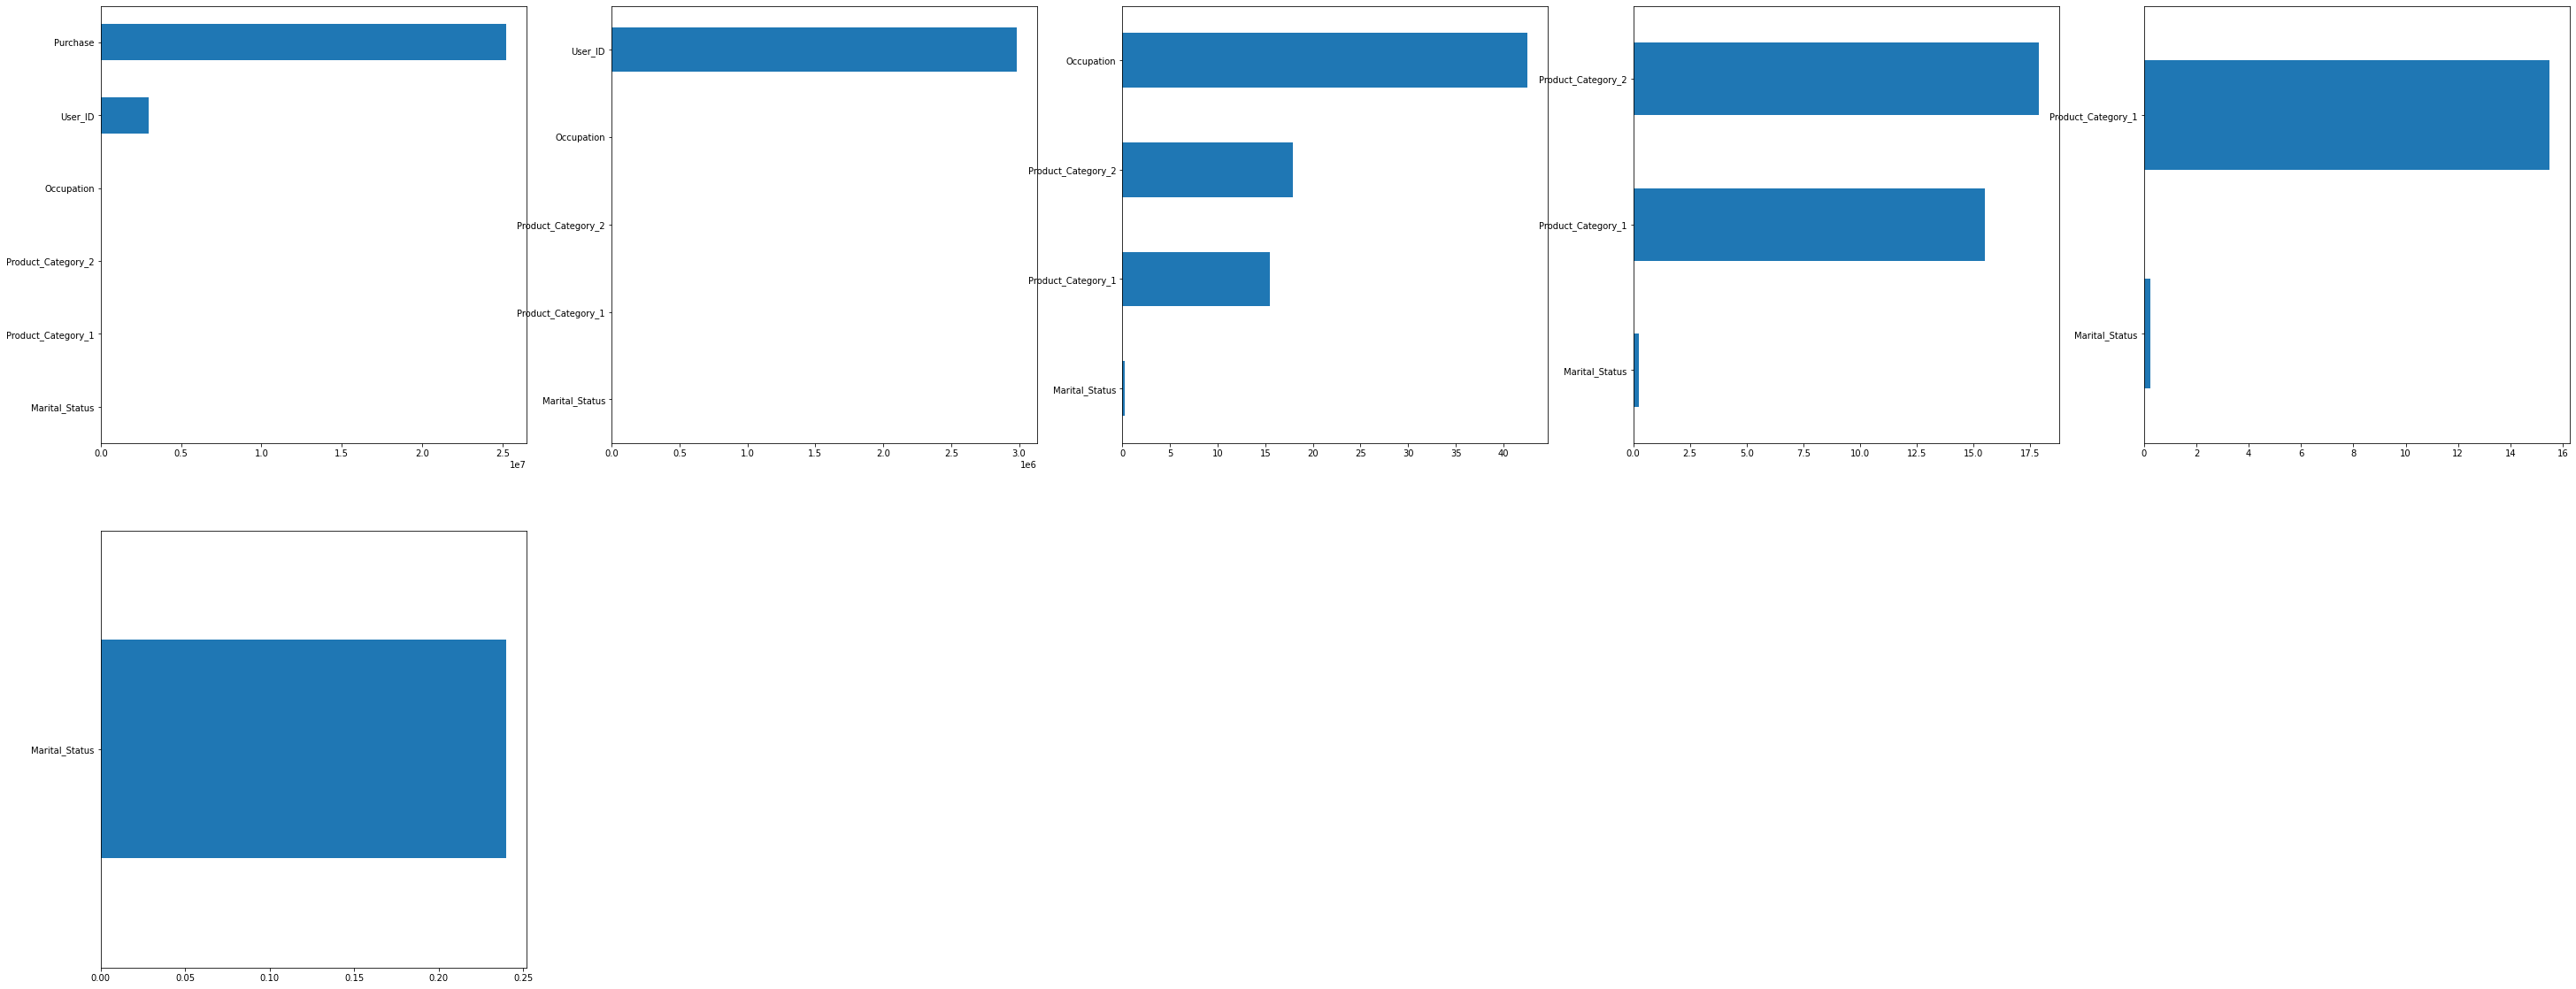

In [ ]:
size = len(variance_per_var.index)
rs,cs = (size//5+1, 5) if size >= 5 else  (size//3+1, 3)

plt.figure(figsize=(cs*10, rs*10))
for i, col_name in enumerate(variance_per_var.index):
  plt.subplot(rs, cs, i+1)
  variance_per_var[col_name:].sort_values(ascending=True).plot.barh();

In [ ]:
df.var().sort_values(ascending=False).round(2)

Purchase              25231185.95
User_ID                2984572.69
Occupation                  42.55
Product_Category_2          17.86
Product_Category_1          15.49
Marital_Status               0.24
dtype: float64

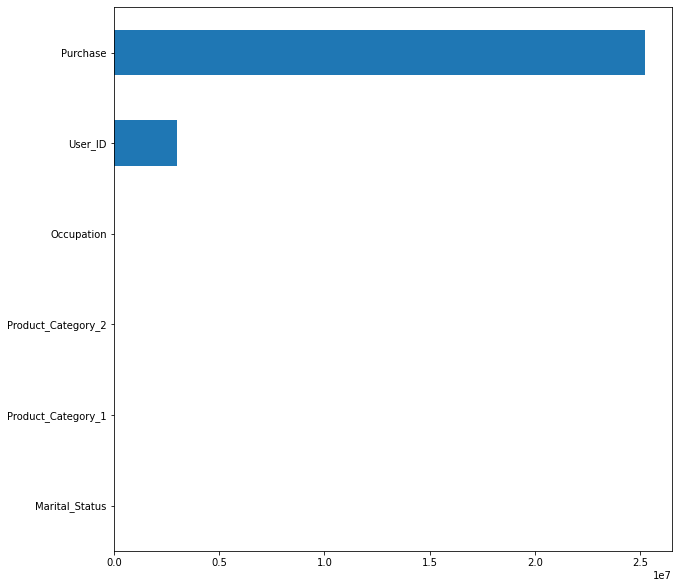

In [ ]:
plt.figure(figsize=(10, 10))
df.var().sort_values(ascending=True).plot.barh();

### Covariance between target var

#### Way-1

In [ ]:
def numerical_covariance(df, target_var):
    # Separate out numerical columns
    numerical_cols = df.select_dtypes(include=[int, float, "int8", bool]).columns

    # Create a copy of the DataFrame with only the numerical columns
    numerical_df = df[numerical_cols].copy()

    # If the target variable is categorical, encode it temporarily
    if df[target_var].dtype == 'object' or df[target_var].dtype == 'category':
        temp_encode = pd.get_dummies(df[target_var], prefix=target_var)
        numerical_df = pd.concat([numerical_df, temp_encode], axis=1)
        target_var = temp_encode.columns[0]

    # Calculate the covariance between each numerical column and the target variable
    covariances = numerical_df.cov()[target_var]

    # Return the result as a pandas Series
    return covariances

In [ ]:
covariances = np.round(numerical_covariance(df, target_var),2)
covariances

User_ID                  40921.59
Occupation                 682.55
Marital_Status              -1.14
Product_Category_1       -6795.65
Product_Category_2       -3325.86
Purchase              25231185.95
Name: Purchase, dtype: float64

<AxesSubplot:>

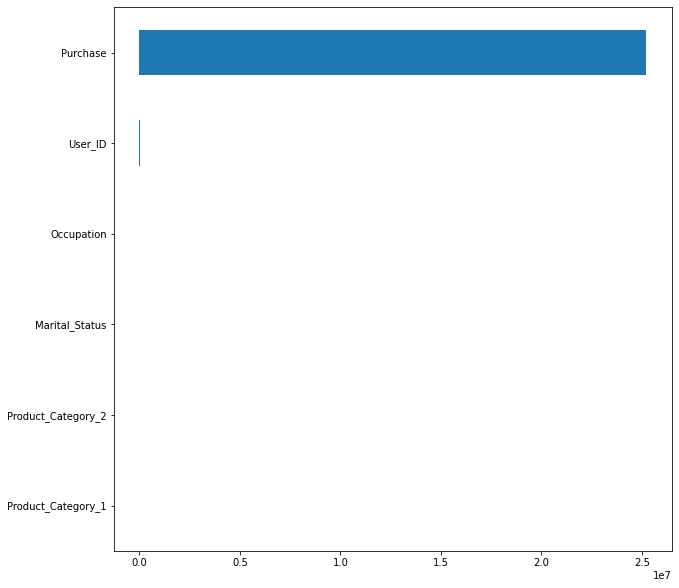

In [ ]:
plt.figure(figsize=(10, 10))
covariances.sort_values(ascending=True).plot.barh()

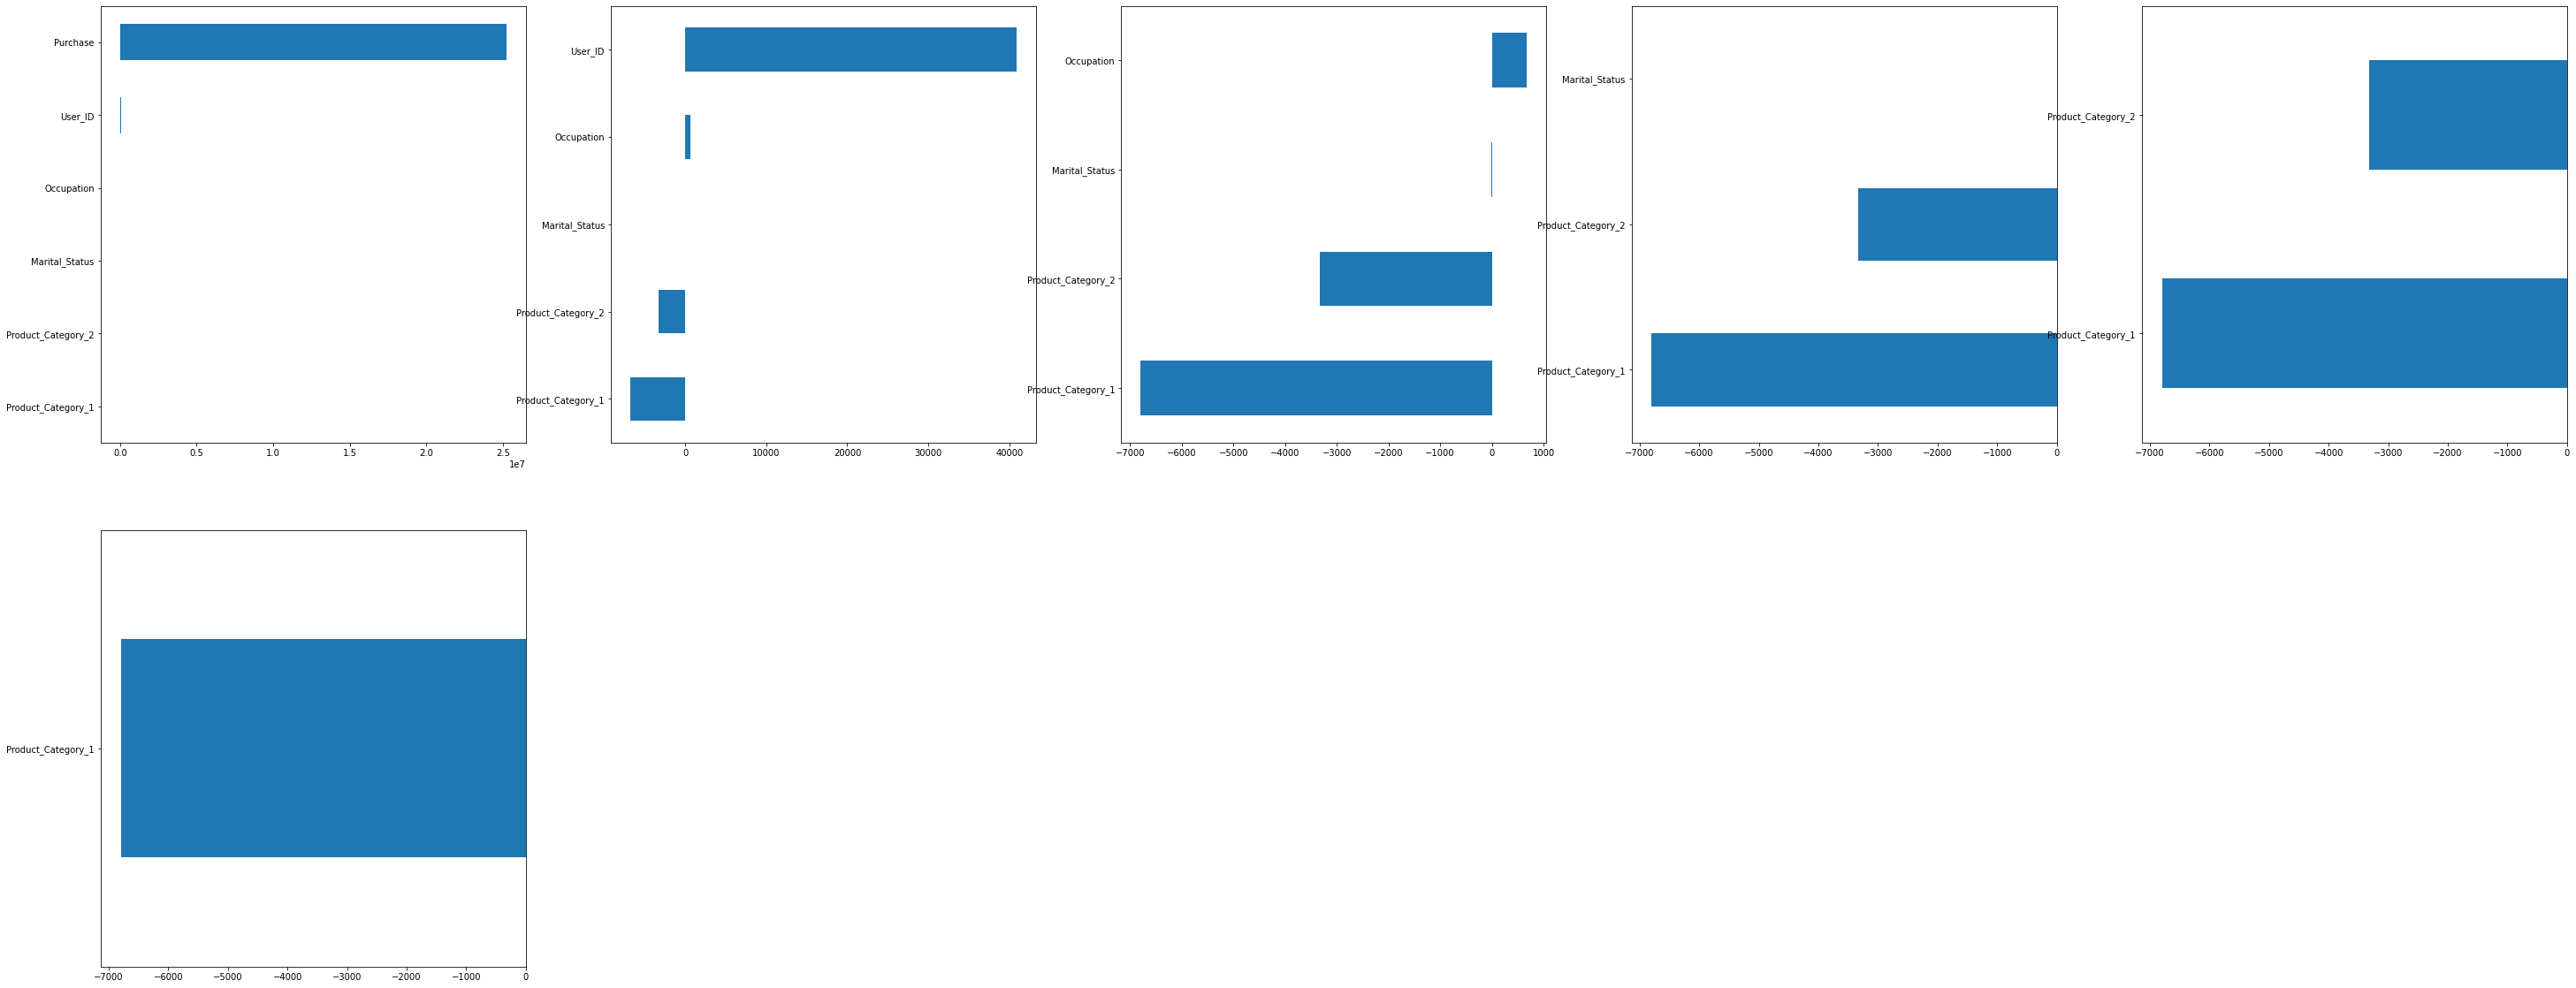

In [ ]:
cov_target = numerical_covariance(df, target_var).sort_values(ascending=False)

size = len(cov_target.index)
rs,cs = (size//5+1, 5) if size >= 5 else  (size//3+1, 3)

plt.figure(figsize=(cs*10, rs*10))
for i, col_name in enumerate(cov_target.index):
  plt.subplot(rs, cs, i+1)
  cov_target[col_name:].sort_values(ascending=True).plot.barh()

#### Way-2
```python
# Calculate the covariance between the target and the feature
cov = {  col: [ np.cov(df[target_var].cat.codes, df[col])[0,1] ] for col in num_cols }
cov_s = pd.Series(np.squeeze(list(cov.values())), index=cov.keys())
cov_s
```

## Bivariate & Multivariate Analysis

In [ ]:
num_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [ ]:
cat_cols

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [ ]:
len(df.columns) == (len(num_cols) + len(cat_cols))

True

<AxesSubplot:>

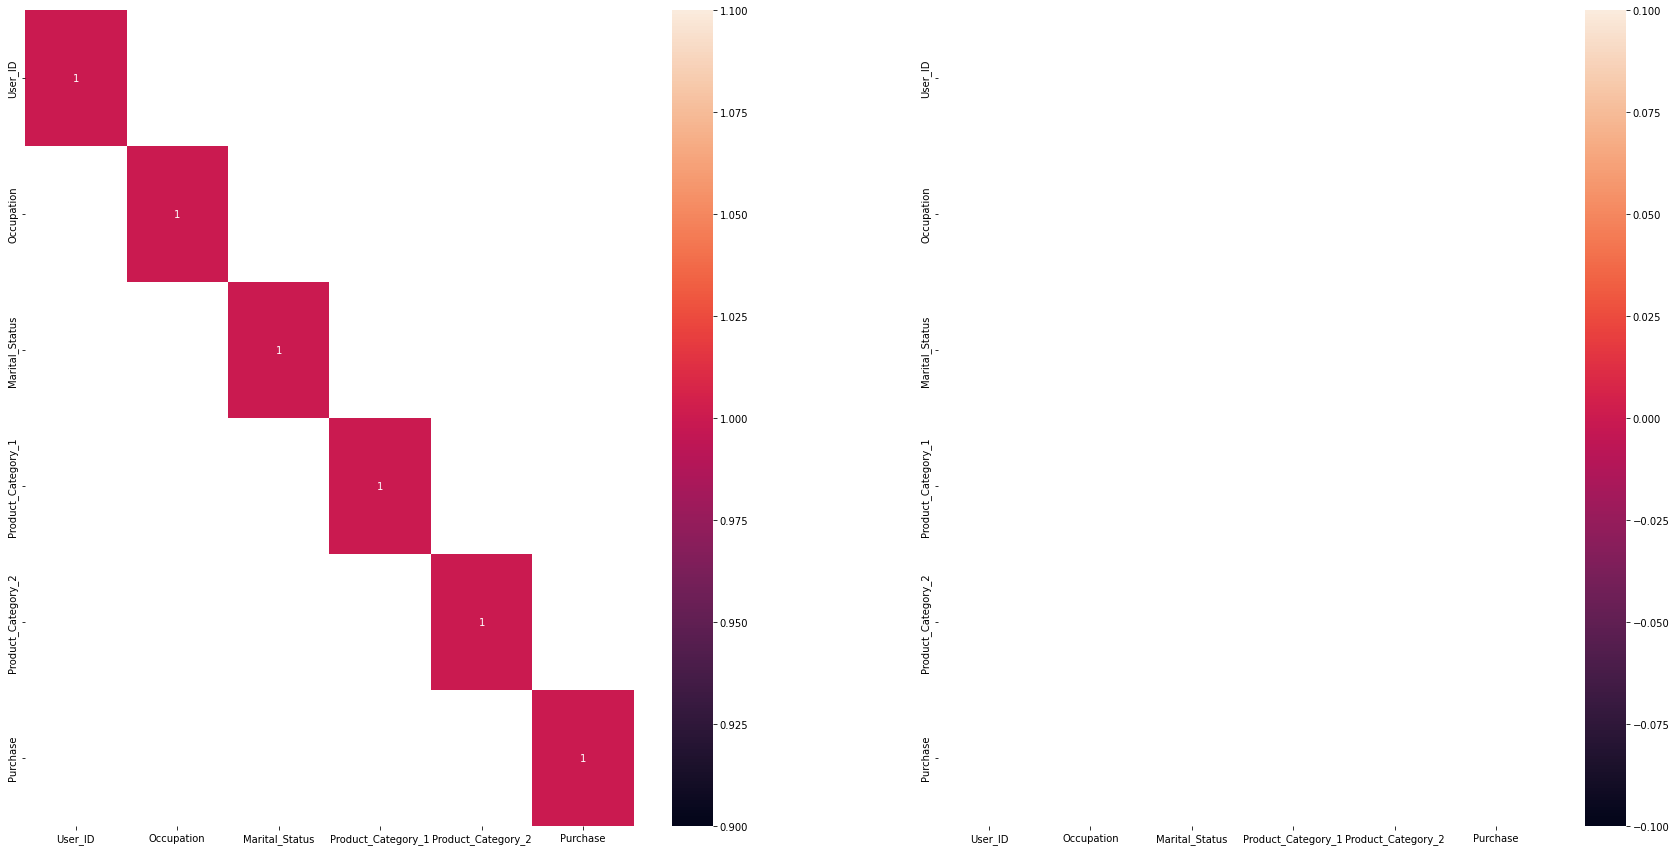

In [ ]:
tmp_corrs = df.corr()

plt.figure(figsize=(30,15))

plt.subplot(1,2,1)
sns.heatmap(tmp_corrs[tmp_corrs>0.5], annot=True)

plt.subplot(1,2,2)
sns.heatmap(tmp_corrs[tmp_corrs < -0.5], annot=True)

<AxesSubplot:>

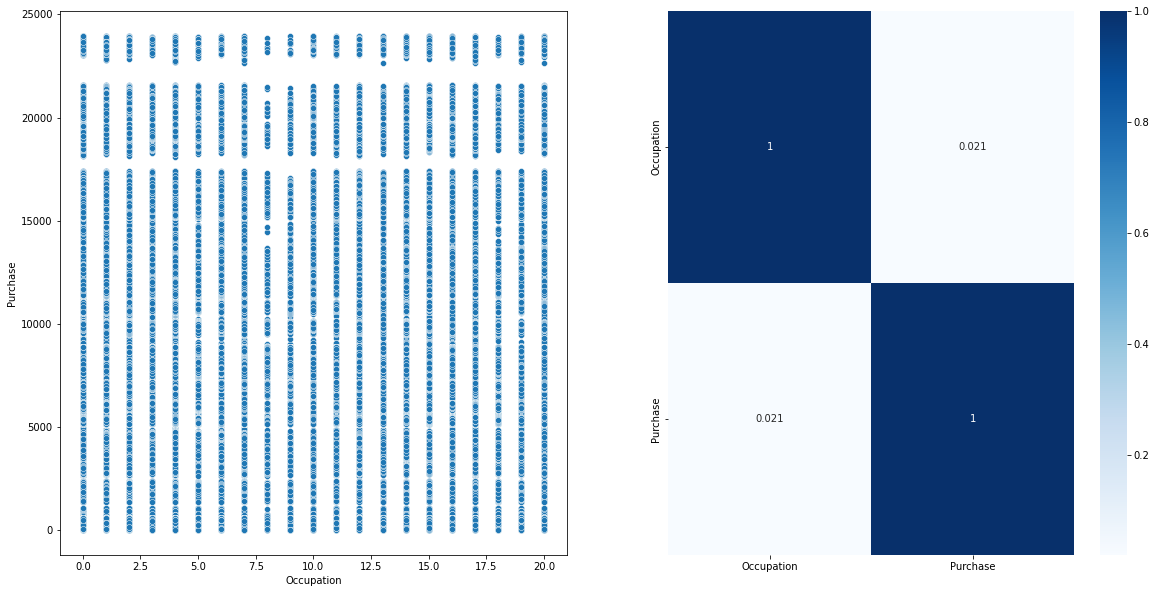

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(df[target_sorted_corrs.index[0]], df[target_var])

plt.subplot(1,2,2)
tmp_corr=df[[target_sorted_corrs.index[0], target_var]].corr()
sns.heatmap(tmp_corr, annot=True,cmap='Blues')

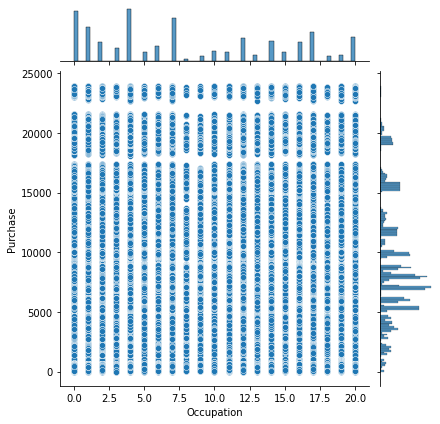

In [ ]:
sns.JointGrid(df[target_sorted_corrs.index[0]], df[target_var]).plot(sns.scatterplot, sns.histplot);

<AxesSubplot:>

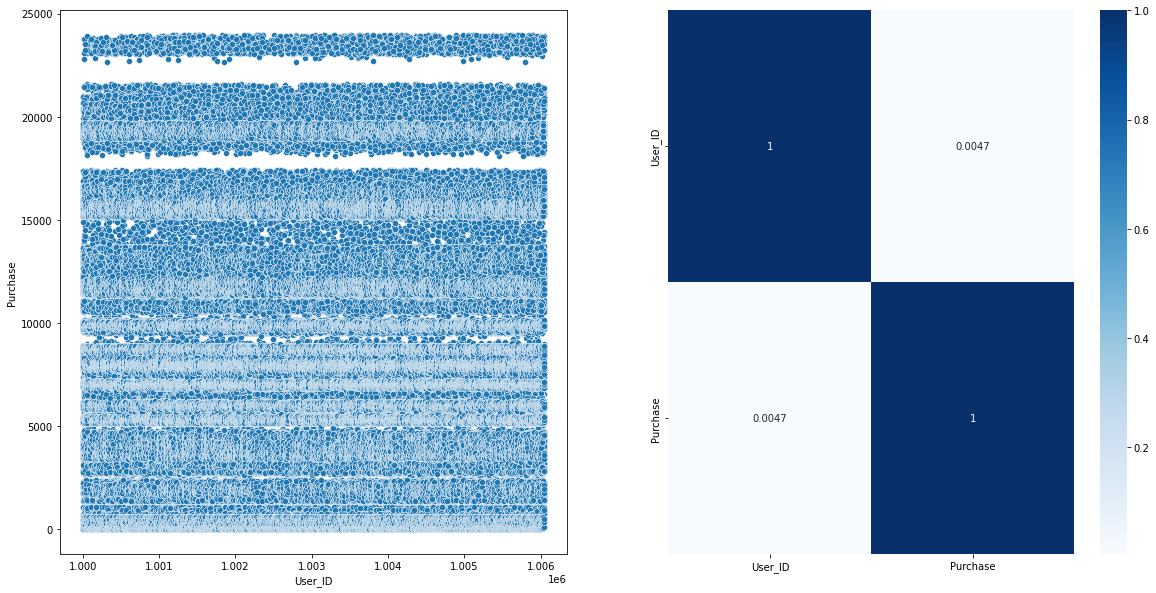

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(df[target_sorted_corrs.index[1]], df[target_var])

plt.subplot(1,2,2)
tmp_corr=df[[target_sorted_corrs.index[1], target_var]].corr()
sns.heatmap(tmp_corr, annot=True,cmap='Blues')

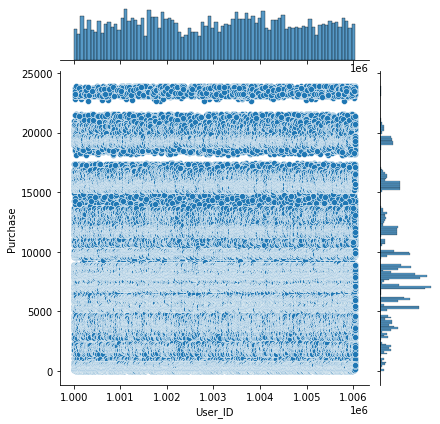

In [ ]:
sns.JointGrid(df[target_sorted_corrs.index[1]], df[target_var]).plot(sns.scatterplot, sns.histplot);

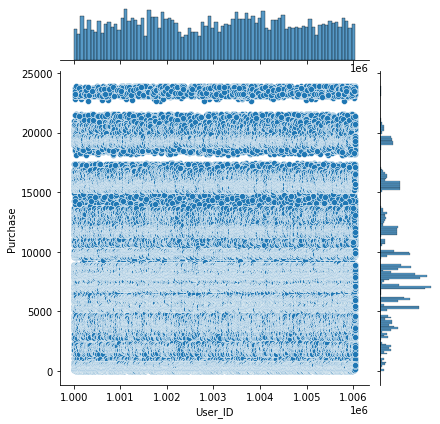

In [ ]:
sns.JointGrid(df[target_sorted_corrs.index[1]], df[target_var]).plot(sns.scatterplot, sns.histplot);

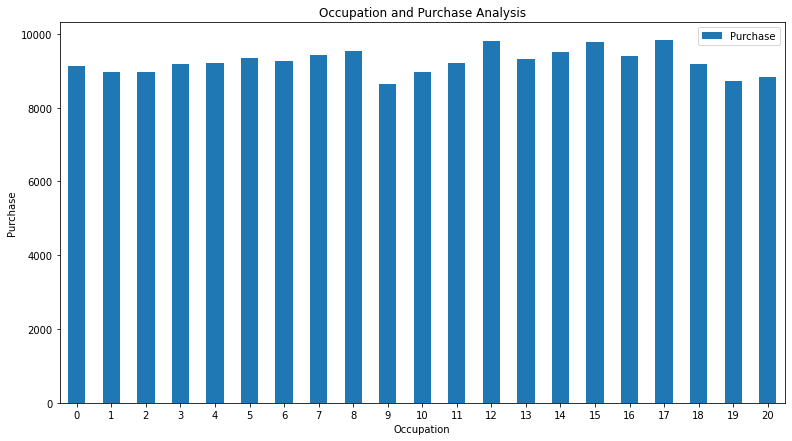

In [ ]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

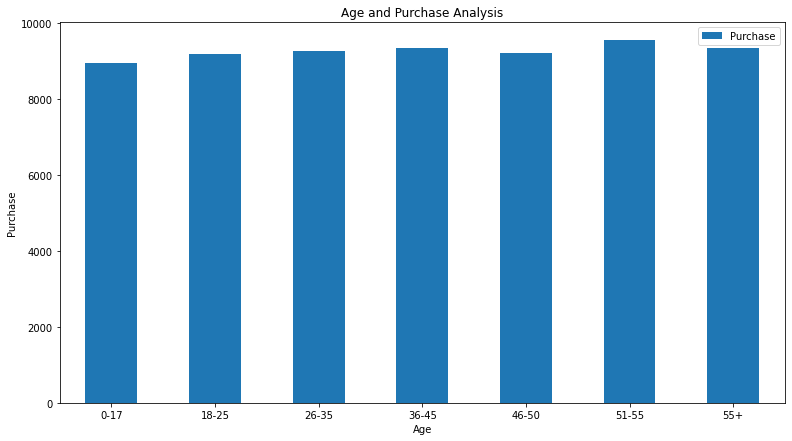

In [ ]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

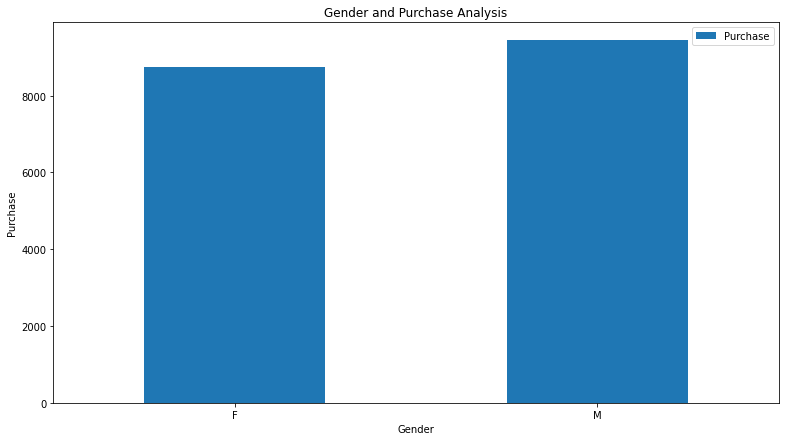

In [ ]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

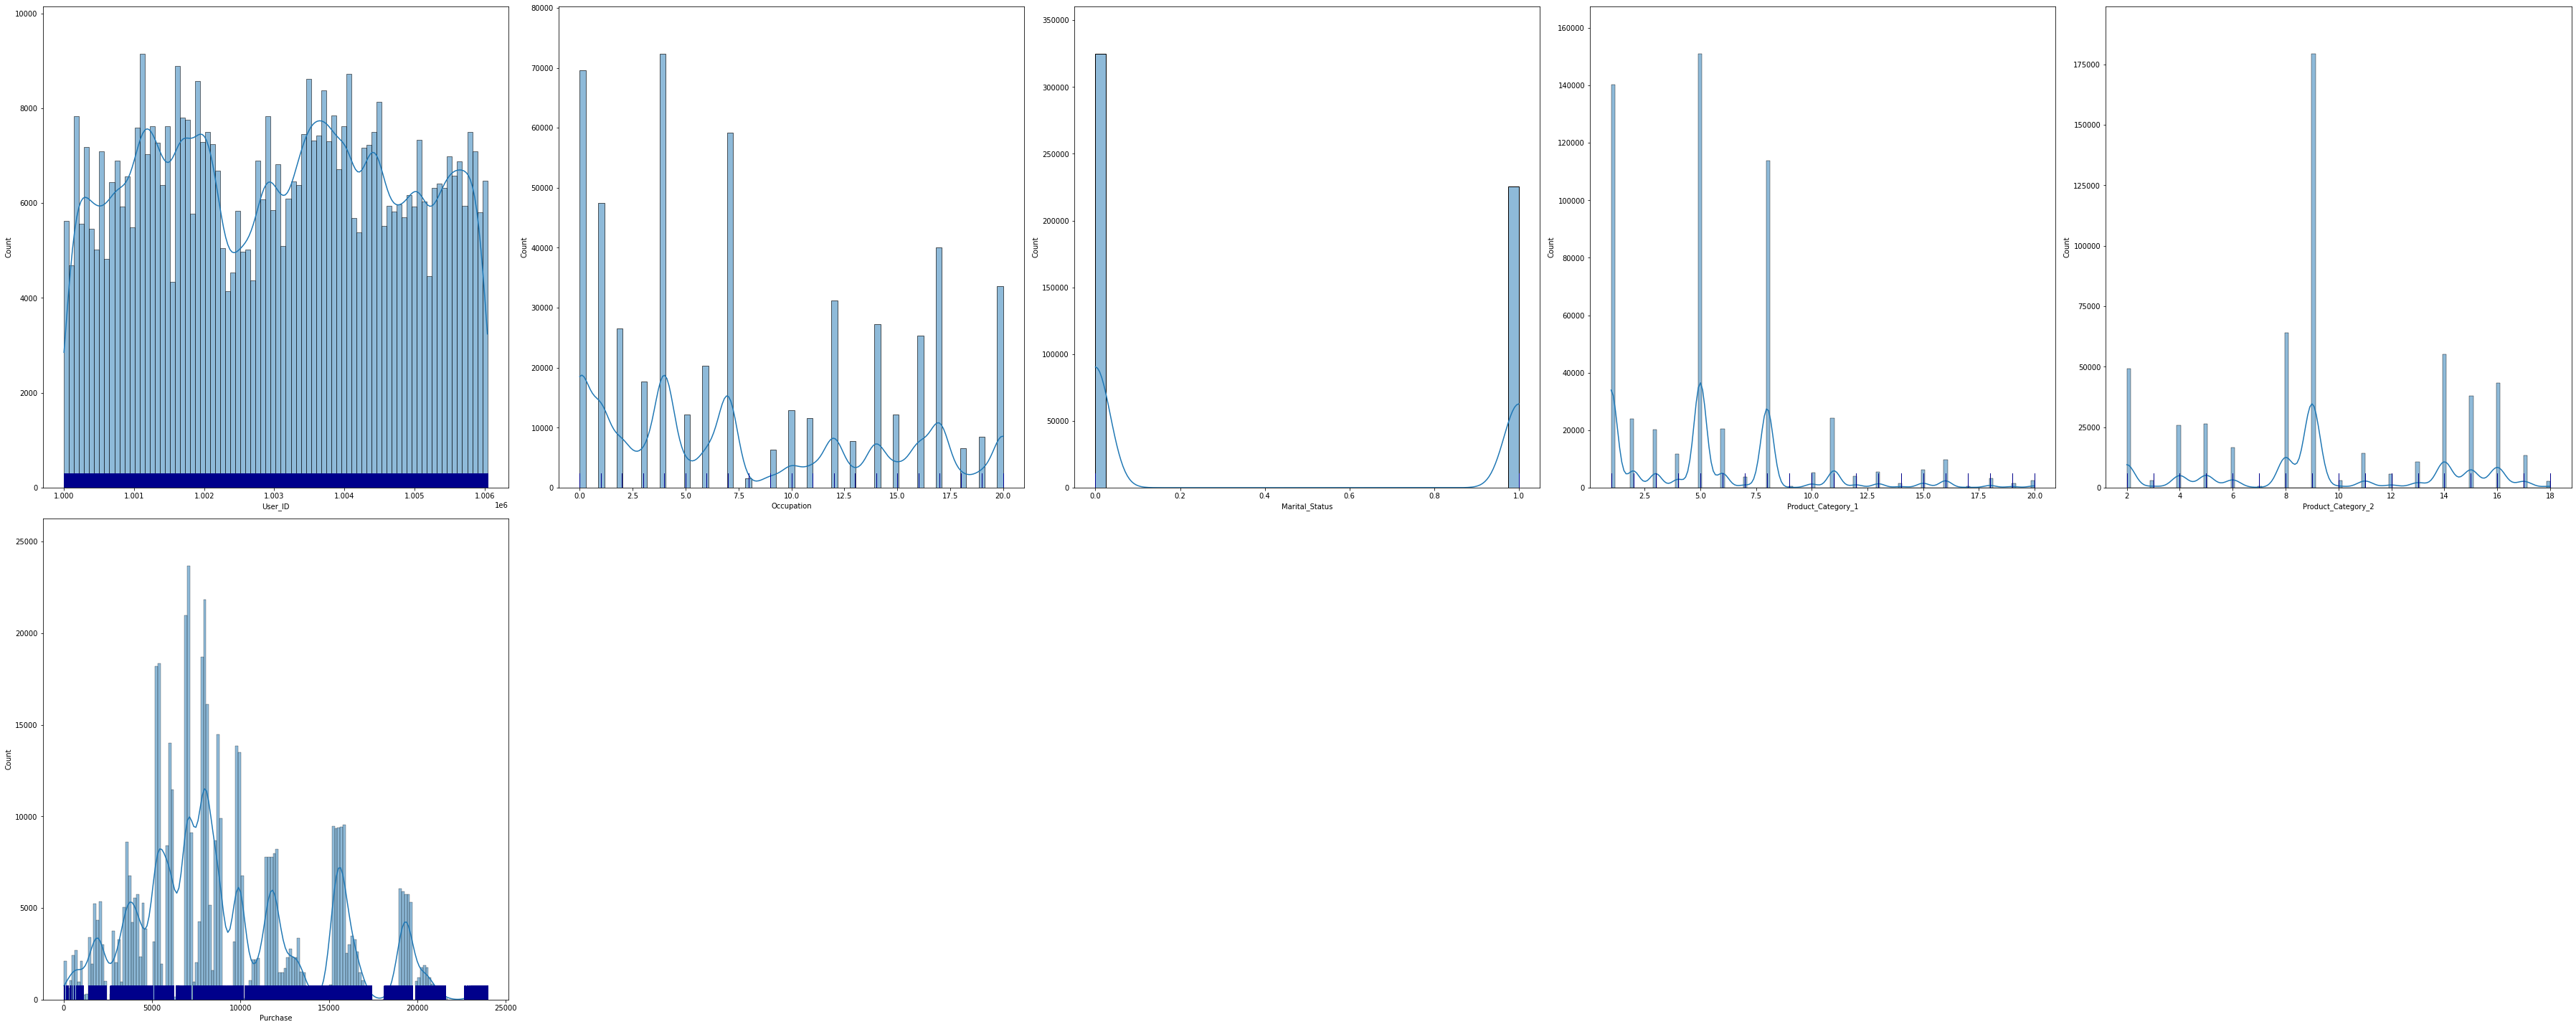

In [ ]:
size = len(num_cols)
cs, rs = (5,size//5+1) if size>=5 else (3,size//3+1)

fig = plt.figure( figsize=(cs*10, rs*10))
for i, col in enumerate(num_cols):
    plt.subplot(rs,cs,i+1)
    sns.histplot(x=df[col], data=df, kde=True) #  hue=df[target_var],
    sns.rugplot(x=df[col], data=df,  height=.03, color='darkblue') # hue=df[target_var],
    
fig.tight_layout()  
plt.show()

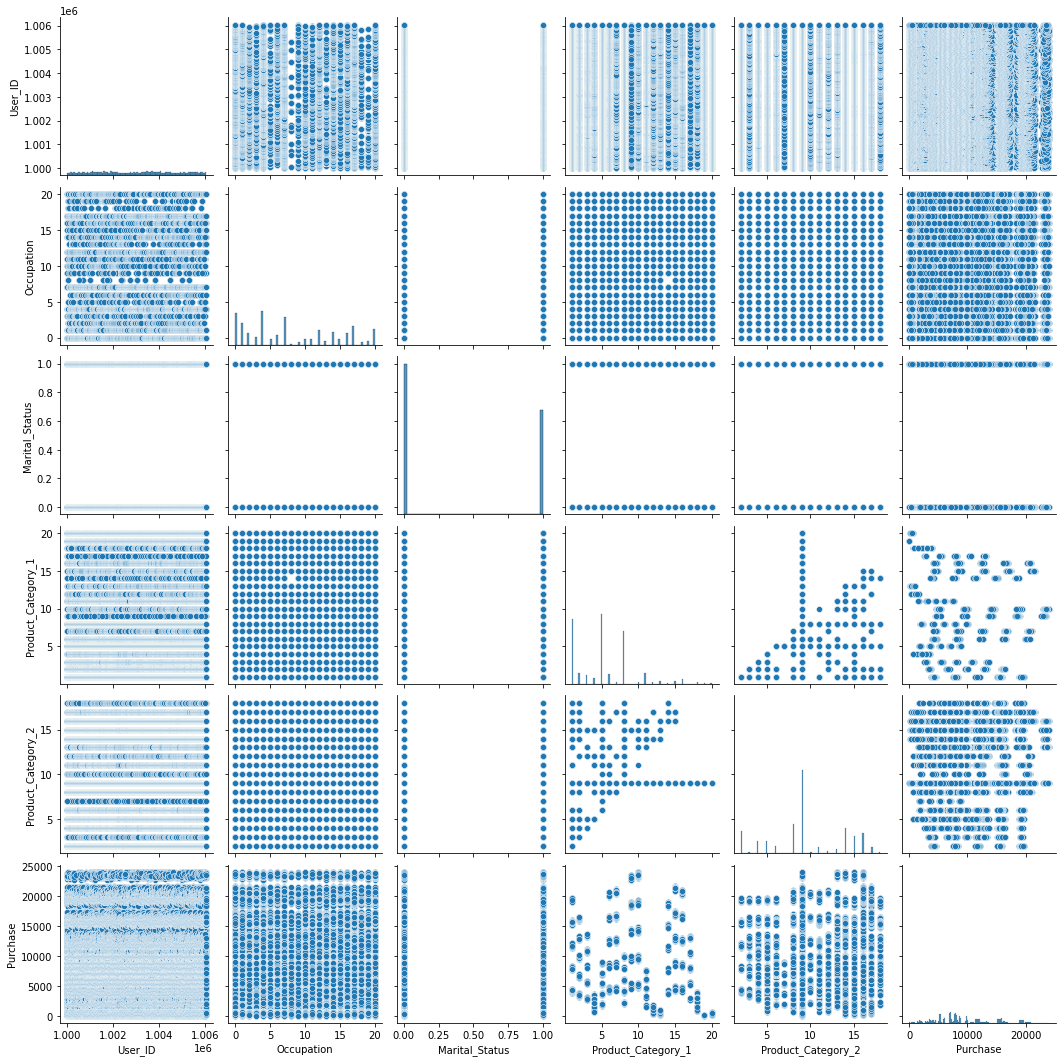

In [ ]:
sns.pairplot(df[num_cols]);
# sns.pairplot(df[num_cols], hue=target_var);

```python
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df.select_dtypes(exclude=[bool]), diag_sharey=False) # hue=target_var
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot)
g.map(sns.rugplot);
g.add_legend();
```

```python
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df.select_dtypes(exclude=[bool]), diag_sharey=False) # , hue=target_var
g.map_upper(sns.scatterplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.lineplot)
g.map(sns.rugplot)
g.add_legend();
```

```python
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df) # ,  hue=target_var
g.map_upper(sns.scatterplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.lineplot)
g.map(sns.rugplot)
g.add_legend();
```

```python
row_size, col_size = len(num_cols), len(num_cols)
fig = plt.figure( figsize=(row_size*3, row_size*3))
for i, row in enumerate(num_cols):
    for j, col in enumerate(num_cols):
        ax=fig.add_subplot(row_size, col_size, (i*col_size)+j+1)
        sns.lineplot(data= df, x=row, y=col, ax=ax) # hue=target_var,
        
fig.tight_layout()  
plt.show()
```

```python
row_size = col_size = len(df.columns)
fig = plt.figure( figsize=(row_size*3, row_size*3))
for i, row in enumerate(num_cols):
    for j, col in enumerate(num_cols):
        ax=fig.add_subplot(row_size, col_size, (i*col_size)+j+1)
        sns.lineplot(data= df, x=row, y=col, ax=ax) #  hue=target_var,
        
fig.tight_layout()  
plt.show()
```

# (E) Model Selection (Classic ML models)

#### Utils

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, name, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize=(20,20)):

    # checking the params
    if ylim is not None: plt.ylim(*ylim)
    
    # pre-declerations
    orange, blue = "#ff9124", "#2492ff"

    # Extracting the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Extracting the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # calculating params    
    tra_left_edge = train_scores_mean - train_scores_std
    tra_right_edge = train_scores_mean + train_scores_std

    test_left_edge = test_scores_mean - test_scores_std
    test_right_edge = test_scores_mean + test_scores_std

    # transparent plot for confidence value range
    plt.fill_between(train_sizes, tra_left_edge, tra_right_edge, alpha=0.1, color=orange)
    plt.fill_between(train_sizes, test_left_edge, test_right_edge, alpha=0.1, color=blue)
    
    # Plotting as point
    plt.plot(train_sizes, train_scores_mean, 'o-', color=orange, label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=blue, label="Cross-validation score")
    
    # Configurating the plottings
    plt.title(f"{name} Learning Curve", fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

def get_learning_curve_stats(clfs, X_train, y_train, cv, model_size, rs, cs, figsize, ylim):

  plt.figure(figsize=figsize)
  # EXtracting the learning curve and validation metrics
  best_models_cross_val_preds, roc_auc_scores = {}, {}
  for i, (name, model) in enumerate(clfs.items()):

    # Training with best models again (the best params already saved inside) for visualizate the duration.
    plt.subplot(rs, cs, i+1)
    print(f"{i}.turn [{name}], plotting learning curve")
    plot_learning_curve(model, name, X_train, y_train, ylim, cv=cv, n_jobs=-1, figsize=figsize) 

    # validating the trained models
    #print(f"{i}.turn, cross_validation")
    #method = "decision_function" if name in ["loj_reg", "svc"] else "predict"
    #best_models_cross_val_preds[name]  = cross_val_predict(model, X_train, y_train, cv=5, method=method)

    # Displating the roc scores
    #print(f"{i}.turn, roc_auc_scores")
    #roc_auc_scores[name] = roc_auc_score(y_train, best_models_cross_val_preds[name])
    #print(f'{name:<20}: ',roc_auc_scores[name])

  return plt.gcf()#, best_models_cross_val_preds#, roc_auc_scores

```python
# Example Usage
model_size = len(us_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=100, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (40,20),
    "ylim" : (0.87, 1.01)
}

lc_plot, best_models_cross_val_preds, roc_auc_scores  = get_learning_curve_stats(us_models, figsize=(40,10), **lcs_params)
```

## Prepare The Data To Training

### Remove Unnessesary Variables

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [ ]:
df.drop(columns=['User_ID', 'Product_ID'], inplace=True)

### Encoding the categorical variables

##### Label Encoding

In [ ]:
cat_cols = df.select_dtypes(include=("object","category")).columns
num_cols = df.select_dtypes(exclude=("object","category")).columns

In [ ]:
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 'Outlet_Identifier'
encoders = {}
for col in cat_cols:
  # creating encoder for current variable
  encoders[col]= LabelEncoder()

  # Label encoding
  df[col] = encoders[col].fit_transform(df[col])

In [ ]:
ex_var = cat_cols[0]
df[ex_var].unique(), encoders[ex_var].inverse_transform(df[ex_var].unique())

(array([0, 1]), array(['F', 'M'], dtype=object))

In [ ]:
ex_var = cat_cols[1]
df[ex_var].unique(), encoders[ex_var].inverse_transform(df[ex_var].unique())

(array([0, 6, 2, 4, 5, 3, 1]),
 array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
       dtype=object))

##### Onehot Encoding
```python
df.drop(columns=["Item_Type"], inplace=True)
```


```python
one_hot_encoding_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
df = pd.get_dummies(df, columns=one_hot_encoding_cols)
df.head()
```
```python
one_hot_encoding_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
df_test = pd.get_dummies(df_test, columns=one_hot_encoding_cols)
df_test.head()
```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 37.8 MB


### Splitting the dataset
```python
# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# train, validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
```

In [ ]:
target_var

'Purchase'

In [ ]:
X = df.drop(columns=[target_var])
y = df[target_var]

#### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Util Functions
- Utils functions for model tuning

### Greedy Step tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def greedy_search(model, params:dict, X_train, y_train, cv=10, n_jobs=-1, verbose=2, is_print=False):
  """It tunes params individually step by step . select best value on current step.
  It assumes the params sorted by importance on the model as descending. 
  The important param, second important param, etc.... 
  """
  
  best_params = {}
  for name, values in params.items():
    # Initial params
    best_params[name] = values

    if is_print: print("before:");pprint(best_params);
    
    # create GridSearch&Train 
    cv_model = GridSearchCV(model, best_params, cv=cv, n_jobs=n_jobs, verbose=verbose)
    cv_model.fit(X_train, y_train)

    # Update the param
    best_params[name] = [cv_model.best_params_[name]]
    
    if is_print: print("after:");pprint(best_params);print("-"*25, end="\n\n");

  return cv_model, cv_model.best_estimator_, best_params

### Model Tuner

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


def gen_clf_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common classification metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)

  clf_metrics = {
            "accuracy":accuracy_score(y_test, y_pred),
            "precision" : precision_score(y_test, y_pred, average="micro"),
            "recall": recall_score(y_test, y_pred, average="micro"),
            "f1_score": f1_score(y_test, y_pred, average="micro"),
            "clf_report":classification_report(y_test, y_pred, output_dict=True)
  }

  if return_y_data:
    clf_metrics["y_pred"] = y_pred
    clf_metrics["y_test"] = y_test
            
  
  return clf_metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error

def gen_reg_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common regression metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)


  reg_metrics = {
      "MaxError": np.max(y_test - y_pred),
      "MeanAbsoluteError": median_absolute_error(y_test, y_pred),
      "MeanAbsolutePercentageError": np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
      "MSE": mean_squared_error(y_test, y_pred),
      "RMSE": mean_squared_error(y_test, y_pred, squared=False),
      "MAE": mean_absolute_error(y_test, y_pred),
      "R2":r2_score(y_test, y_pred),
      "ExplainedVariance":explained_variance_score(y_test, y_pred)
  }

  if return_y_data:
    reg_metrics["y_pred"] = y_pred
    reg_metrics["y_test"] = y_test


  return reg_metrics

In [ ]:
import pandas as pd
def tune_models(tuners, X_train, y_train, X_test, y_test, is_clf, cv=10, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
    # Tuning
    cv_model, tuned_model, best_params = greedy_search(model, params, X_train, y_train, cv=cv)
    
    # predicting
    y_pred = tuned_model.predict(X_test)
    metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
    metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

    # Generating results
    cur_results = {
        "tune_results": {
            "cv_model":cv_model,
            "tuned_model":tuned_model,
            "best_params":best_params,
        },
        "metric_results": metric_results
    }
    
    results[name] = cur_results
    metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T


In [ ]:
import pandas as pd
def tune_linear_cv_models(tuners, X_train, y_train, X_test, y_test, is_clf, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
      # Tuning
      tuned_model = model(**params)
      tuned_model.fit(X_train, y_train)
      
      # predicting
      y_pred = tuned_model.predict(X_test)
      metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
      metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

      # Generating results
      cur_results = {
          "tune_results": {
              "tuned_model":tuned_model,
              "best_params":tuned_model.get_params(True) ,#best_params_,
          },
          "metric_results": metric_results
      }
      
      results[name] = cur_results
      metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T

## (1) Linear Models

### Hyperparams

In [ ]:
lin_params = {
    'fit_intercept': [True, False],
    #'normalize': [True, False],
    'copy_X': [True, False],
}
from sklearn.linear_model import LinearRegression
linear_reg = [LinearRegression(), lin_params]

In [ ]:
lasso_params = {
    "alpha": np.logspace(-4, 0, 100).flatten(),
    #'tol': [1e-3, 1e-4],
    #'eps': [1e-2, 1e-3, 1e-4],
    #'fit_intercept': [True, False],
    #'normalize': [True, False],
    #'max_iter': [1000, 5000, 10000],
    'fit_intercept': [True, False],
    #'normalize': [True, False],
    'max_iter': [1000, 5000, 10000]
}

from sklearn.linear_model import Lasso, LassoCV
l1_reg = [Lasso(), lasso_params] 

In [ ]:
ridge_params = {
    "alpha": np.logspace(-4, 0, 100), #p.arange(0.00, 1.0, 0.01), #(10**np.linspace(10,-2,100))*0.5,
    #'normalize': [True, False],
    #'tol': [1e-4, 1e-3, 1e-2],
    'fit_intercept': [True, False],
    #'normalize': [True, False]
}

from sklearn.linear_model import Ridge, RidgeCV 
l2_reg = [Ridge(), ridge_params]

In [ ]:
ElasticNet_params = {
    "alpha": np.logspace(-4, 0, 100),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random'],    
    #'normalize': [True, False],
    'max_iter': [1000, 5000, 10000], 
}
from sklearn.linear_model import ElasticNet, ElasticNetCV 
enet_reg = [ElasticNet(), ElasticNet_params]

In [ ]:
linear_cv_tuners = {
    "l1_reg":l1_reg,
    
    "l2_reg":l2_reg,
    "enet_reg":enet_reg
}
linear_tuners = {
    "lin_reg":linear_reg,
    #**linear_cv_tuners
}

### Tuning Demostration

In [ ]:
lin_results, lin_metric_summary = tune_models(linear_cv_tuners, X_train, y_train, X_test, y_test, cv=10, is_clf=False, is_round=True)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [ ]:
#lin_results, lin_metric_summary = tune_linear_cv_models(linear_cv_tuners, X_train, y_train, X_test, y_test, is_clf=False, is_round=True)

In [ ]:
list(lin_results.keys())

['l1_reg', 'l2_reg', 'enet_reg']

In [ ]:
lin_metric_summary

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError  \
l1_reg     17826.0             2907.0                   109.233910   
l2_reg     17826.0             2907.0                   109.233799   
enet_reg   17824.0             2906.0                   109.234604   

                   MSE         RMSE          MAE        R2  ExplainedVariance  
l1_reg    2.204833e+07  4695.564874  3598.897840  0.129600           0.129605  
l2_reg    2.204832e+07  4695.563909  3598.897786  0.129601           0.129606  
enet_reg  2.204837e+07  4695.569602  3598.892341  0.129599           0.129603

In [ ]:
from pprint import pprint
pprint(lin_results)

{'enet_reg': {'metric_results': {'ExplainedVariance': 0.12960342051366203,
                                 'MAE': 3598.892340974785,
                                 'MSE': 22048373.886868943,
                                 'MaxError': 17824,
                                 'MeanAbsoluteError': 2906.0,
                                 'MeanAbsolutePercentageError': 109.23460395636657,
                                 'R2': 0.12959858378218447,
                                 'RMSE': 4695.569601961933},
              'tune_results': {'best_params': {'alpha': [0.0011233240329780276],
                                               'l1_ratio': [0.5],
                                               'max_iter': [10000],
                                               'selection': ['random'],
                                               'tol': [0.0001]},
                               'cv_model': GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.

In [ ]:
#tuned_model
lin_results.keys()

dict_keys(['l1_reg', 'l2_reg', 'enet_reg'])

In [ ]:
lin_results["l1_reg"].keys()

dict_keys(['tune_results', 'metric_results'])

In [ ]:
lin_results["l1_reg"]["tune_results"].keys()

dict_keys(['cv_model', 'tuned_model', 'best_params'])

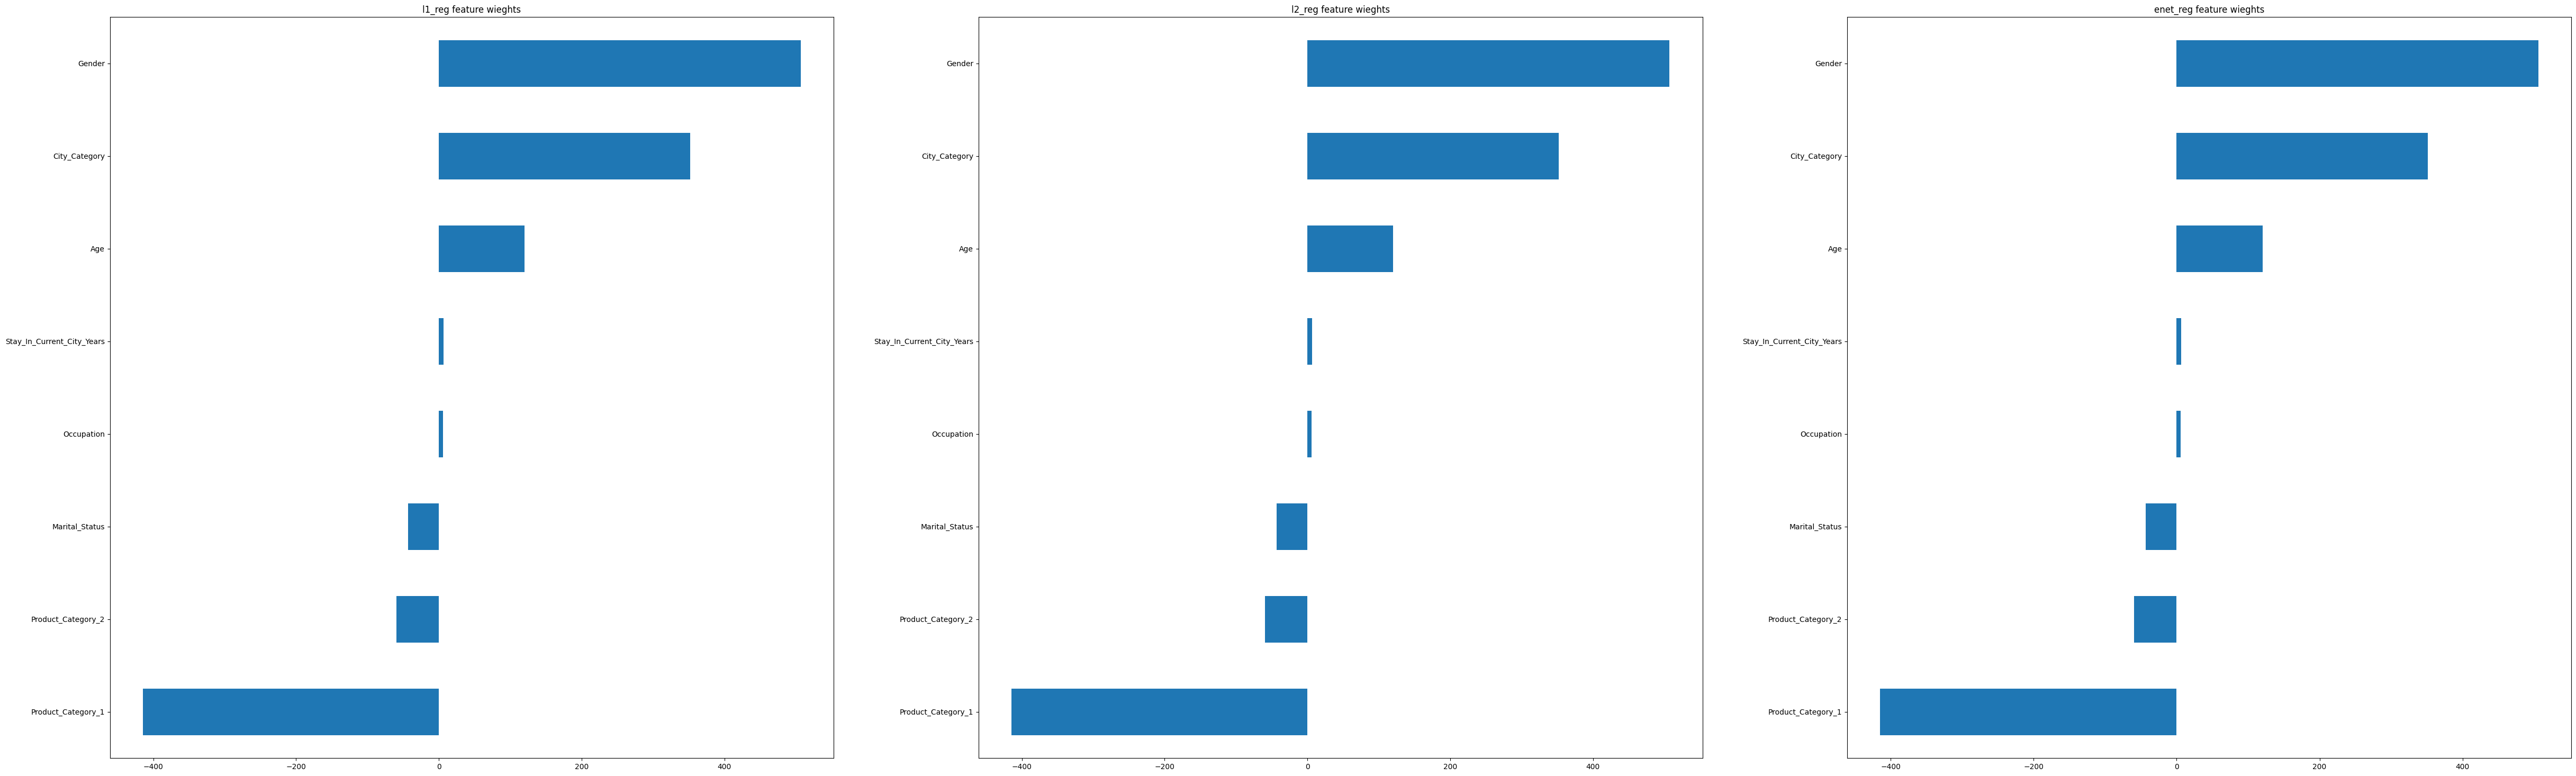

In [ ]:
size = len(lin_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*20, rs*20))
lin_models = {}
for i, model_name in enumerate(lin_results.keys()):

  cur_model = lin_results[model_name]["tune_results"]["tuned_model"]
  lin_models[model_name] = cur_model
  
  plt.subplot(rs,cs,i+1)
  pd.Series(cur_model.coef_, X_train.columns).sort_values().plot(kind="barh")
  plt.title(f"{model_name} feature wieghts")

0.turn [l1_reg], plotting learning curve
1.turn [l2_reg], plotting learning curve
2.turn [enet_reg], plotting learning curve


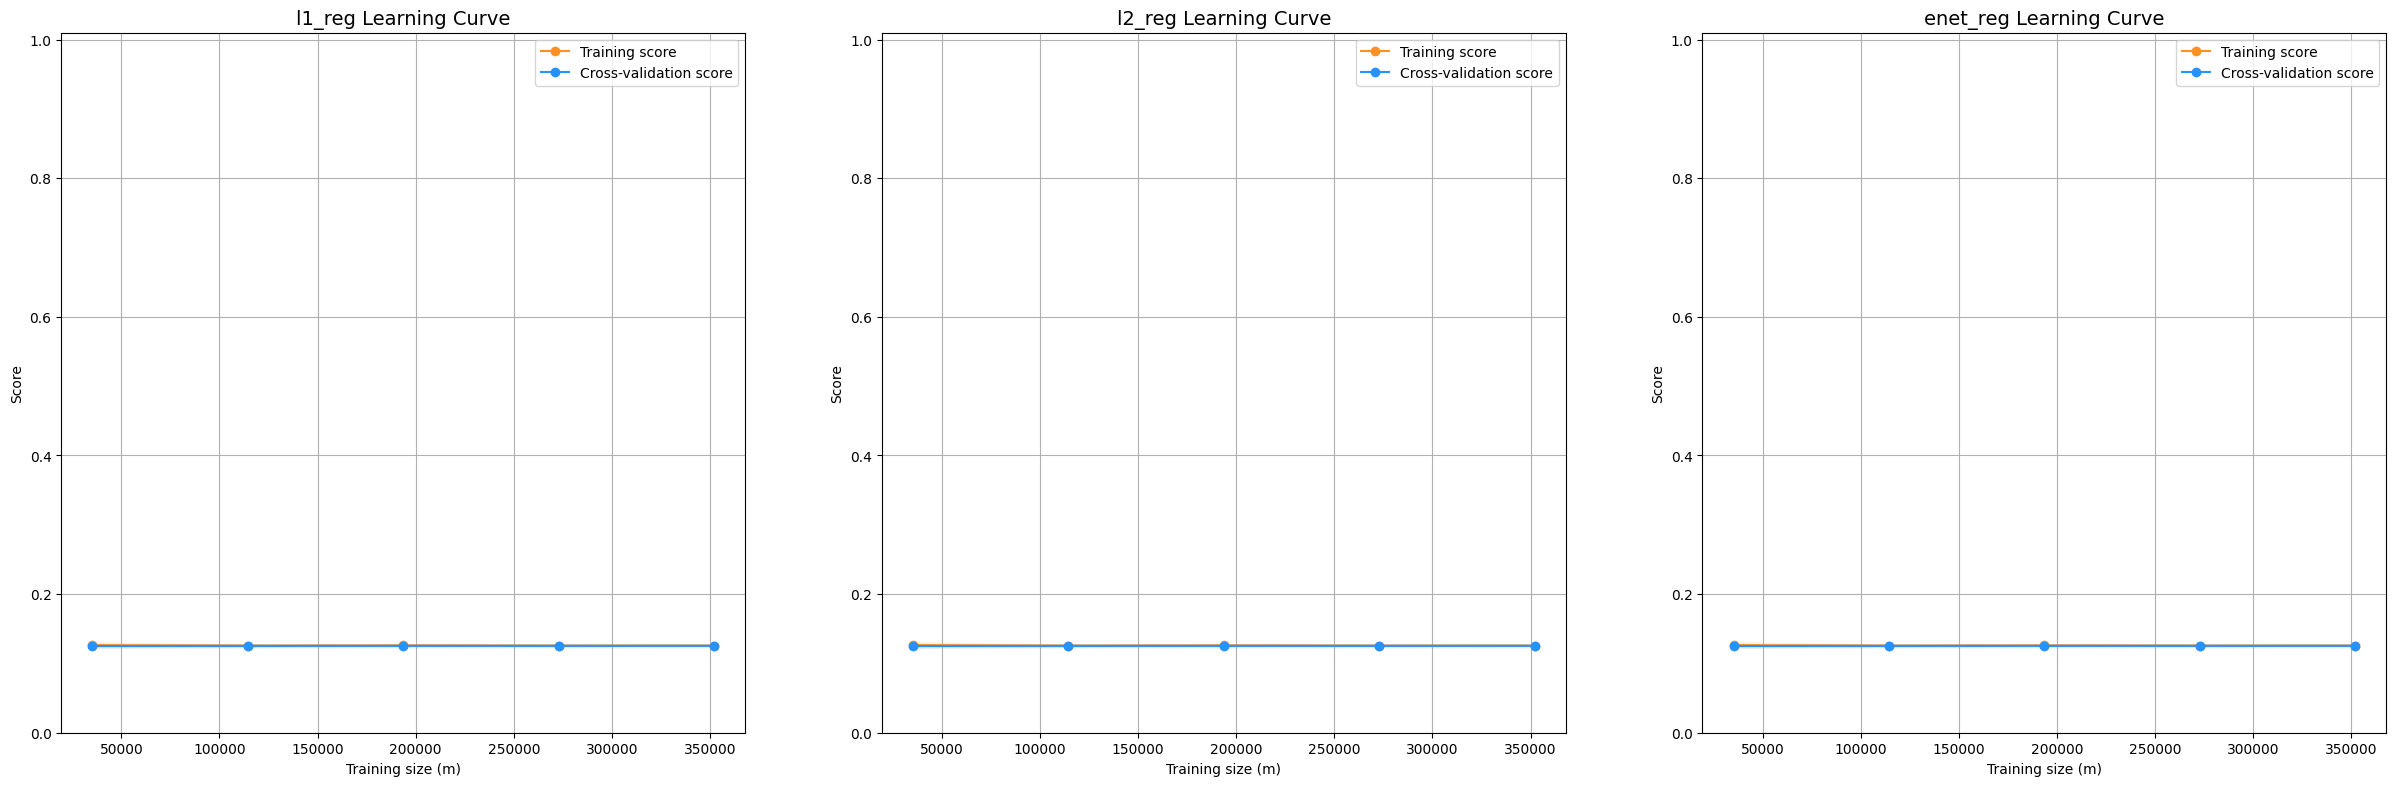

In [ ]:
# Example Usage
model_size = len(lin_models)
rs, cs = (model_size//3+1, 3 ) if model_size >= 3 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(lin_models, X_train, y_train,  **lcs_params)

In [ ]:
lin_reg_results, lin_reg_metric_summary = tune_models(linear_tuners, X_train, y_train,X_test, y_test, is_clf=False, is_round=True)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
list(lin_reg_results.keys())

['lin_reg']

In [ ]:
lin_reg_metric_summary

ExplainedVariance         MAE           MSE  MaxError  \
lin_reg           0.129605  3598.89804  2.204832e+07   17826.0   

         MeanAbsoluteError  MeanAbsolutePercentageError        R2         RMSE  
lin_reg             2907.0                    109.23373  0.129601  4695.564052

In [ ]:
from pprint import pprint
pprint(lin_reg_results)

{'lin_reg': {'metric_results': {'ExplainedVariance': 0.12960547281167545,
                                'MAE': 3598.8980402494226,
                                'MSE': 22048321.7677841,
                                'MaxError': 17826,
                                'MeanAbsoluteError': 2907.0,
                                'MeanAbsolutePercentageError': 109.23373033691635,
                                'R2': 0.12960064128200244,
                                'RMSE': 4695.5640521436935},
             'tune_results': {'best_params': {'copy_X': [True],
                                              'fit_intercept': [True]},
                              'cv_model': GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True]}, verbose=2),
                              'tuned_model': LinearRegression()}}}


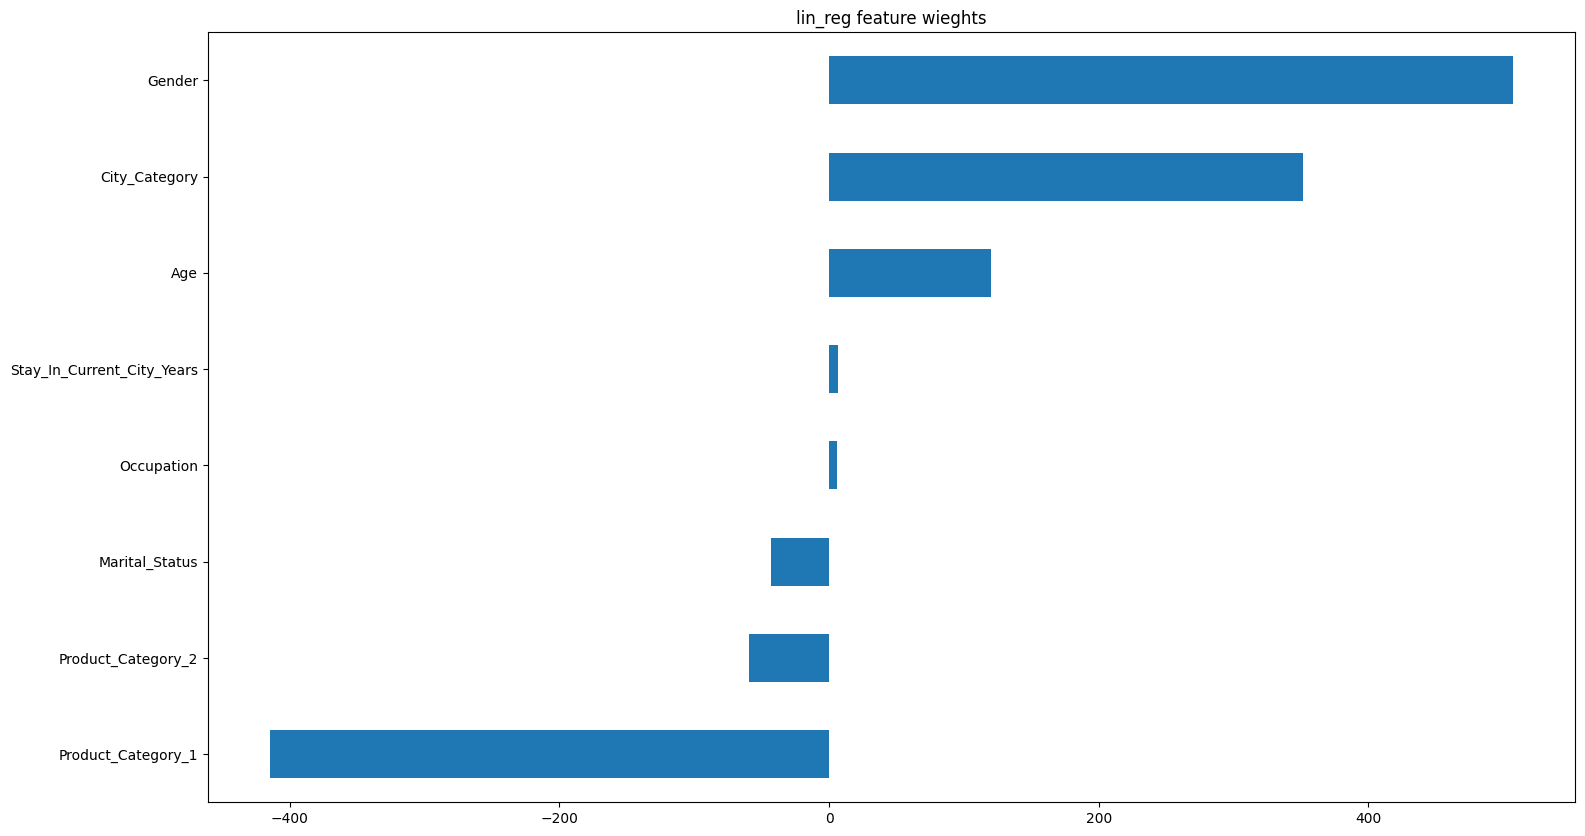

In [ ]:
size = len(lin_reg_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*20, rs*10))
lin_reg_models = dict()
for i, model_name in enumerate(lin_reg_results.keys()):

  cur_model = lin_reg_results[model_name]["tune_results"]["tuned_model"]
  lin_reg_models[model_name] = cur_model

  plt.subplot(rs,cs,i+1)
  pd.Series(cur_model.coef_, X_train.columns).sort_values().plot(kind="barh")
  plt.title(f"{model_name} feature wieghts")

0.turn [lin_reg], plotting learning curve


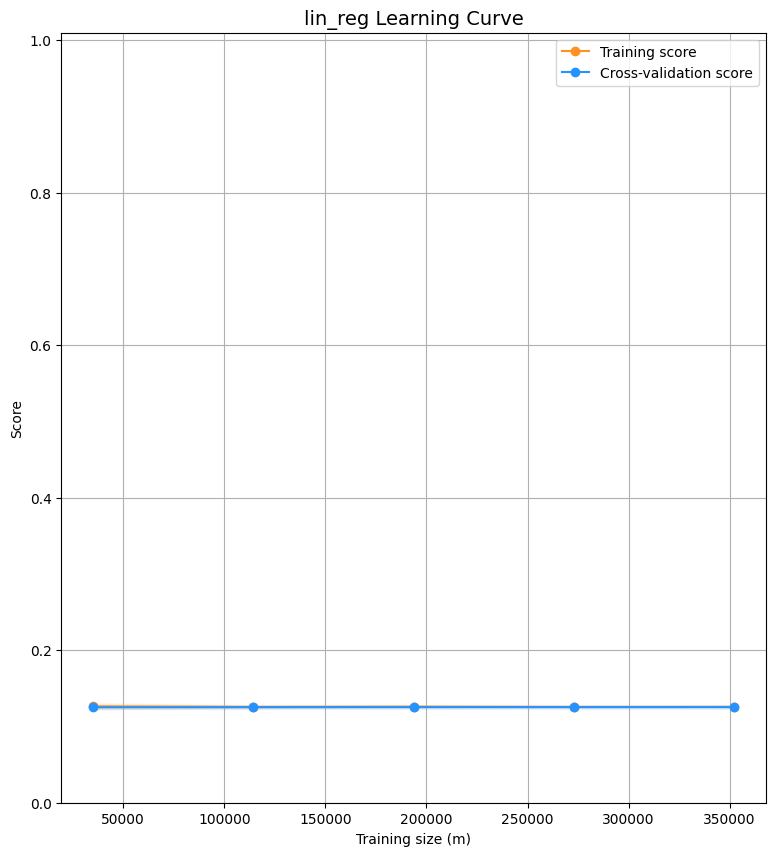

In [ ]:
# Example Usage
model_size = len(lin_reg_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(lin_reg_models, X_train, y_train,  **lcs_params)

## (2) Non-Linear Models 

##### Hyperparams

In [ ]:
knn_params = {
    "n_neighbors": np.arange(1, 10, 2),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": np.arange(20, 61, 10),
    "p": [1, 2],
}
from sklearn.neighbors import KNeighborsRegressor
knn_reg = [KNeighborsRegressor(), knn_params]

In [ ]:
svr_params = {
    "C": np.logspace(-3, 3, 7),
    #"kernel": ["linear","rbf"],#["linear", "poly", "rbf", "sigmoid"],
    #"degree": [2, 3, 4],
    #"gamma": ["scale", "auto"] + list(np.logspace(-3, 3, 7)),
    #"epsilon":[0.01, 0.1, 1, 10, 100],
    #"coef0": np.linspace(-1, 1, 21),
    #"shrinking": [True, False],
    #"tol": [1e-4, 1e-3, 1e-2],
    #"max_iter": [-1, 500, 1000, 2000]
}
from sklearn.svm import SVR
svr_reg = [SVR(), svr_params]

In [ ]:
dt_params = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    #"min_weight_fraction_leaf": [0.0, 0.1, 0.2],
    #"max_features": ["auto", "sqrt", "log2", None],
    #"random_state": [0, 42, 123],
    #"presort": [True, False]
}
from sklearn.tree import DecisionTreeRegressor
dt_reg = [DecisionTreeRegressor(), dt_params]

In [ ]:
non_lin_reg_tuners = {
    "knn_reg":knn_reg,
    #"svr_reg":svr_reg,
    "dt_params":dt_reg
}

##### Tuning Demostration

In [ ]:
non_lin_results, non_lin_metric_summary = tune_models(non_lin_reg_tuners, X_train, y_train, X_test, y_test, is_clf=False, is_round=True)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [ ]:
list(non_lin_results.keys())

['knn_reg', 'dt_params']

In [ ]:
non_lin_metric_summary

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError  \
knn_reg     20120.0             1730.0                    41.478205   
dt_params   14026.0             1692.0                    34.324296   

                    MSE         RMSE          MAE        R2  ExplainedVariance  
knn_reg    9.998852e+06  3162.096173  2317.771029  0.605276           0.605349  
dt_params  8.968823e+06  2994.799331  2234.869398  0.645939           0.645940

In [ ]:
from pprint import pprint
pprint(non_lin_results)

{'dt_params': {'metric_results': {'ExplainedVariance': 0.6459399871561943,
                                  'MAE': 2234.8693984401984,
                                  'MSE': 8968823.035468213,
                                  'MaxError': 14026,
                                  'MeanAbsoluteError': 1692.0,
                                  'MeanAbsolutePercentageError': 34.324296191244926,
                                  'R2': 0.6459386840982546,
                                  'RMSE': 2994.7993314190876},
               'tune_results': {'best_params': {'criterion': ['friedman_mse'],
                                                'max_depth': [15],
                                                'min_samples_leaf': [5],
                                                'min_samples_split': [10],
                                                'splitter': ['random']},
                                'cv_model': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
   

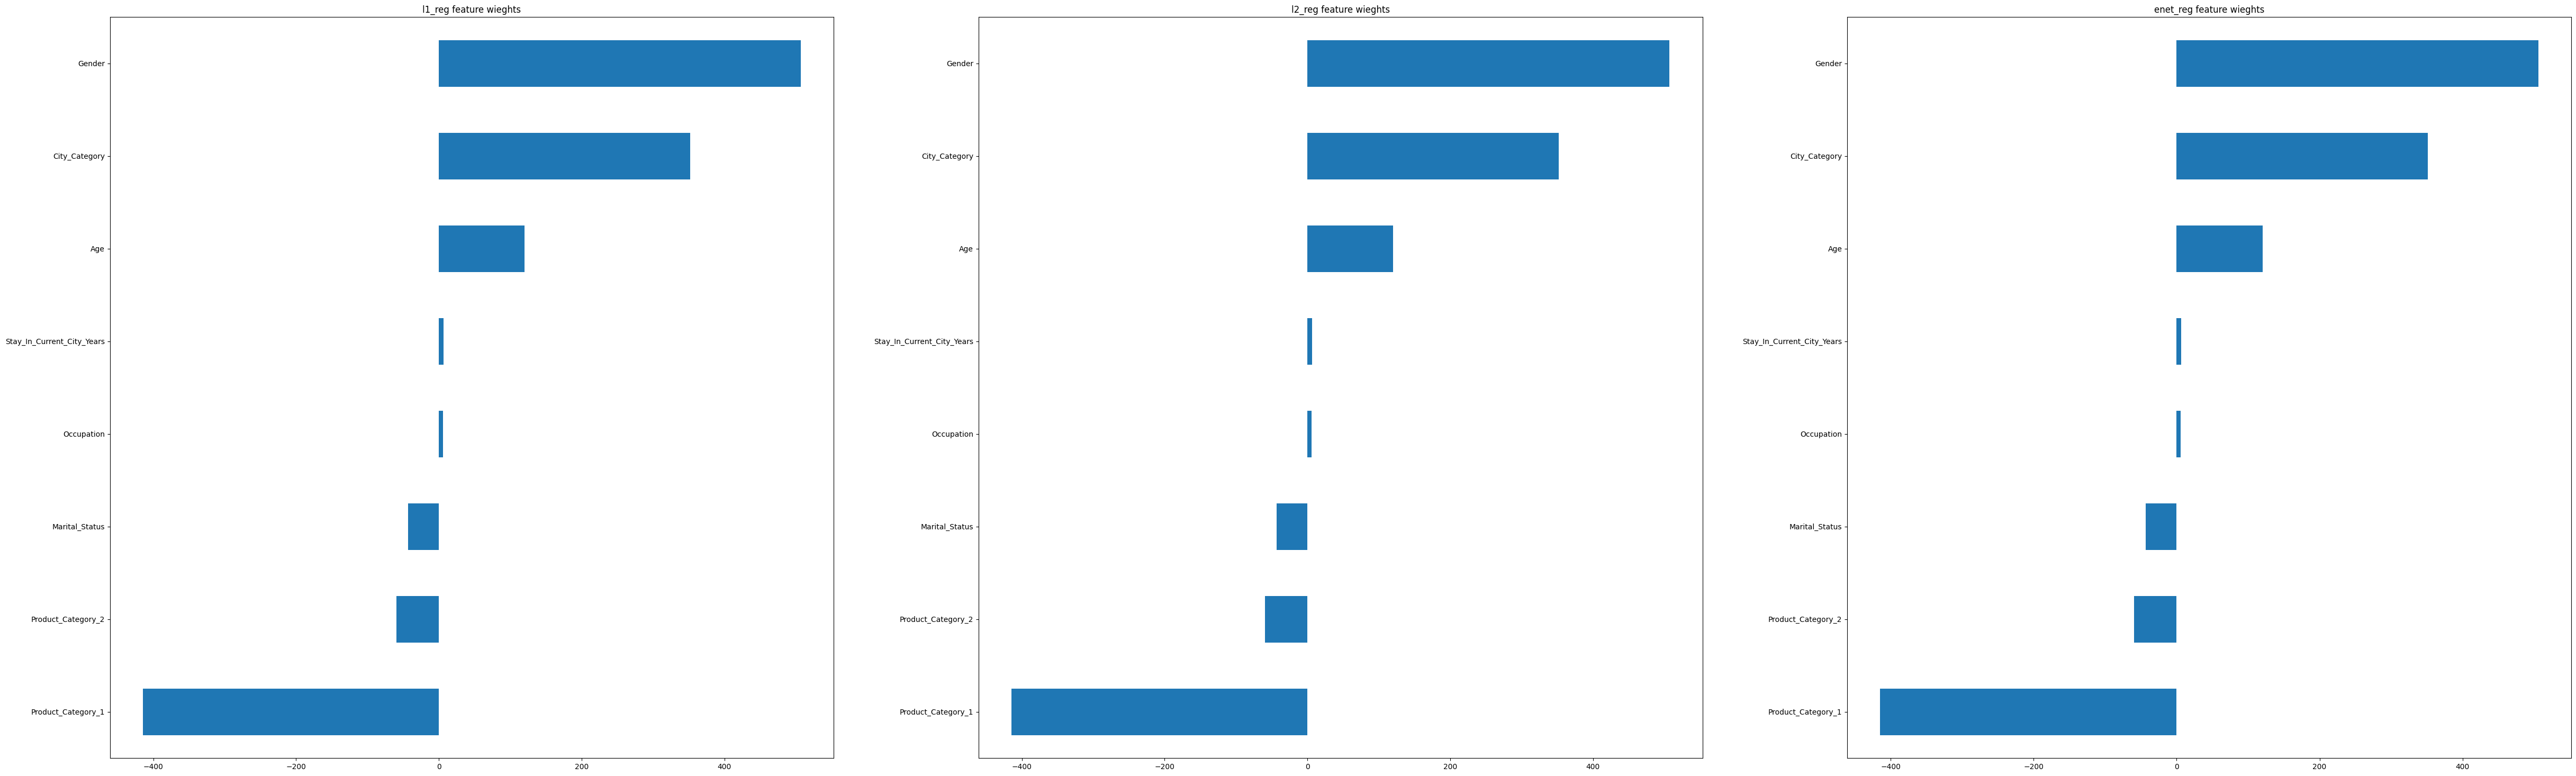

In [ ]:
size = len(lin_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*20, rs*20))
lin_models = {}
for i, model_name in enumerate(lin_results.keys()):

  cur_model = lin_results[model_name]["tune_results"]["tuned_model"]
  lin_models[model_name] = cur_model
  
  plt.subplot(rs,cs,i+1)
  pd.Series(cur_model.coef_, X_train.columns).sort_values().plot(kind="barh")
  plt.title(f"{model_name} feature wieghts")

In [ ]:
non_lin_reg_models = {model_name:results["tune_results"]["tuned_model"] for model_name, results in non_lin_results.items() }

0.turn [knn_reg], plotting learning curve
1.turn [dt_params], plotting learning curve


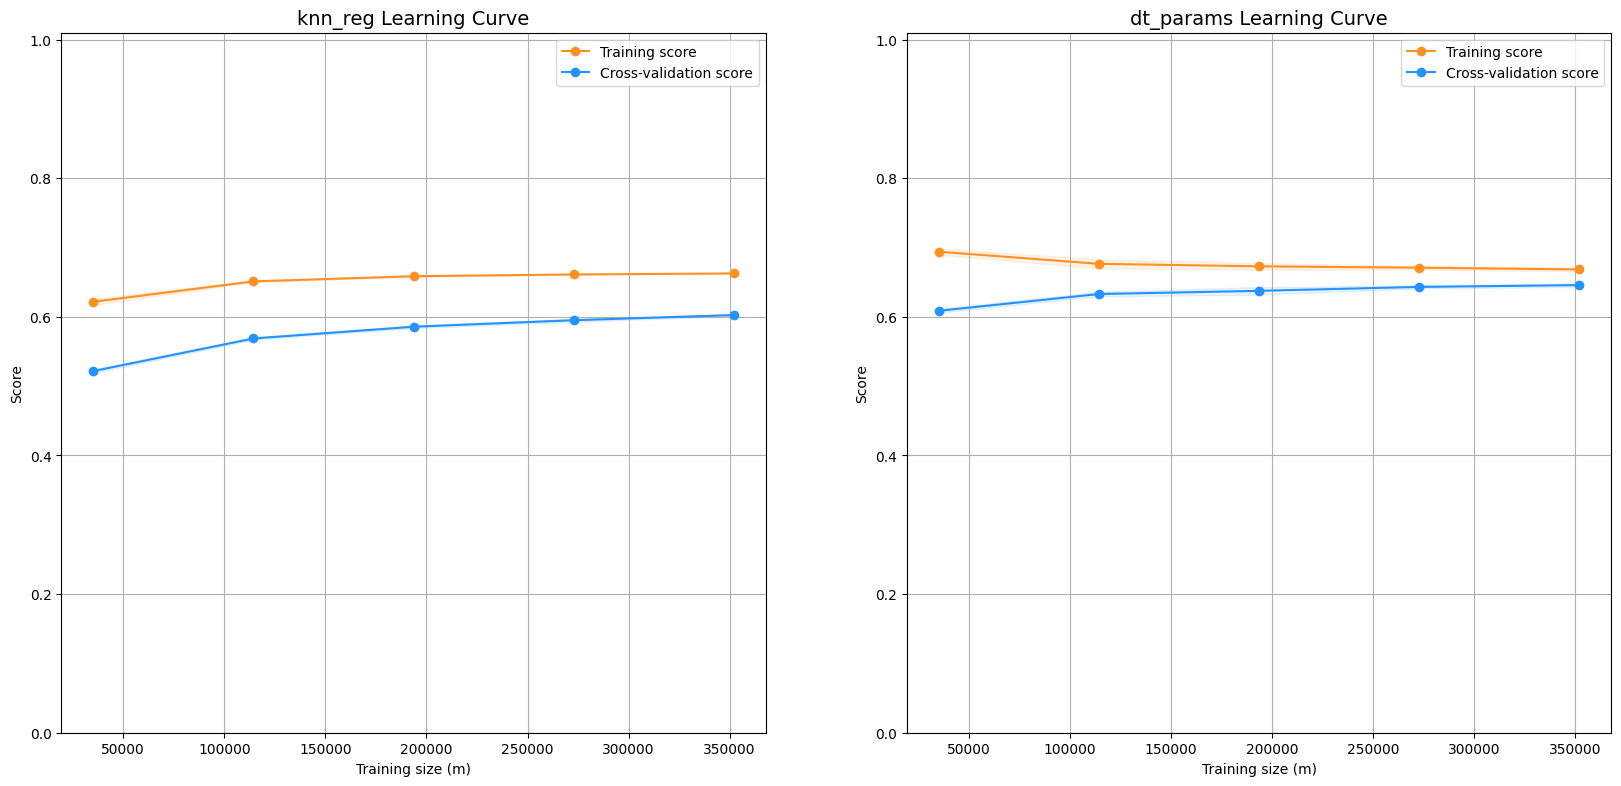

In [ ]:
# Example Usage
model_size = len(non_lin_reg_models)
rs, cs = (model_size//4+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(non_lin_reg_models, X_train, y_train,  **lcs_params)

## (3) Ensemble Models

#### Hyperparams

In [ ]:
# Defining parameters
rf_params = {
    #"n_estimators": [10, 50, 100, 200],
    "max_features": ['auto', 'sqrt'],
    #"max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 4],
    # 'bootstrap': [True, False]
}
from sklearn.ensemble import RandomForestRegressor
rf = [RandomForestRegressor(), rf_params] 

In [ ]:
# Defining parameters
gbr_params = {
    #'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    #'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'subsample': [0.7, 0.8, 0.9]
}
from sklearn.ensemble import GradientBoostingRegressor
gbr = [GradientBoostingRegressor(), gbr_params] 

In [ ]:
# Defining parameters
xgbr_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    #'n_estimators': [100, 200, 300],
    #'max_depth': [3, 5, 7],
    #'min_child_weight': [1, 2, 4],
    #'gamma': [0, 0.1, 0.2],
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'reg_alpha': [0, 1e-1, 1],
    #'reg_lambda': [0, 1e-1, 1]
}
from xgboost import XGBRegressor
xgbr = [XGBRegressor(), xgbr_params] 

In [ ]:
# Defining parameters
lgbm_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    #'n_estimators': [100, 200, 300],
    #'num_leaves': [31, 63, 127],
    #'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    #'min_child_weight': [1e-3, 1e-2, 1e-1],
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'reg_alpha': [0, 1e-1, 1],
    #'reg_lambda': [0, 1e-1, 1]
}
from lightgbm import LGBMRegressor
lgbm = [LGBMRegressor(), lgbm_params] 

In [ ]:
import os
if os.system("pip freeze | grep catboost==") != 0: os.system("pip install catboost")

cb_params = {
    'bagging_temperature': [0.6, 0.85], #[0.5, 0.7, 0.9],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample':[0.6, 0.85], #[0.5, 0.7, 0.9],
    #'depth': [3, 5, 7],
    #'l2_leaf_reg': [1, 2, 4],
    #'boosting_type': ['Ordered', 'Plain', 'Pointwise'],
    #'colsample_bylevel': [0.7, 0.8, 0.9],
    #'reg_lambda': [0, 1e-1, 1] # or # 'l2_leaf_reg': [1, 2, 4]
}
from catboost import CatBoostRegressor
cb = [CatBoostRegressor(), cb_params] 

In [ ]:
ensemble_tuners = {
    "rf":rf,
    "gbr":gbr,
    "xgbr":xgbr,
    "lgbm":lgbm,
    "cb":cb
}

### Tuning Demostration

In [ ]:
ensemble_results, ensemble_metric_summary = tune_models(ensemble_tuners,X_train, y_train, X_test, y_test, is_clf=False, is_round=True)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Learning rate set to 0.107116
0:	learn: 4751.2356329	total: 116ms	remaining: 1m 55s
1:	learn: 4523.5685008	total: 179ms	remaining: 1m 29s
2:	learn: 4320.0945812	total: 235ms	remaining: 1m 18s
3:	learn: 4155.0640413	total: 291ms	remaining: 1m 12s
4:	learn: 4018.1321189	total: 347ms	remaining: 1m 8s
5:	learn: 3910.9233817	total: 435ms	remaining: 1m 12s
6:	learn: 3823.8740918	total: 495ms	r

In [ ]:
list(ensemble_results)

['rf', 'gbr', 'xgbr', 'lgbm', 'cb']

In [ ]:
ensemble_metric_summary

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError           MSE  \
rf     12503.0             1629.0                    32.883898  8.647943e+06   
gbr     9591.0             1719.0                    36.007663  8.921979e+06   
xgbr    9864.0             1691.0                    35.596922  8.741287e+06   
lgbm   10078.0             1701.0                    36.453917  8.748727e+06   
cb     10116.0             1675.0                    36.303317  8.570677e+06   

             RMSE          MAE        R2  ExplainedVariance  
rf    2940.738466  2165.866272  0.658606           0.658606  
gbr   2986.968117  2252.078981  0.647788           0.647788  
xgbr  2956.566832  2220.059138  0.654921           0.654921  
lgbm  2957.824659  2223.717391  0.654627           0.654628  
cb    2927.571887  2188.880224  0.661656           0.661657

In [ ]:
from pprint import pprint
pprint(ensemble_results)

{'cb': {'metric_results': {'ExplainedVariance': 0.661656525369434,
                           'MAE': 2188.8802243350847,
                           'MSE': 8570677.154244006,
                           'MaxError': 10116,
                           'MeanAbsoluteError': 1675.0,
                           'MeanAbsolutePercentageError': 36.303317260516906,
                           'R2': 0.6616562486069564,
                           'RMSE': 2927.571887118061},
        'tune_results': {'best_params': {'bagging_temperature': [0.6],
                                         'learning_rate': [0.1],
                                         'subsample': [0.6]},
                         'cv_model': GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb9b1d05b50>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.6], 'learning_rate': [0.1],
                         'subsample': [0.6]},
             verbose=2),
                         '

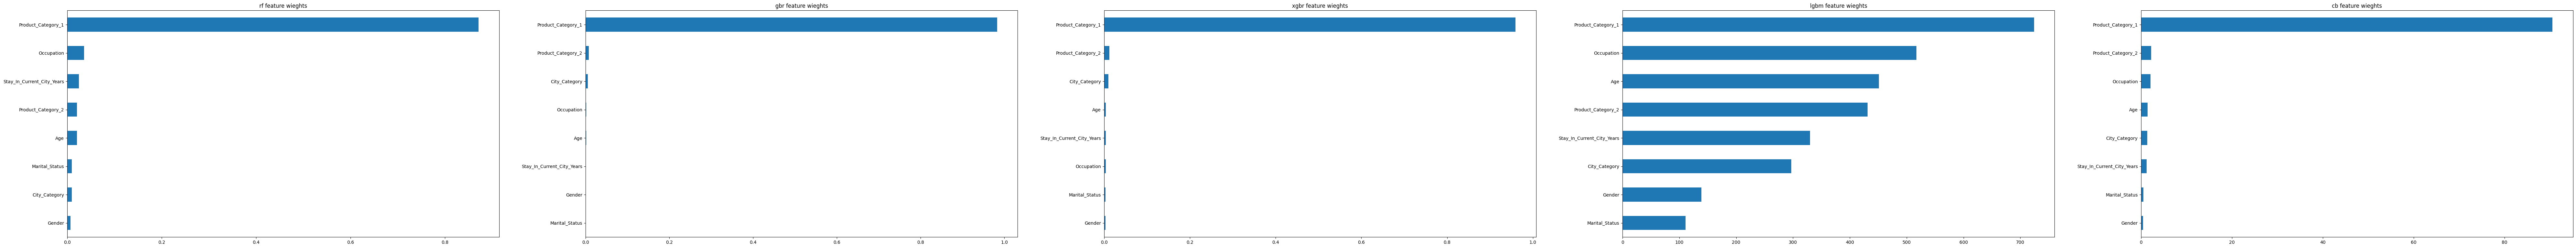

In [ ]:
es_model_names = [col for col in ensemble_results.keys() if col not in ["bag_reg"]]
size = len(es_model_names)
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*20, rs*10))
ensemble_reg_models = dict()
for i, model_name in enumerate(es_model_names):
  if model_name in ["bag_reg"]: continue

  cur_model = ensemble_results[model_name]["tune_results"]["tuned_model"]
  ensemble_reg_models[model_name] = cur_model

  plt.subplot(rs,cs,i+1)
  pd.Series(cur_model.feature_importances_, X_train.columns).sort_values().plot(kind="barh")
  plt.title(f"{model_name} feature wieghts")

0.turn [rf], plotting learning curve
1.turn [gbr], plotting learning curve
2.turn [xgbr], plotting learning curve
3.turn [lgbm], plotting learning curve
4.turn [cb], plotting learning curve


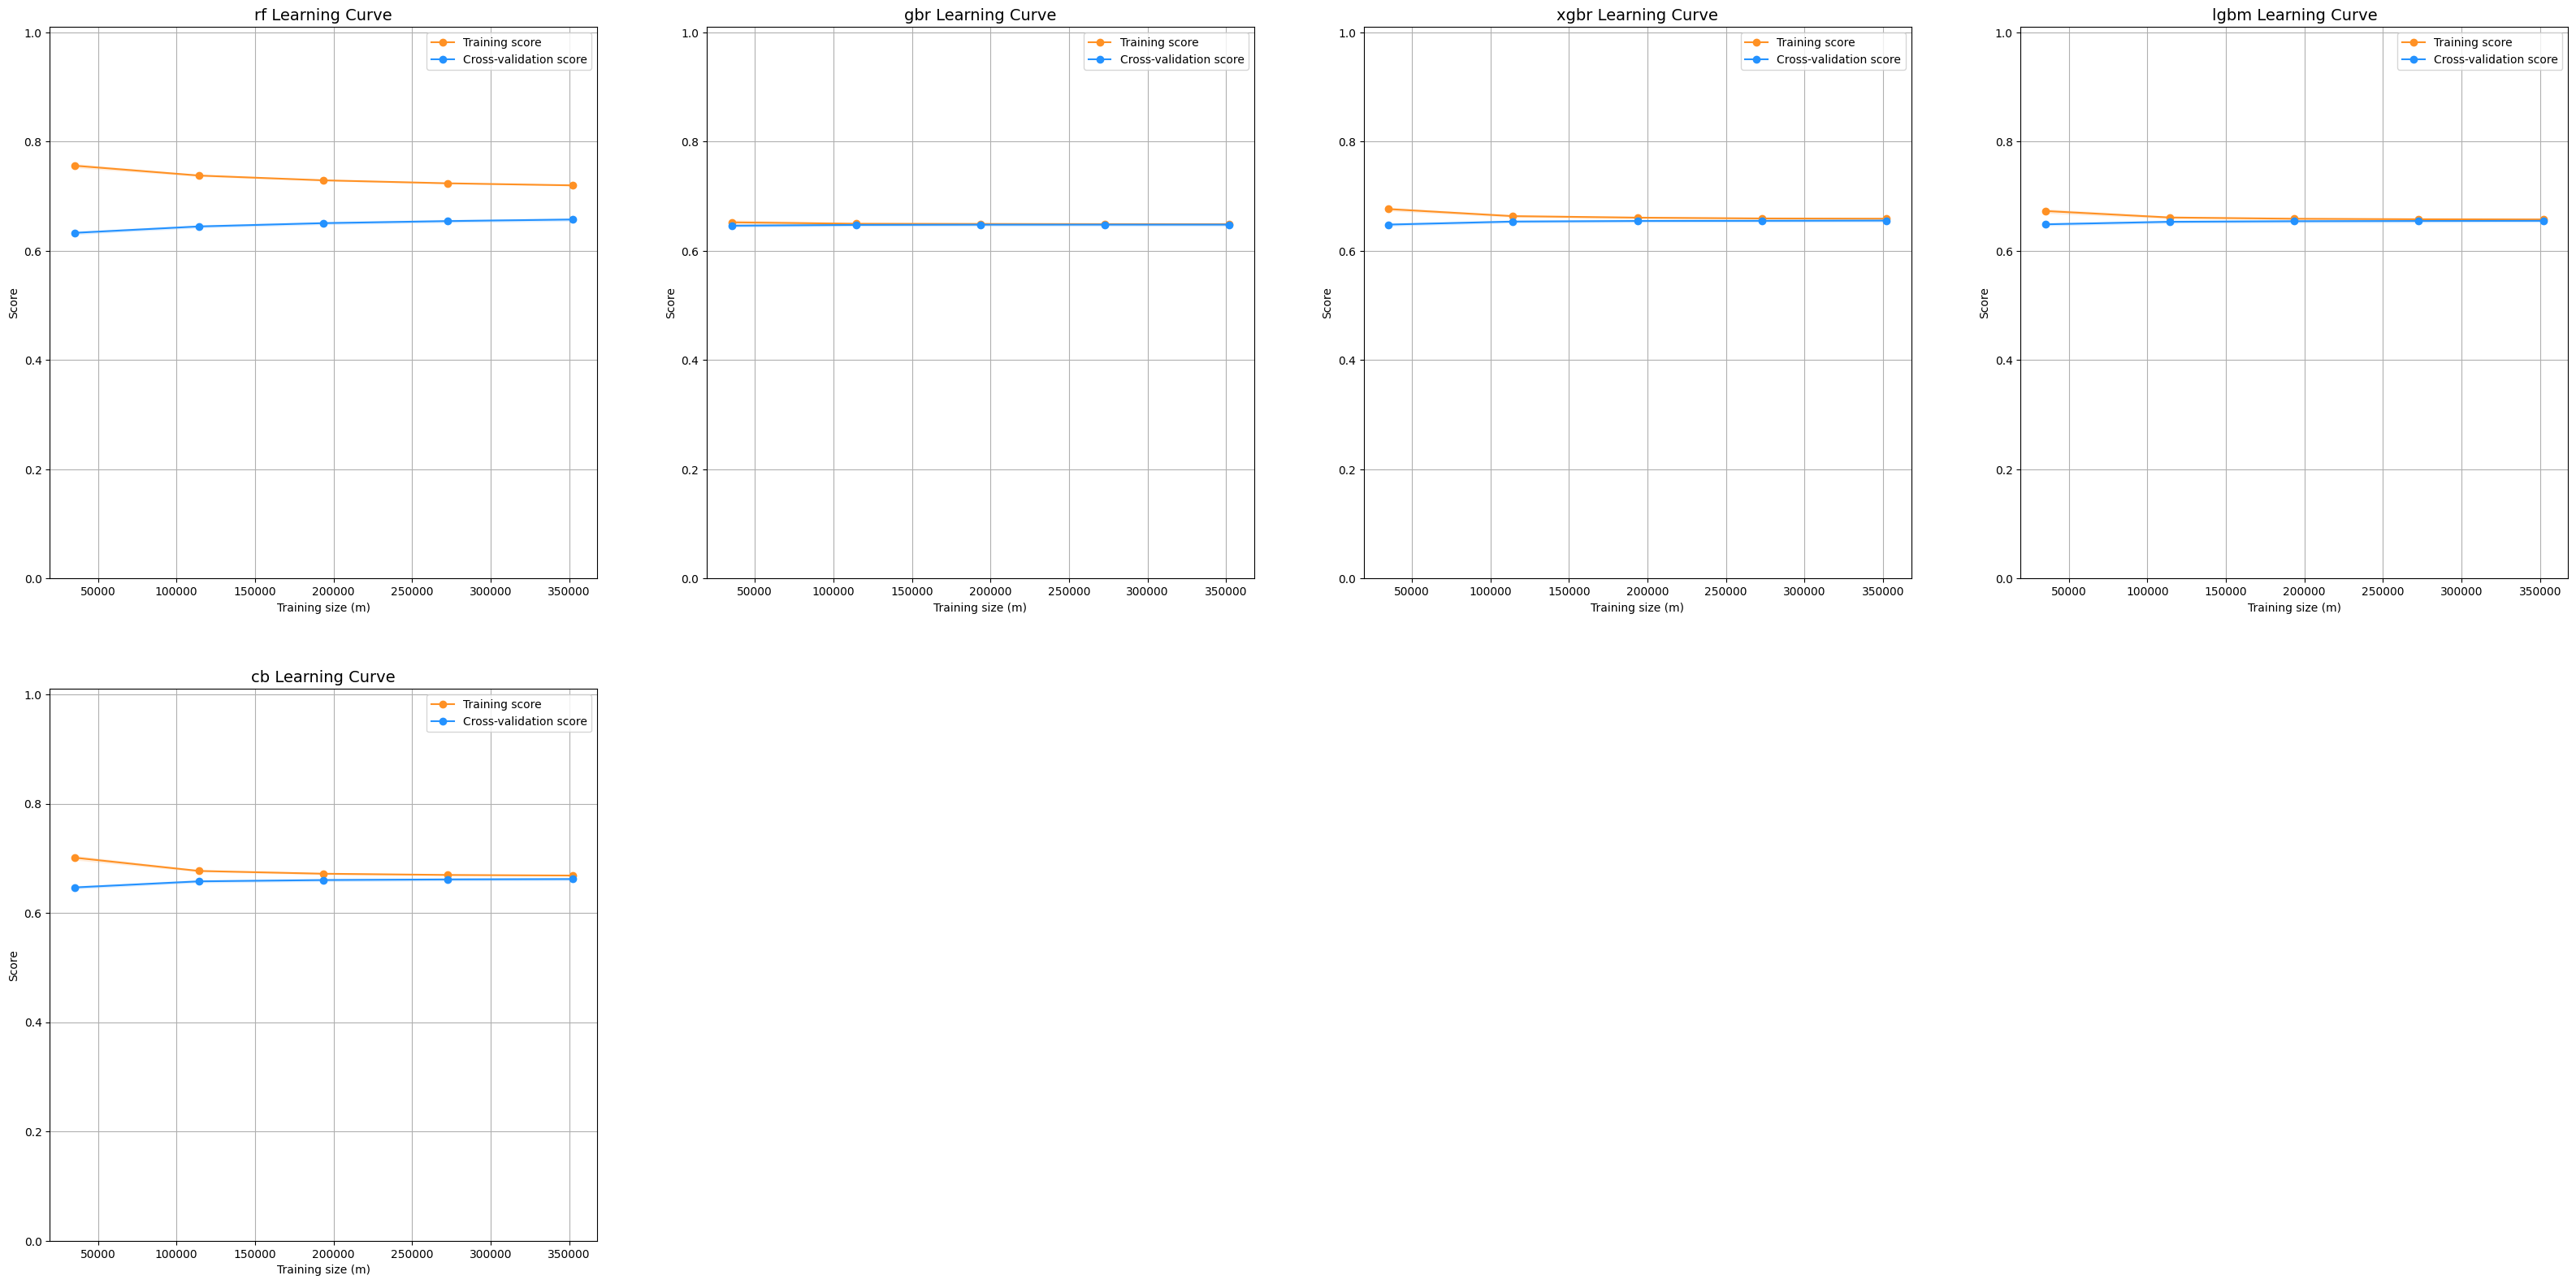

In [ ]:
# Example Usage
model_size = len(ensemble_reg_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(ensemble_reg_models, X_train, y_train,  **lcs_params)

## (4) Final Model

### Top models

In [ ]:
# lin_results, lin_metric_summary
# lin_reg_results, lin_reg_metric_summary
# non_lin_results, non_lin_metric_summary
# ensemble_results, ensemble_metric_summary

In [ ]:
all_results = [lin_results, lin_reg_results, non_lin_results, ensemble_results]

In [ ]:
lin_models = pd.concat([lin_metric_summary, lin_reg_metric_summary])
lin_models = lin_models.sort_values(by=['RMSE','R2'], ascending=True)
lin_models

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError  \
l2_reg     17826.0             2907.0                   109.233799   
lin_reg    17826.0             2907.0                   109.233730   
l1_reg     17826.0             2907.0                   109.233910   
enet_reg   17824.0             2906.0                   109.234604   

                   MSE         RMSE          MAE        R2  ExplainedVariance  
l2_reg    2.204832e+07  4695.563909  3598.897786  0.129601           0.129606  
lin_reg   2.204832e+07  4695.564052  3598.898040  0.129601           0.129605  
l1_reg    2.204833e+07  4695.564874  3598.897840  0.129600           0.129605  
enet_reg  2.204837e+07  4695.569602  3598.892341  0.129599           0.129603

In [ ]:
non_linear_model = pd.concat([ non_lin_metric_summary,ensemble_metric_summary]) #non_lin_metric_summary,
non_linear_model = non_linear_model.sort_values(by=['RMSE','R2'],  ascending=True)
non_linear_model

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError  \
cb          10116.0             1675.0                    36.303317   
rf          12503.0             1629.0                    32.883898   
xgbr         9864.0             1691.0                    35.596922   
lgbm        10078.0             1701.0                    36.453917   
gbr          9591.0             1719.0                    36.007663   
dt_params   14026.0             1692.0                    34.324296   
knn_reg     20120.0             1730.0                    41.478205   

                    MSE         RMSE          MAE        R2  ExplainedVariance  
cb         8.570677e+06  2927.571887  2188.880224  0.661656           0.661657  
rf         8.647943e+06  2940.738466  2165.866272  0.658606           0.658606  
xgbr       8.741287e+06  2956.566832  2220.059138  0.654921           0.654921  
lgbm       8.748727e+06  2957.824659  2223.717391  0.654627           0.654628  
gbr        8.921979e+06  2986.968117  2252.078981  0.647788           0.647788  
dt_params  8.968823e+06  2994.799331  2234.869398  0.645939           0.645940  
knn_reg    9.998852e+06  3162.096173  2317.771029  0.605276           0.605349

In [ ]:
non_linear_model.index

Index(['cb', 'rf', 'xgbr', 'lgbm', 'gbr', 'dt_params', 'knn_reg'], dtype='object')

In [ ]:
all_models = pd.concat([lin_metric_summary, lin_reg_metric_summary, non_lin_metric_summary, ensemble_metric_summary])
all_models = all_models.sort_values(by=['RMSE','R2'], ascending=True)
all_models

MaxError  MeanAbsoluteError  MeanAbsolutePercentageError  \
cb          10116.0             1675.0                    36.303317   
rf          12503.0             1629.0                    32.883898   
xgbr         9864.0             1691.0                    35.596922   
lgbm        10078.0             1701.0                    36.453917   
gbr          9591.0             1719.0                    36.007663   
dt_params   14026.0             1692.0                    34.324296   
knn_reg     20120.0             1730.0                    41.478205   
l2_reg      17826.0             2907.0                   109.233799   
lin_reg     17826.0             2907.0                   109.233730   
l1_reg      17826.0             2907.0                   109.233910   
enet_reg    17824.0             2906.0                   109.234604   

                    MSE         RMSE          MAE        R2  ExplainedVariance  
cb         8.570677e+06  2927.571887  2188.880224  0.661656           0.661657  
rf         8.647943e+06  2940.738466  2165.866272  0.658606           0.658606  
xgbr       8.741287e+06  2956.566832  2220.059138  0.654921           0.654921  
lgbm       8.748727e+06  2957.824659  2223.717391  0.654627           0.654628  
gbr        8.921979e+06  2986.968117  2252.078981  0.647788           0.647788  
dt_params  8.968823e+06  2994.799331  2234.869398  0.645939           0.645940  
knn_reg    9.998852e+06  3162.096173  2317.771029  0.605276           0.605349  
l2_reg     2.204832e+07  4695.563909  3598.897786  0.129601           0.129606  
lin_reg    2.204832e+07  4695.564052  3598.898040  0.129601           0.129605  
l1_reg     2.204833e+07  4695.564874  3598.897840  0.129600           0.129605  
enet_reg   2.204837e+07  4695.569602  3598.892341  0.129599           0.129603

### Greedy Selection

In [124]:
best_model_name = "rf" #all_models.iloc[0].name
best_model_name

'rf'

In [125]:
tuned_model, best_params = None, None
for results in all_results:
  if best_model_name in results:
      tuned_model = results[best_model_name]["tune_results"]["tuned_model"]
      best_params = results[best_model_name]["tune_results"]["best_params"]

In [126]:
tuned_model = ensemble_results["lgbm"]["tune_results"]["tuned_model"]
tuned_params =ensemble_results["lgbm"]["tune_results"]["best_params"]

In [127]:
tuned_model.score(X_test, y_test)

0.6546273851484314

In [128]:
from sklearn.model_selection import cross_val_score
cross_val_score(tuned_model, X_train, y_train, cv=10).mean(), cross_val_score(tuned_model, X_test, y_test, cv=10).mean()

(0.6552178198997953, 0.6521563030921378)

# (F) Saving & Downloading the model

### Saving the model

In [129]:
import pickle
model_save_path = 'rf_model.sav'
pickle.dump(tuned_model, open(model_save_path, 'wb'))

In [130]:
import json

# Extracting the encodings of categorical variables 
classes = dict()
for col, encoder in encoders.items():
  classes[col] = {i:cls for i, cls in enumerate(encoder.classes_)}

# Saving the cat encodings
endoing_json_path = "cat_encods.json"
with open(endoing_json_path,"w+") as f: json.dump(classes, f)

### Loading the model

In [131]:
loaded_model = pickle.load(open(model_save_path, 'rb'))

In [132]:
loaded_model.score(X_test, y_test)

0.6546273851484314

### Zipping the model
```python
import os 
zip_dst, src = f"{model_save_path}.zip", model_save_path
os.system(f"zip -r {zip_dst} {src}" )
```

### Downloading the model

In [133]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp -f /content/finalized_model_lgbm.sav /content/drive/MyDrive/Home

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [134]:
from google.colab import files
files.download(endoing_json_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# (G) Deployment as App

## APP (loading from file)

### Declerations & Util Funcs

In [135]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import pickle
import json 
import numpy as np
import pandas as pd

# File Paths
model_path = 'rf_model.sav'
encoding_path = "cat_encods.json"
component_config_path = "component_configs.json"

# predefined
feature_order =['Gender', 'Age', 'Occupation', 'City_Category', 
                'Stay_In_Current_City_Years', 'Marital_Status', 
                'Product_Category_1', 'Product_Category_2']

# Loading the files
model = pickle.load(open(model_path, 'rb'))


# loading the classes & type casting the encoding indexes
classes = json.load(open(encoding_path, "r"))
classes = {k:{int(num):cat for num,cat in v.items() } for k,v in classes.items()}

inverse_class = {col:{val:key for key, val in clss.items()}  for col, clss in classes.items()}

feature_limitations = json.load(open(component_config_path, "r"))

In [ ]:
def decode(col, data):
  return classes[col][data]

def encode(col, str_data):
  return inverse_class[col][str_data]

def feature_decode(df):

  # exclude the target var
  cat_cols = list(classes.keys())
  if "Purchase" in cat_cols:
    cat_cols.remove("Purchase")

  for col in cat_cols:
     df[col] = decode(col, df[col])

  return df

def feature_encode(df):
  
  # exclude the target var
  cat_cols = list(classes.keys())
  if "Purchase" in cat_cols:
    cat_cols.remove("Purchase")
  
  for col in cat_cols:
     df[col] = encode(col, df[col])
  
  return df

In [ ]:
def predict(*args):

  # preparing the input into convenient form
  features = pd.Series([*args], index=feature_order)
  features = feature_encode(features)
  features = np.array(features).reshape(-1,len(feature_order))

  # prediction
  pred = model.predict(features) # .predict_proba(features)

  return np.round(pred,5)

In [ ]:
ex_data, ex_y = ['F', '0-17', 10.0, 'B', '2', 0.0, 3.0, 4.0], 11302
predict(*ex_data)

NotFittedError: ignored

In [ ]:
examples = [
    ['M', '18-25', 14.0, 'B', '3', 0.0, 5.0, 6.0],
    ['M', '36-45', 12.0, 'C', '2', 0.0, 10.0, 13.0],
    ['F', '36-45', 1.0, 'A', '3', 1.0, 8.0, 9.0],
    ['M', '26-35', 16.0, 'B', '4+', 1.0, 2.0, 9.0],
    ['M', '18-25', 15.0, 'C', '3', 0.0, 1.0, 2.0]
]

examples_y = [1735, 23628, 6094, 12899, 15247]



total_examples = [
    ['M', '18-25', 14.0, 'B', '3', 0.0, 5.0, 6.0, 1735],
    ['M', '36-45', 12.0, 'C', '2', 0.0, 10.0, 13.0, 23628],
    ['F', '36-45', 1.0, 'A', '3', 1.0, 8.0, 9.0, 6094],
    ['M', '26-35', 16.0, 'B', '4+', 1.0, 2.0, 9.0, 12899],
    ['M', '18-25', 15.0, 'C', '3', 0.0, 1.0, 2.0, 15247]
]

### Launching Block App

In [ ]:
import gradio as gr
from sklearn.metrics import mean_squared_error
import numpy as np

def RMSE(actual, pred):
    return np.around(np.sqrt(mean_squared_error([actual],[pred])),3)

inputs = []
with gr.Blocks() as demo:

    for col in feature_order:
      if col in feature_limitations["cat"].keys():
        
        # extracting the params
        vals = feature_limitations["cat"][col]["values"]
        def_val = feature_limitations["cat"][col]["def"]
        
        # creating the component
        inputs.append(gr.inputs.Dropdown(vals, default=def_val, label=col))
      else:
        
        # extracting the params
        min = feature_limitations["num"][col]["min"]
        max = feature_limitations["num"][col]["max"]
        def_val = feature_limitations["num"][col]["def"]
        
        # creating the component
        inputs.append(gr.inputs.Slider(minimum=min, maximum=max, default=def_val, label=col))
    
    pred_btn = gr.Button("Predict")
    output = gr.Number(label="Prediction")
    pred_btn.click(fn=predict, inputs=inputs, outputs=output) #examples=examples
    
    loss_btn = gr.Button("calculate loss")
    actual = gr.Number(value=11302, label="Actual Value", )
    loss = gr.Number(label="RMSE")
    loss_btn.click(fn=RMSE, inputs=[actual, output], outputs=loss)


    gr.Examples(total_examples, [*inputs, actual])


demo.launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(


NameError: ignored

### Launching the demo app via default class

In [ ]:
import gradio as gr


inputs = list()
for col in feature_order:
  if col in feature_limitations["cat"].keys():
    
    # extracting the params
    vals = feature_limitations["cat"][col]["values"]
    def_val = feature_limitations["cat"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Dropdown(vals, default=def_val, label=col))
  else:
    
    # extracting the params
    min = feature_limitations["num"][col]["min"]
    max = feature_limitations["num"][col]["max"]
    def_val = feature_limitations["num"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Slider(minimum=min, maximum=max, default=def_val, label=col) )


In [ ]:
import gradio as gr
# Creating application
gr.Interface(predict, inputs, "number", examples=examples).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## Manuels (with out file, code form)

### Declerations & Util Funcs

In [ ]:
import pickle
import json 
import numpy as np
import pandas as pd

# File Paths
model_path = 'finalized_model_lgbm.sav'
encoding_path = "cat_encods.json"
component_config_path = "component_configs.json"

# predefined
feature_order =['Gender', 'Age', 'Occupation', 'City_Category', 
                'Stay_In_Current_City_Years', 'Marital_Status', 
                'Product_Category_1', 'Product_Category_2']

# Loading the files
model = pickle.load(open(model_path, 'rb'))


# loading the classes & type casting the encoding indexes
classes = json.load(open(encoding_path, "r"))
classes = {k:{int(num):cat for num,cat in v.items() } for k,v in classes.items()}

inverse_class = {col:{val:key for key, val in clss.items()}  for col, clss in classes.items()}

#feature_limitations = json.load(open(component_config_path, "r"))

In [ ]:
def decode(col, data):
  return classes[col][data]

def encode(col, str_data):
  return inverse_class[col][str_data]

def feature_decode(df):

  # exclude the target var
  cat_cols = list(classes.keys())
  if "quality" in cat_cols:
    cat_cols.remove("quality")

  for col in cat_cols:
     df[col] = decode(col, df[col])

  return df

def feature_encode(df):
  
  # exclude the target var
  cat_cols = list(classes.keys())
  if "quality" in cat_cols:
    cat_cols.remove("quality")
  
  for col in cat_cols:
     df[col] = encode(col, df[col])
  
  return df

In [ ]:
def predict(*args):

  # preparing the input into convenient form
  features = pd.Series([*args], index=feature_order)
  features = feature_encode(features)
  features = np.array(features).reshape(-1,len(feature_order))

  # prediction
  pred = model.predict(features) # .predict_proba(features)

  return np.round(pred,5)

### Extracting the input params

In [ ]:
ex_obs_fea, ex_obs_tar = dict(X_test.iloc[0,:]), y_test.iloc[0]
ex_obs_fea, ex_obs_tar

({'Gender': 0.0,
  'Age': 0.0,
  'Occupation': 10.0,
  'City_Category': 1.0,
  'Stay_In_Current_City_Years': 2.0,
  'Marital_Status': 0.0,
  'Product_Category_1': 3.0,
  'Product_Category_2': 4.0},
 13302)

In [ ]:
def_vals = ex_obs_fea.copy()
def_vals

{'Gender': 0.0,
 'Age': 0.0,
 'Occupation': 10.0,
 'City_Category': 1.0,
 'Stay_In_Current_City_Years': 2.0,
 'Marital_Status': 0.0,
 'Product_Category_1': 3.0,
 'Product_Category_2': 4.0}

In [ ]:
pure_def_vals = feature_decode(def_vals)
pure_def_vals

{'Gender': 'F',
 'Age': '0-17',
 'Occupation': 10.0,
 'City_Category': 'B',
 'Stay_In_Current_City_Years': '2',
 'Marital_Status': 0.0,
 'Product_Category_1': 3.0,
 'Product_Category_2': 4.0}

In [ ]:
pure_def_vals.values()

dict_values(['F', '0-17', 10.0, 'B', '2', 0.0, 3.0, 4.0])

In [ ]:
feature_order = ex_obs_fea.keys()
feature_order

dict_keys(['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2'])

In [ ]:
predict(*list(pure_def_vals.values()))

array([10262.95066])

In [ ]:
ex_obs_fea = pure_def_vals
ex_obs_fea

{'Gender': 'F',
 'Age': '0-17',
 'Occupation': 10.0,
 'City_Category': 'B',
 'Stay_In_Current_City_Years': '2',
 'Marital_Status': 0.0,
 'Product_Category_1': 3.0,
 'Product_Category_2': 4.0}

In [ ]:
ex_obs_fea.values()

dict_values(['F', '0-17', 10.0, 'B', '2', 0.0, 3.0, 4.0])

In [ ]:
import numpy as np

num_limitations = {}
for col in [col for col in num_cols if col not in ["Purchase"]]:
  num_limitations[col] = {
          "min": float(df[col].min()),
          "max": float(df[col].max()),
          "def": float(ex_obs_fea[col])
      }

In [ ]:
cat_limitations ={}
for col in cat_cols:
  cat_limitations[col] = {
      "values": list(classes[col].values()),
      "def": ex_obs_fea[col]
  }

In [ ]:
total_limitations = {
    "num":num_limitations,
    "cat":cat_limitations
}

In [ ]:
feature_limitations = total_limitations.copy()
# removing target classes
#del feature_limitations["cat"]["Loan_Status"]

In [ ]:
component_config_path = "component_configs.json"
with open(component_config_path,"w+") as f: json.dump(feature_limitations, f)

In [ ]:
print(json.dumps(feature_limitations, indent=4))

{
    "num": {
        "Occupation": {
            "min": 0.0,
            "max": 20.0,
            "def": 10.0
        },
        "Marital_Status": {
            "min": 0.0,
            "max": 1.0,
            "def": 0.0
        },
        "Product_Category_1": {
            "min": 1.0,
            "max": 20.0,
            "def": 3.0
        },
        "Product_Category_2": {
            "min": 2.0,
            "max": 18.0,
            "def": 4.0
        }
    },
    "cat": {
        "Gender": {
            "values": [
                "F",
                "M"
            ],
            "def": "F"
        },
        "Age": {
            "values": [
                "0-17",
                "18-25",
                "26-35",
                "36-45",
                "46-50",
                "51-55",
                "55+"
            ],
            "def": "0-17"
        },
        "City_Category": {
            "values": [
                "A",
                "B",
                "C"
       

In [ ]:
from google.colab import files
files.download(component_config_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sample_indexs = np.random.choice(np.arange(1, len(X_train)), 5)

In [ ]:
ex_X, ex_Y = [], []
for i in sample_indexs:
  ex_X.append(list(X_train.iloc[i]))
  ex_Y.append(y_train.iloc[i])

In [ ]:
ex_X

[[1.0, 1.0, 14.0, 1.0, 3.0, 0.0, 5.0, 6.0],
 [1.0, 3.0, 12.0, 2.0, 2.0, 0.0, 10.0, 13.0],
 [0.0, 3.0, 1.0, 0.0, 3.0, 1.0, 8.0, 9.0],
 [1.0, 2.0, 16.0, 1.0, 4.0, 1.0, 2.0, 9.0],
 [1.0, 1.0, 15.0, 2.0, 3.0, 0.0, 1.0, 2.0]]

{'Gender': 1.0,
 'Age': 1.0,
 'Occupation': 14.0,
 'City_Category': 1.0,
 'Stay_In_Current_City_Years': 3.0,
 'Marital_Status': 0.0,
 'Product_Category_1': 5.0,
 'Product_Category_2': 6.0}

In [ ]:
decoded_X = []
for x in ex_X:
  decoded_dict = feature_decode(dict(zip(feature_order, x)))
  decoded_X.append(list(decoded_dict.values()))
decoded_X

[['M', '18-25', 14.0, 'B', '3', 0.0, 5.0, 6.0],
 ['M', '36-45', 12.0, 'C', '2', 0.0, 10.0, 13.0],
 ['F', '36-45', 1.0, 'A', '3', 1.0, 8.0, 9.0],
 ['M', '26-35', 16.0, 'B', '4+', 1.0, 2.0, 9.0],
 ['M', '18-25', 15.0, 'C', '3', 0.0, 1.0, 2.0]]

In [ ]:
ex_Y

[1735, 23628, 6094, 12899, 15247]

### Declerating the components

In [ ]:
import gradio as gr


inputs = list()
for col in feature_order:
  if col in feature_limitations["cat"].keys():
    
    # extracting the params
    vals = feature_limitations["cat"][col]["values"]
    def_val = feature_limitations["cat"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Dropdown(vals, default=def_val, label=col))
  else:
    
    # extracting the params
    min = feature_limitations["num"][col]["min"]
    max = feature_limitations["num"][col]["max"]
    def_val = feature_limitations["num"][col]["def"]
    
    # creating the component
    inputs.append(gr.inputs.Slider(minimum=min, maximum=max, default=def_val, label=col) )


### Launching the demo app

In [ ]:
import gradio as gr
# Creating application
gr.Interface(predict, inputs, "number", examples=examples).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>